<h2>Exploratory Data Analysis</h2>

<b>We will first import various essential libraries</b>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)

<b>Defining Outlier Function</b>

In [86]:
def outliers(col, dataset):
    q1 = dataset[col].quantile(q=0.75)
    q3 = dataset[col].quantile(q=0.25)
    iqr = q1-q3
    print('1.5 * IQR:', q1-1.5*iqr, '-', q3+1.5*iqr)
    print('Number of outliers:', len(dataset[dataset[col] < (q1-1.5*iqr)].index) + len(dataset[dataset[col] > (q3+1.5*iqr)].index))

<b>Importing of dataset</b>

In [87]:
x_train = pd.read_csv('Data/x_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

#creating a new train dataset that combines both x_train and y_train
train = y_train
for var in x_train.columns:
    train[var] = x_train[var]
train

Salary  Education  Marital  Sex  Age  Race  Veteran  Pro_Cert  \
0           2         43        7    1   23     1        2         2   
1           4         43        1    1   39     1        2         2   
2           1         38        7    2   19     2        2         2   
3           1         42        1    2   50     2        2         1   
4           3         38        6    1   33     1        2         2   
...       ...        ...      ...  ...  ...   ...      ...       ...   
51190       2         43        7    2   33     1        2         1   
51191       1         39        5    2   61     1        2         2   
51192       1         39        1    1   71     1        1         1   
51193       4         43        5    1   32     1        1         1   
51194       4         43        1    1   35     1        2         2   

       Gov_Cert  Cert_Need  ...  Less than 35hrs for at least 1 week  \
0            -1         -1  ...                                    2   
1            -1         -1  ...                                    2   
2            -1         -1  ...                                    0   
3             1          2  ...                                    0   
4            -1         -1  ...                                    1   
...         ...        ...  ...                                  ...   
51190         1          1  ...                                    2   
51191        -1         -1  ...                                    0   
51192         1          1  ...                                    0   
51193         1          1  ...                                    2   
51194        -1         -1  ...                                    2   

       Detailed Household Status  More than 35hrs weekly  HrsWeek  Industry  \
0                              1                       0       45         9   
1                              2                       0       40         6   
2                              5                       2       20         5   
3                              2                       0       30        12   
4                              6                       0       50         3   
...                          ...                     ...      ...       ...   
51190                          1                       0       40        10   
51191                          6                       2       30         5   
51192                          2                       2        8         6   
51193                          1                       0       40        13   
51194                          2                       0       60         9   

       Occupation Group  Occupation  WorkClass  Longest Industry  \
0                     2        1006          1                13   
1                     1         800          1                15   
2                     3        4030          1                 7   
3                     3        4600          1                19   
4                     1         440          5                 3   
...                 ...         ...        ...               ...   
51190                 2        2300          4                15   
51191                 1         440          1                 5   
51192                10        9121          1                 8   
51193                 3        3740          4                21   
51194                 2        1032          5                13   

       Longest Job Class  
0                      5  
1                      6  
2                      5  
3                      4  
4                      7  
...                  ...  
51190                  6  
51191                  5  
51192                  5  
51193                  6  
51194                  7  

[51195 rows x 23 columns]

We see that our train dataset has 51207 rows and 23 columns.

<b>Description of dataset:</b>
<br>1. Education: Highest education attainment
<br>2. Marital: Marital status
<br>3. Sex: Gender
<br>4. Age: Age
<br>5. Race: Race
<br>6. Veteran: Veteran status
<br>7. Pro_Cert: Possession of professional certificates
<br>8. Gov_Cert: Possession of government certificates
<br>9. Cert_Need: Whether the certification is needed for their job
<br>10. Disability: Disability Status
<br>11. Citizenship: Citizenship group
<br>12. Last Week Working Hrs: Last Week's Working Hours
<br>13. Less than 35hrs for at least 1 week: Whether respondent worked less than 35 hours for at least one week
<br>14. More than 35hrs weekly: Usually work more than 35 hours weekly
<br>15. Detailed Household Status: Detailed Household Status
<br>16. HrsWeek: Usual Weekly Working Hours
<br>17. Industry: Industry
<br>18. Occupation Group: Occupation Group
<br>19. Occupation: Occupation
<br>20. WorkClass: Work Class; private, government, self-employed etc
<br>21. Longest Industry: Longest Industry respondent was in
<br>22. Longest Job Class: Longest Work Class respondent was in
<br>23. Salary: Total wage and salary earnings (RESPONSE VARIABLE)

<b>Understanding datatypes of variables in dataset</b>

In [88]:
print(train.dtypes)

Salary                                 int64
Education                              int64
Marital                                int64
Sex                                    int64
Age                                    int64
Race                                   int64
Veteran                                int64
Pro_Cert                               int64
Gov_Cert                               int64
Cert_Need                              int64
Disability                             int64
Citizenship                            int64
Last Week Working Hrs                  int64
Less than 35hrs for at least 1 week    int64
Detailed Household Status              int64
More than 35hrs weekly                 int64
HrsWeek                                int64
Industry                               int64
Occupation Group                       int64
Occupation                             int64
WorkClass                              int64
Longest Industry                       int64
Longest Jo

Our data are numerically encoded

<b>Exploration of Dataset</b>

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51195 entries, 0 to 51194
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Salary                               51195 non-null  int64
 1   Education                            51195 non-null  int64
 2   Marital                              51195 non-null  int64
 3   Sex                                  51195 non-null  int64
 4   Age                                  51195 non-null  int64
 5   Race                                 51195 non-null  int64
 6   Veteran                              51195 non-null  int64
 7   Pro_Cert                             51195 non-null  int64
 8   Gov_Cert                             51195 non-null  int64
 9   Cert_Need                            51195 non-null  int64
 10  Disability                           51195 non-null  int64
 11  Citizenship                          51195 non-null  i

<h3>Single-Variate Analysis</h3>

<b>Exploration of Response Variable: Salary</b>

<i>Categorisation of Salary:</i>
<br>4: > 75000
<br>3: 75000-46000
<br>2: 46000-25100
<br>1: < 25100

Let us see the count for each category

Count for each category
3    13145
2    12898
1    12726
4    12426
Name: Salary, dtype: int64


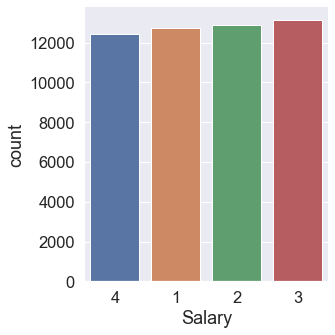

In [90]:
print('Count for each category')
print(train['Salary'].value_counts(ascending=False))
sb.catplot(x='Salary', data=train, kind='count', height = 5, order=train['Salary'].value_counts(ascending=True).index)

<b>Insights</b><br>
Income class 4 has the highest count. The classes have about the same count.

<b>Exploration of Predictor Variable: Education</b>

<i>Categorisation of Education based on the data dictionary:</i>
<br>31 = Less than 1st grade
<br>32 = 1st,2nd,3rd,or 4th grade
<br>33 = 5th or 6th grade
<br>34 = 7th and 8th grade
<br>35 = 9th grade
<br>36 = 10th grade
<br>37 = 11th grade
<br>38 = 12th grade no diploma
<br>39 = High school graduate - high school diploma or equivalent
<br>40 = Some college but no degree
<br>41 = Associate degree in college - occupation/vocation program
<br>42 = Associate degree in college - academic program
<br>43 = Bachelor's degree (for example: BA,AB,BS)
<br>44 = Master's degree (for example: MA,MS,MENG,MED,MSW, MBA)
<br>45 = Professional school degree (for example: MD,DDS,DVM,LLB,JD)
<br>46 = Doctorate degree (for example: PHD,EDD)

Let us see the count for each category

Count for each category
43    13057
39    12739
40     7796
44     5923
42     3331
41     2413
46     1251
37      956
45      876
36      633
38      532
35      512
33      449
34      438
32      198
31       91
Name: Education, dtype: int64


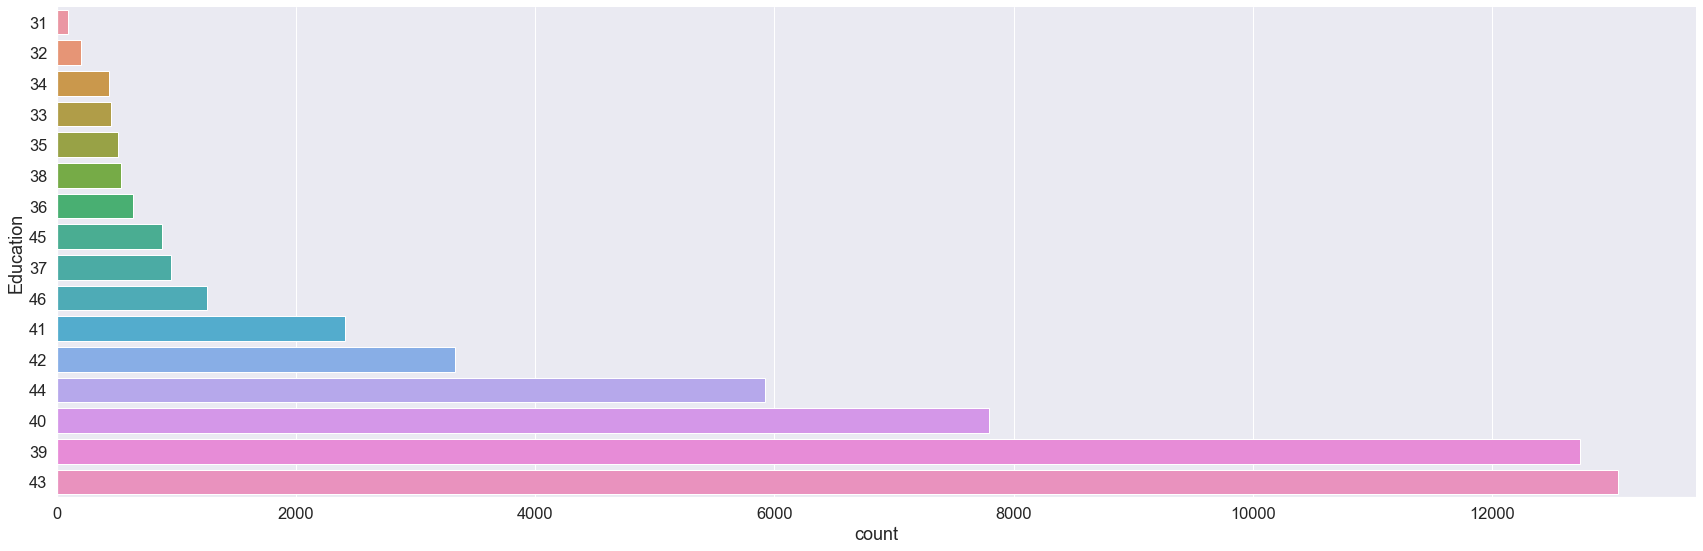

In [91]:
print('Count for each category')
print(train['Education'].value_counts(ascending=False))
sb.catplot(y='Education', data=train, kind='count', height = 8, aspect=3, order=train['Education'].value_counts(ascending=True).index)

It appears that the number of people with each qualification is in the order:
<br>43 = Bachelor's degree (for example: BA,AB,BS)
<br>39 = High school graduate - high school diploma or equivalent
<br>40 = Some college but no degree
<br>44 = Master's degree (for example: MA,MS,MENG,MED,MSW, MBA)
<br>42 = Associate degree in college - academic program
<br>41 = Associate degree in college - occupation/vocation program
<br>46 = Doctorate degree (for example: PHD,EDD)
<br>37 = 11th grade
<br>45 = Professional school degree (for example: MD,DDS,DVM,LLB,JD)
<br>36 = 10th grade
<br>38 = 12th grade no diploma
<br>35 = 9th grade
<br>33 = 5th or 6th grade
<br>34 = 7th and 8th grade
<br>32 = 1st,2nd,3rd,or 4th grade
<br>31 = Less than 1st grade

<b>Insights</b><br>
Many of the respondents are Bachelor Degree holders or High School Graduates.

<b>Exploration of Predictor Variable: Marital</b>

<i>Categorisation of Marital based on the data dictionary:</i>
<br>1 = Married - civilian spouse present
<br>2 = Married - Armed Forces spouse present
<br>3 = Married - spouse absent (exc.separated)
<br>4 = Widowed
<br>5 = Divorced
<br>6 = Separated
<br>7 = Never married

Let us see the count for each category

Count for each category
1    28351
7    15225
5     4914
6      907
4      886
3      723
2      189
Name: Marital, dtype: int64


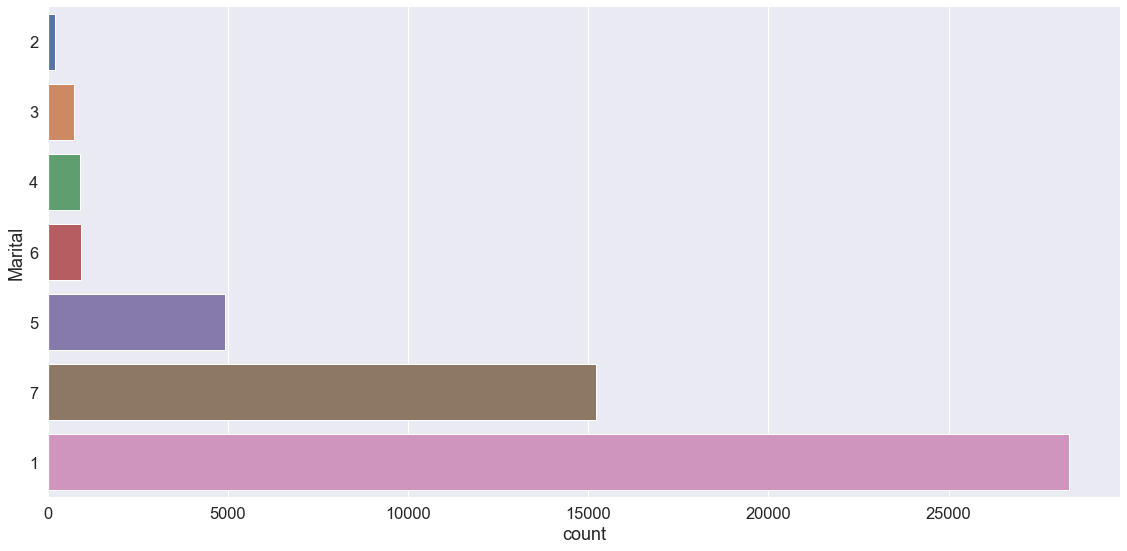

In [92]:
print('Count for each category')
print(train['Marital'].value_counts(ascending=False))
sb.catplot(y='Marital', data=train, kind='count', height = 8, aspect=2, order=train['Marital'].value_counts(ascending=True).index)

Order of count:
<br>1 = Married - civilian spouse present
<br>7 = Never married
<br>5 = Divorced
<br>6 = Separated
<br>4 = Widowed
<br>3 = Married - spouse absent (exc.separated)
<br>2 = Married - Armed Forces spouse present

<b>Exploration of Predictor Variable: Sex</b>

Categorisation of Sex based on the data dictionary:
<br>1 = Male
<br>2 = Female

Let us see the count for each category

Count for each category
1    26426
2    24769
Name: Sex, dtype: int64


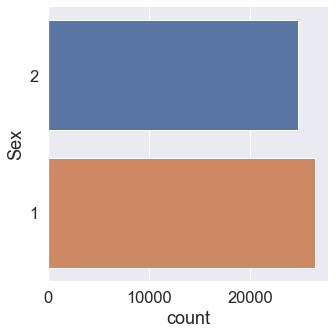

In [93]:
print('Count for each category')
print(train['Sex'].value_counts(ascending=False))
sb.catplot(y='Sex', data=train, kind='count', height = 5, order=train['Sex'].value_counts(ascending=True).index)

<b>Insights</b><br>
There are about equal number of males and females, with slightly more males

<b>Exploration of Predictor Variable: Age</b>

According to the data dictionary, Age is a continuous numerical variable.

Let us see the vital statistics:

In [94]:
train['Age'].describe()

count    51195.000000
mean        42.379939
std         13.892045
min         15.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         85.000000
Name: Age, dtype: float64

Let us see the spread of the data:

<AxesSubplot:xlabel='Age', ylabel='Count'>

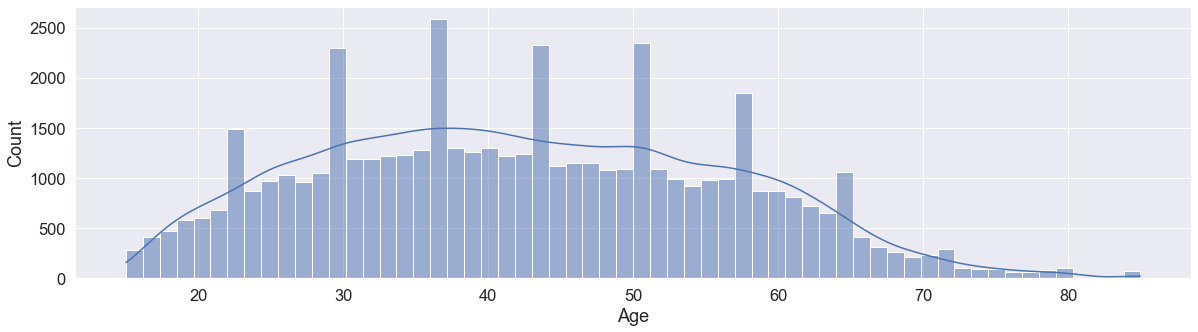

In [95]:
f, axes = plt.subplots(figsize=(20,5))
sb.histplot(data=train['Age'], kde=True, ax=axes)

Finding outliers for Age:

In [96]:
outliers('Age', x_train)

1.5 * IQR: 20.0 - 64.0
Number of outliers: 4612


We see that majority of the respondents are aged 20 to 64 years old.

<b>Exploration of Predictor Variable: Race</b>

Categorisation of Race based on the data dictionary:
<br>1 = White only
<br>2 = Black only
<br>3 = American Indian, Alaskan Native only (AI)
<br>4 = Asian only
<br>5 = Hawaiian/Pacific Islander only (HP)
<br>6 = White-Black
<br>7 = White-AI
<br>8 = White-Asian
<br>9 = White-HP
<br>10 = Black-AI
<br>11 = Black-Asian
<br>12 = Black-HP
<br>13 = AI-Asian
<br>14 = AI-HP
<br>15 = Asian-HP
<br>16 = White-Black-AI
<br>17 = White-Black-Asian
<br>18 = White-Black-HP
<br>19 = White-AI-Asian
<br>20 = White-AI-HP
<br>21 = White-Asian-HP
<br>22 = Black-AI-Asian
<br>23 = White-Black-AI-Asian
<br>24 = White-AI-Asian-HP
<br>25 = Other 3 race comb.
<br>26 = Other 4 or 5 race comb.

Let us see the count for each category

Count for each category
1     39808
2      5711
4      3600
3       698
7       335
6       301
5       288
8       230
9        40
15       33
10       32
21       30
16       23
11       22
17       11
13        8
19        6
20        4
25        4
14        4
18        2
26        2
12        2
23        1
Name: Race, dtype: int64


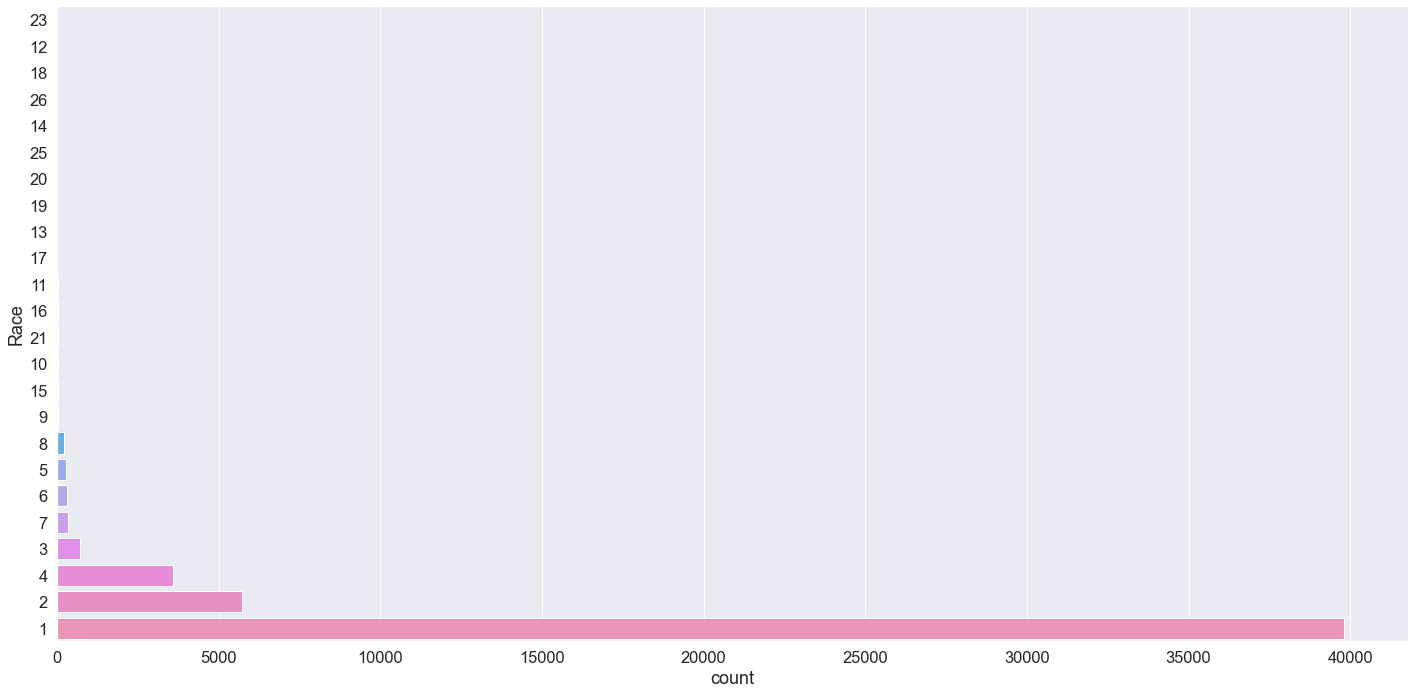

In [97]:
print('Count for each category')
print(train['Race'].value_counts(ascending=False))
sb.catplot(y='Race', data=train, kind='count', height = 10, aspect=2, order=train['Race'].value_counts(ascending=True).index)

Order of count:
<br>1 = White only
<br>2 = Black only
<br>4 = Asian only
<br>3 = American Indian, Alaskan Native only (AI)
<br>7 = White-AI
<br>6 = White-Black
<br>5 = Hawaiian/Pacific Islander only (HP)
<br>8 = White-Asian
<br>9 = White-HP
<br>10 = Black-AI
<br>15 = Asian-HP
<br>21 = White-Asian-HP
<br>16 = White-Black-AI
<br>11 = Black-Asian
<br>17 = White-Black-Asian
<br>13 = AI-Asian
<br>19 = White-AI-Asian
<br>20 = White-AI-HP
<br>14 = AI-HP
<br>25 = Other 3 race comb.
<br>18 = White-Black-HP
<br>26 = Other 4 or 5 race comb.
<br>12 = Black-HP
<br>22 = Black-AI-Asian
<br>23 = White-Black-AI-Asian
<br>24 = White-AI-Asian-HP


<b>**Most respondents belong to 'White only'. Many races are not given enough representation</b>

<b>Exploration of Predictor Variable: Veteran</b>

Categorisation of Veteran based on the data dictionary:
<br>-1 = Aged below 17 years old
<br>1 = Yes
<br>2 = No

Let us see the count for each category

Count for each category
 2    48379
 1     2535
-1      281
Name: Veteran, dtype: int64


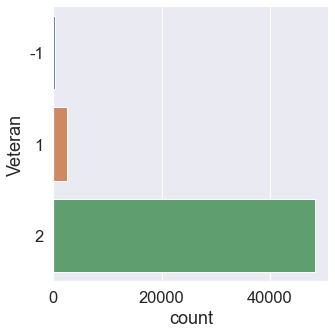

In [98]:
print('Count for each category')
print(train['Veteran'].value_counts(ascending=False))
sb.catplot(y='Veteran', data=train, kind='count', height = 5, order=train['Veteran'].value_counts(ascending=True).index)


<b>Insights</b><br>
There are more non-veterans than veterans.

<b>Exploration of Predictor Variable: Pro_Cert</b>

Categorisation of Pro_Cert based on the data dictionary:
<br>1 = Yes
<br>2 = No

Let us see the count for each category

Count for each category
2    38417
1    12778
Name: Pro_Cert, dtype: int64


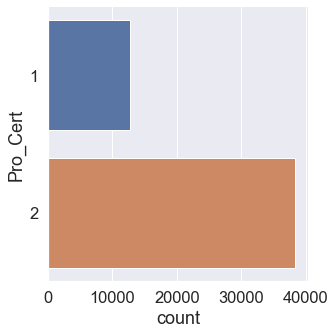

In [99]:
print('Count for each category')
print(train['Pro_Cert'].value_counts(ascending=False))
sb.catplot(y='Pro_Cert', data=train, kind='count', height = 5, order=train['Pro_Cert'].value_counts(ascending=True).index)

<b>Insights</b><br>
It appears that there are more people who do not own a professional certifcate

<b>Exploration of Predictor Variable: Gov_Cert</b>

Categorisation of Gov_Cert based on the data dictionary:
<br>-1 = Do not possess professional certificates (No in Pro_Cert)
<br>1 = Yes
<br>2 = No

Let us see the count for each category

Count for each category
-1    38417
 1    11660
 2     1118
Name: Gov_Cert, dtype: int64


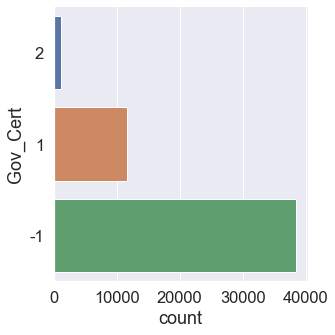

In [100]:
print('Count for each category')
print(train['Gov_Cert'].value_counts(ascending=False))
sb.catplot(y='Gov_Cert', data=train, kind='count', height = 5, order=train['Gov_Cert'].value_counts(ascending=True).index)

<b>Insights</b><br>
Among those who have professional certificates, most of them are issued by the government.

<b>Exploration of Predictor Variable: Cert_Need</b>

Categorisation of Cert_Need based on the data dictionary:
<br>-1 = Do not possess professional certificates (No in Pro_Cert)
<br>1 = Yes
<br>2 = No

Let us see the count for each category

Count for each category
-1    38417
 1    11013
 2     1765
Name: Cert_Need, dtype: int64


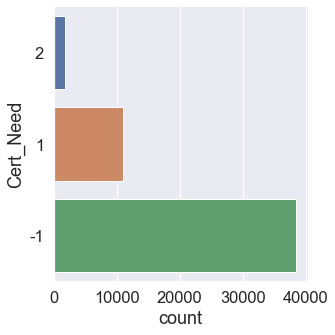

In [101]:
print('Count for each category')
print(train['Cert_Need'].value_counts(ascending=False))
sb.catplot(y='Cert_Need', data=train, kind='count', height = 5, order=train['Cert_Need'].value_counts(ascending=True).index)

<b>Insights</b><br>
Among those who have professional certificates, many of their jobs require them to have such certificates

<b>Exploration of Predictor Variable: Disability</b>

Categorisation of Disability based on the data dictionary:
<br>1 = Yes
<br>2 = No

Let us see the count for each category

Count for each category
2    49493
1     1702
Name: Disability, dtype: int64


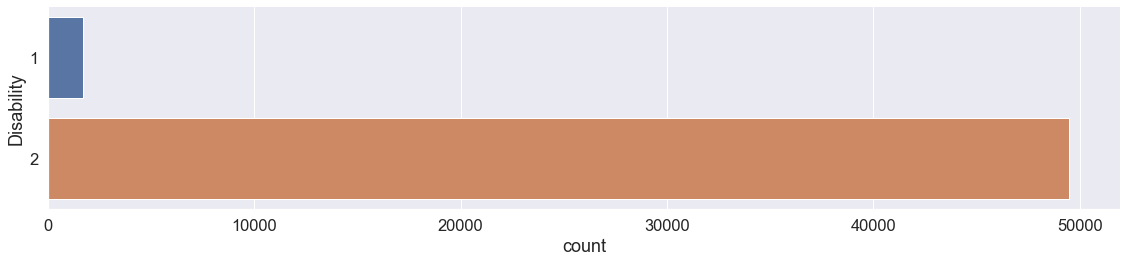

In [102]:
print('Count for each category')
print(train['Disability'].value_counts(ascending=False))
sb.catplot(y='Disability', data=train, kind='count', height = 4, aspect=4, order=train['Disability'].value_counts(ascending=True).index)

<b>Insights</b><br>
Most people do not have disability

<b>Exploration of Predictor Variable: Citizenship</b>

Categorisation of Citizenship based on the data dictionary:
<br>1 = Native, born in US
<br>2 = Native, born in PR or US outlying area
<br>3 = Native, born abroad of US parent(s)
<br>4 = Foreign born, US cit by naturalization
<br>5 = Foreign born, not a US citizen

Let us see the count for each category

Count for each category
1    41896
4     4278
5     4271
3      465
2      285
Name: Citizenship, dtype: int64


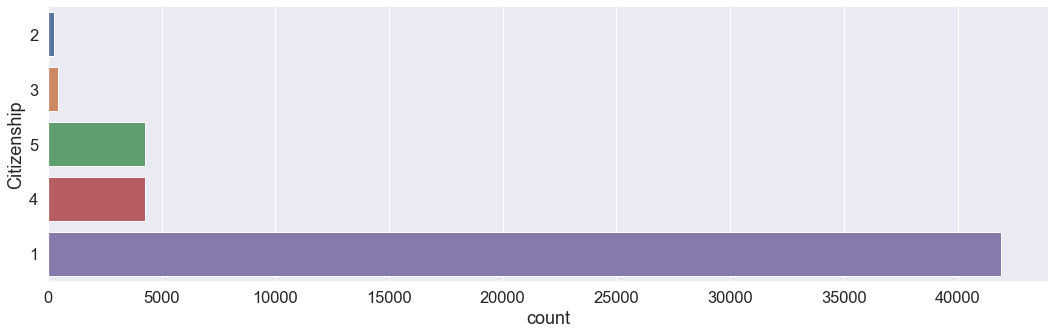

In [103]:
print('Count for each category')
print(train['Citizenship'].value_counts(ascending=False))
sb.catplot(y='Citizenship', data=train, kind='count', height = 5, aspect=3, order=train['Citizenship'].value_counts(ascending=True).index)

<b>Insights</b><br>
Most respondents are native-born US citizens

<b>Exploration of Predictor Variable: Last Week Working Hrs</b>

According to the data dictionary, Last Week Working Hrs is a continuous numerical variable.

Let us see the vital statistics:

In [104]:
train['Last Week Working Hrs'].describe()

count    51195.000000
mean        38.235941
std         13.194508
min          0.000000
25%         36.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: Last Week Working Hrs, dtype: float64

Let us see the spread of the data:

<AxesSubplot:xlabel='Last Week Working Hrs', ylabel='Count'>

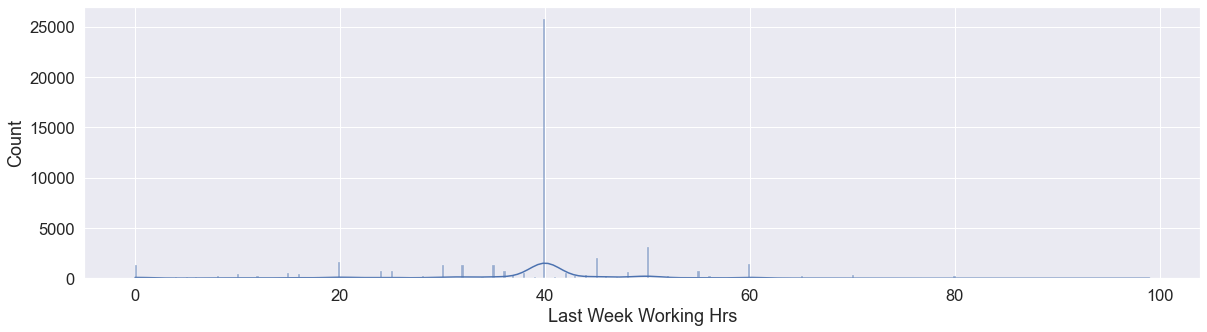

In [105]:
f, axes = plt.subplots(figsize=(20,5))
sb.histplot(data=train['Last Week Working Hrs'], kde=True, ax=axes)

Finding outliers for HrsWeek:

In [106]:
outliers('Last Week Working Hrs', x_train)

1.5 * IQR: 34.0 - 42.0
Number of outliers: 21739


<b>Insights</b><br>
We see that majority of the respondents are concentrated at 34-40 hours a week

<b>Exploration of Predictor Variable: Less than 35hrs for at least 1 week</b>

Categorisation of Less than 35hrs for at least 1 week based on the data dictionary:
<br>1 = Non-Full-Time workers
<br>1 = Yes
<br>2 = No

Let us see the count for each category

Count for each category
2    39477
0     7647
1     4071
Name: Less than 35hrs for at least 1 week, dtype: int64


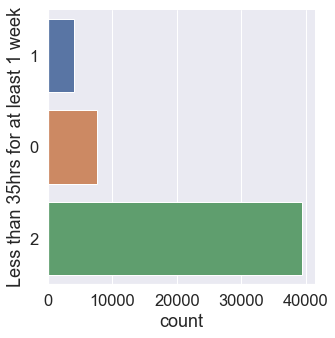

In [107]:
print('Count for each category')
print(train['Less than 35hrs for at least 1 week'].value_counts(ascending=False))
sb.catplot(y='Less than 35hrs for at least 1 week', data=train, kind='count', height = 5, order=train['Less than 35hrs for at least 1 week'].value_counts(ascending=True).index)

<b>Insights</b><br>
For those who are taking on full-time work, most do not work less than 35 hours for more than a week

<b>Exploration of Predictor Variable: More than 35hrs weekly</b>

Categorisation of More than 35hrs weekly based on the data dictionary:
<br>0 = Work more than 35 hours last week
<br>1 = Yes
<br>2 = No

Let us see the count for each category

Count for each category
0    41466
2     7346
1     2383
Name: More than 35hrs weekly, dtype: int64


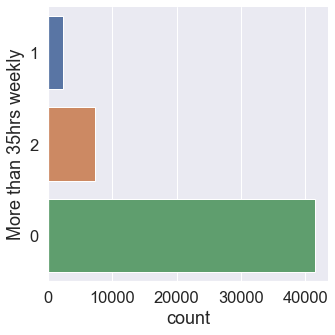

In [108]:
print('Count for each category')
print(train['More than 35hrs weekly'].value_counts(ascending=False))
sb.catplot(y='More than 35hrs weekly', data=train, kind='count', height = 5, order=train['More than 35hrs weekly'].value_counts(ascending=True).index)

<b>Insights</b><br>
For those who work less than 35 hours the past week, it is a common occurence for most of them

<b>Exploration of Predictor Variable: HrsWeek</b>

According to the data dictionary, HrsWeek is a continuous numerical variable.

Let us see the vital statistics:

In [109]:
train['HrsWeek'].describe()

count    51195.000000
mean        38.936634
std         10.168217
min          1.000000
25%         40.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: HrsWeek, dtype: float64

Let us see the spread of the data:

<AxesSubplot:xlabel='HrsWeek', ylabel='Count'>

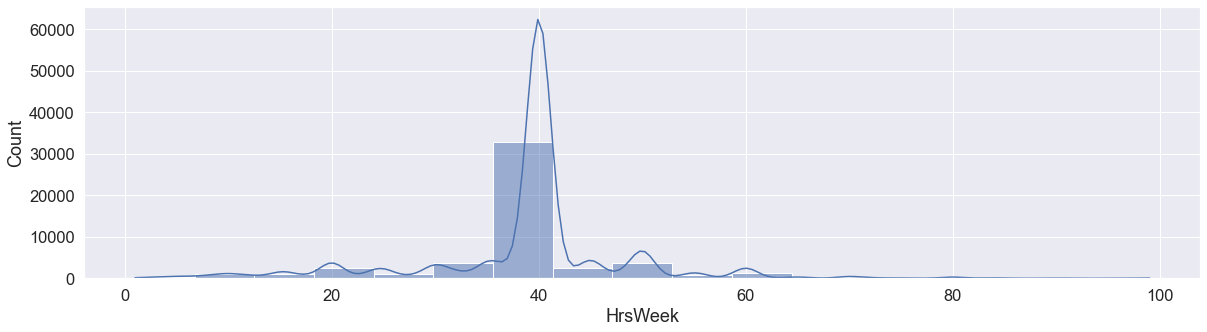

In [110]:
f, axes = plt.subplots(figsize=(20,5))
sb.histplot(data=train['HrsWeek'], kde=True, ax=axes)

Finding outliers for HrsWeek:

In [111]:
outliers('HrsWeek', x_train)

1.5 * IQR: 40.0 - 40.0
Number of outliers: 19825


<b>Insights</b><br>
We see that majority of the respondents are usually working 40 hours a week

<b>Exploration of Predictor Variable: Detailed Household Status</b>

Categorisation of Detailed Household Status based on the data dictionary:
<br><u>In household:</u>
<br>1 = Householder
<br>2 = Spouse of householder
<br><u>Child of householder:</u>
<br>3 = Under 18 years, single (never married)
<br>4 = Under 18 years, ever married
<br>5 = 18 years and over
<br><u>Other household members:</u>
<br>6 = Other relative of householder
<br>7 = Nonrelative of householder
<br><u>In group quarters:</u>
<br>8 = Secondary individual

Let us see the count for each category

Count for each category
1    26364
2    13544
5     4580
7     3642
6     2438
3      611
4       13
8        3
Name: Detailed Household Status, dtype: int64


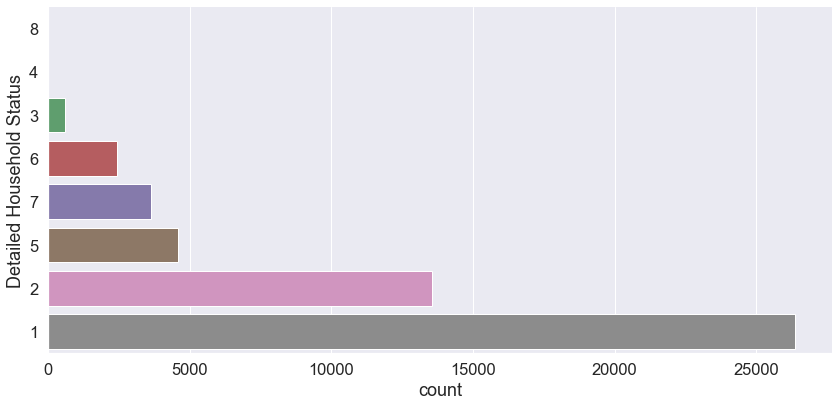

In [112]:
print('Count for each category')
print(train['Detailed Household Status'].value_counts(ascending=False))
sb.catplot(y='Detailed Household Status', data=train, kind='count', height = 6, aspect=2, order=train['Detailed Household Status'].value_counts(ascending=True).index)

<b>Insights</b><br>
Most respondents are householders or spouse of householders

<b>Exploration of Predictor Variable: Industry</b>

Categorisation of Industry based on the data dictionary:
<br>1 = Agriculture, forestry,fishing, and hunting
<br>2 = Mining
<br>3 = Construction
<br>4 = Manufacturing
<br>5 = Wholesale and retail trade
<br>6 = Transportation and utilities
<br>7 = Information
<br>8 = Financial activities
<br>9 = Professional and business services
<br>10 = Educational and health services
<br>11 = Leisure and hospitality
<br>12 = Other services
<br>13 = Public administration

Let us see the count for each category

Count for each category
10    12830
5      6554
9      5789
4      5169
11     3879
8      3625
3      3452
13     3087
6      2880
12     2057
7       891
1       660
2       322
Name: Industry, dtype: int64


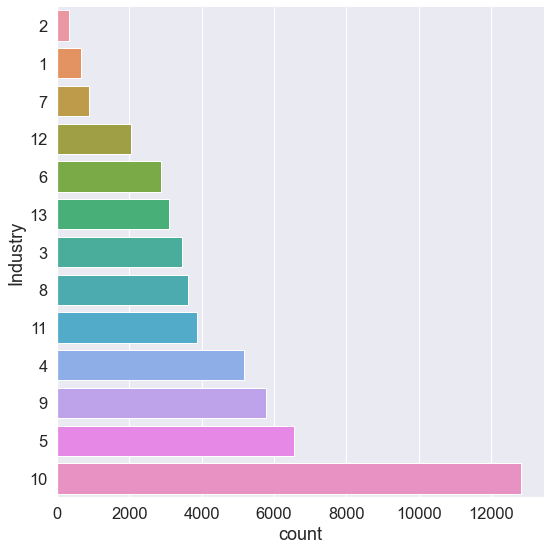

In [113]:
print('Count for each category')
print(train['Industry'].value_counts(ascending=False))
sb.catplot(y='Industry', data=train, kind='count', height = 8, order=train['Industry'].value_counts(ascending=True).index)

<b>Insights</b><br>
The most common industry is the education and health services industry, followed by wholesale and retail and thirdly, professional and business services.

<b>Exploration of Predictor Variable: Occupation Group</b>

Categorisation of Occupation Group based on the data dictionary:
<br>0 = Government/Self-Employed
<br>1 = Management, business, and financial occupations
<br>2 = Professional and related occupations
<br>3 = Service occupations
<br>4 = Sales and related occupations
<br>5 = Office and administrative support occupations
<br>6 = Farming, fishing, and forestry occupations
<br>7 = Construction and extraction occupations
<br>8 = Installation, maintenance, and repair occupations
<br>9 = Production occupations
<br>10 = Transportation and material moving occupations

Let us see the count for each category

Count for each category
2     12986
1      9301
3      7653
5      5697
4      4520
10     3607
9      2831
7      2490
8      1716
6       394
Name: Occupation Group, dtype: int64


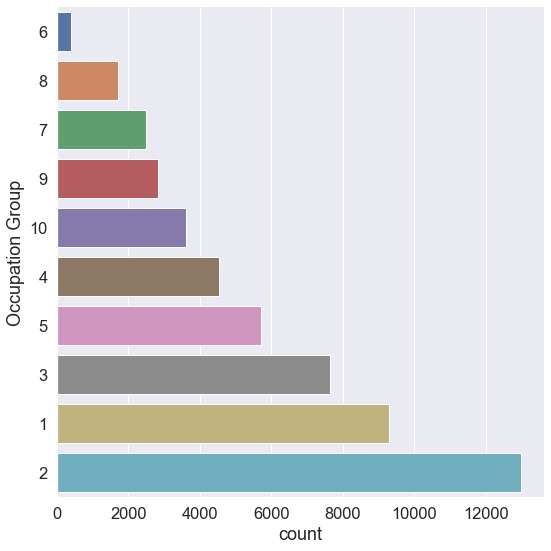

In [114]:
print('Count for each category')
print(train['Occupation Group'].value_counts(ascending=False))
sb.catplot(y='Occupation Group', data=train, kind='count', height = 8, order=train['Occupation Group'].value_counts(ascending=True).index)

<b>Insights</b><br>
Professionals is the most common occupation group, followed by management and financial occupations then service occupations. Occupations that are more traditional like farming, fishing and forestry are less popular.

<b>Exploration of Predictor Variable: Occupation</b>

Number of categories in Occupation:

In [115]:
print(train['Occupation'].nunique())

525


We will take a look at the top 20 most common occupations

In [116]:
train['Occupation'].value_counts()[:20].index

Int64Index([ 440, 2310, 3255, 4700, 9130, 5240, 4760, 4720, 5740, 4220, 9620,
            4020, 1021,   10, 9645, 6260,  800, 2545, 5000,  120],
           dtype='int64')

By referring to the Occupation Codes file, the top 20 most common occupations are:
<br>Code | Occupation
<br>440: Managers
<br>2310: Elementary and middle school teachers
<br>3255: Registered nurses
<br>9130: Ship and boat captains and operators
<br>4700: First-line supervisors/managers of retail sales workers
<br>5240: Customer service representatives
<br>4760: Retail salespersons
<br>4720: Cashiers
<br>5740: Secretaries and administrative assistants, except legal, medical, and executive
<br>4220: Janitors and building cleaners
<br>9620: Laborers and freight, stock, and material movers, hand
<br>4020: Cooks
<br>1021: Software developers
<br>10: Chief executives
<br>6260: Construction laborers
<br>800: Accountants and auditors
<br>9645: Stockers and order fillers
<br>5000: First-Line supervisors of office and administrative support workers
<br>2545: Teacher assistants
<br>3602: Personal care aides

<b>Insights</b><br>
We see that in line with the occupation group above, many of the common occupations are in professionals, educators, healthcare workers and service staff

<b>Exploration of Predictor Variable: WorkClass</b>

Categorisation of WorkClass based on the data dictionary:
<br>1 = Private
<br>2 = Federal government
<br>3 = State government
<br>4 = Local government
<br>5 = Self-employed-incorporated
<br>6 = Self-employed-not incorporated

Let us see the count for each category

Count for each category
1    40474
4     3666
3     2988
5     1996
2     1691
6      380
Name: WorkClass, dtype: int64


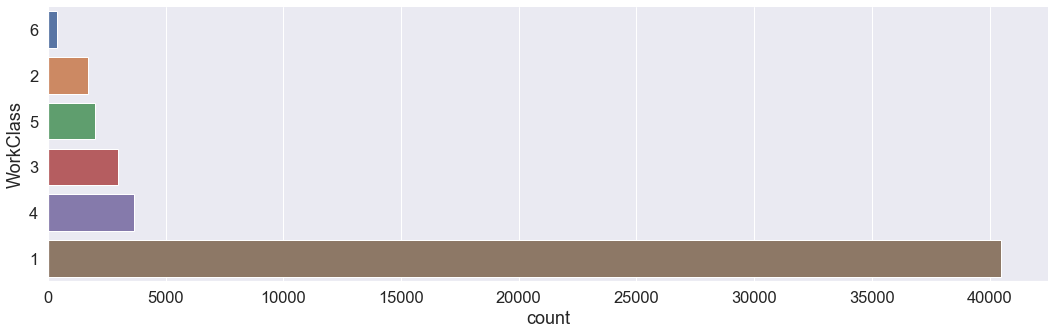

In [117]:
print('Count for each category')
print(train['WorkClass'].value_counts(ascending=False))
sb.catplot(y='WorkClass', data=train, kind='count', height = 5, aspect=3, order=train['WorkClass'].value_counts(ascending=True).index)

<b>Insights</b><br>
Most respondents are working for private companies, followed by local government.

<b>Exploration of Predictor Variable: Longest Industry</b>

Categorisation of Longest Industry based on the data dictionary:
<br>1 = AGRICULTURE, FORESTRY, FISHING, and HUNTING
<br>2 = MINING
<br>3 = CONSTRUCTION
<br>4 = MANUFACTURING - DURABLE GOODS
<br>5 = MANUFACTURING - NON-DURABLE GOODS
<br>6 = WHOLESALE TRADE
<br>7 = RETAIL TRADE
<br>8 = TRANSPORTATION AND WAREHOUSING
<br>9 = UTILITIES
<br>10 = INFORMATION
<br>11 = FINANCE AND INSURANCE
<br>12 = REAL ESTATE AND RENTAL AND LEASING
<br>13 = PROFESSIONAL SCIENTIFIC AND TECHNICAL SERVICES
<br>14 = MANAGEMENT, ADMINISTRATIVE AND WASTE MANAGEMENT SERVICES
<br>15 = EDUCATIONAL SERVICES
<br>16 = HEALTH CARE AND SOCIAL ASSISTANCE SERVICES
<br>17 = ARTS, ENTERTAINMENT, AND RECREATION 18 = ACCOMMODATION AND FOOD SERVICES
<br>19 = PRIVATE HOUSEHOLDS
<br>20 = OTHER SERVICES, EXCEPT PRIVATE HOUSEHOLDS
<br>21 = PUBLIC ADMINISTRATION
<br>22 = ARMED FORCES

Let us see the count for each category

Count for each category
16    7680
7     5370
15    5193
13    4047
3     3389
18    3277
4     3274
21    3050
11    2583
8     2311
20    1868
5     1861
14    1743
6     1218
12     933
10     918
17     772
1      668
9      494
2      334
19     180
22      32
Name: Longest Industry, dtype: int64


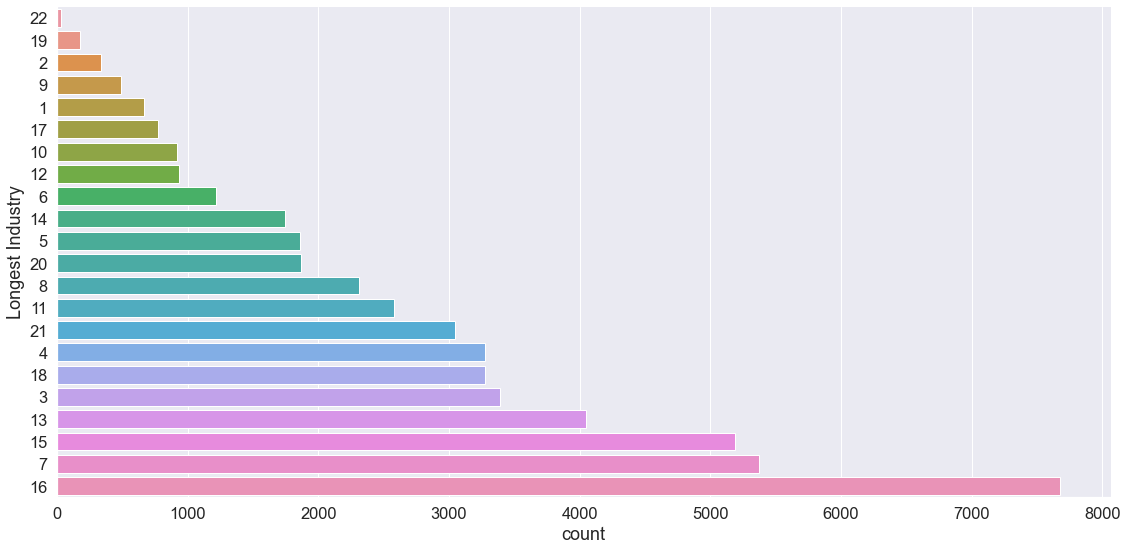

In [118]:
print('Count for each category')
print(train['Longest Industry'].value_counts(ascending=False))
sb.catplot(y='Longest Industry', data=train, kind='count', height = 8, aspect=2, order=train['Longest Industry'].value_counts(ascending=True).index)

<b>Insights</b><br>
Many respondents have industrial experience in healthcare and social assistance, retail trade and educational services.

<b>Exploration of Predictor Variable: Longest Job Class</b>

Categorisation of Longest Job Class based on the data dictionary:
<br><u>AGRICULTURE:</u>
<br>1 = WAGE AND SALARY
<br>2 = SELF-EMPLOYED
<br>3 = UNPAID
<br><u>NONAGRICULTURE:</u>
<br>4 = PRIVATE HOUSEHOLD
<br>5 = OTHER PRIVATE
<br>6 = GOVERNMENT
<br>7 = SELF-EMPLOYED
<br>8 = UNPAID
<br>9 = NEVER WORKED

Let us see the count for each category

Count for each category
5    39993
6     8351
7     2001
1      646
4      180
2       22
8        2
Name: Longest Job Class, dtype: int64


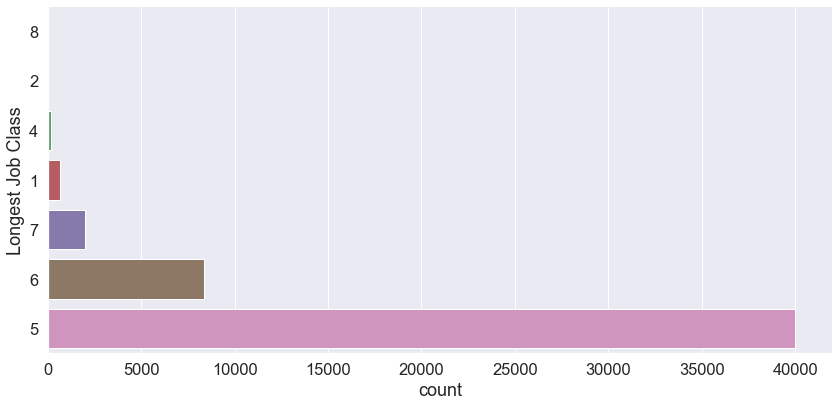

In [119]:
print('Count for each category')
print(train['Longest Job Class'].value_counts(ascending=False))
sb.catplot(y='Longest Job Class', data=train, kind='count', height = 6, aspect=2, order=train['Longest Job Class'].value_counts(ascending=True).index)

<b>Insights</b><br>
Most respondents have most experience working in private and government companies.

<h3>Bi-Variate Analysis</h3>

<b>Highest Education Attainment (Education) vs Salary</b>

46 ( Doctorate degree (for example: PHD,EDD) ) : 3.54
45 ( Professional school degree (for example: MD,DDS,DVM,LLB,JD) ) : 3.51
44 ( Master's degree (for example: MA,MS,MENG,MED,MSW, MBA) ) : 3.2
43 ( Bachelor's degree (for example: BA,AB,BS) ) : 2.89
41 ( Associate degree in college - occupation/vocation program ) : 2.45
42 ( Associate degree in college - academic program ) : 2.38
40 ( Some college but no degree ) : 2.18
39 ( High school graduate - high school diploma or equivalent ) : 2.08
34 ( 7th and 8th grade ) : 1.83
31 ( Less than 1st grade ) : 1.81
38 ( 12th grade no diploma ) : 1.72
32 ( 1st,2nd,3rd,or 4th grade ) : 1.67
33 ( 5th or 6th grade ) : 1.67
35 ( 9th grade ) : 1.66
36 ( 10th grade ) : 1.5
37 ( 11th grade ) : 1.45


[Text(0.5, 1.0, 'Average Income Class for each Education group')]

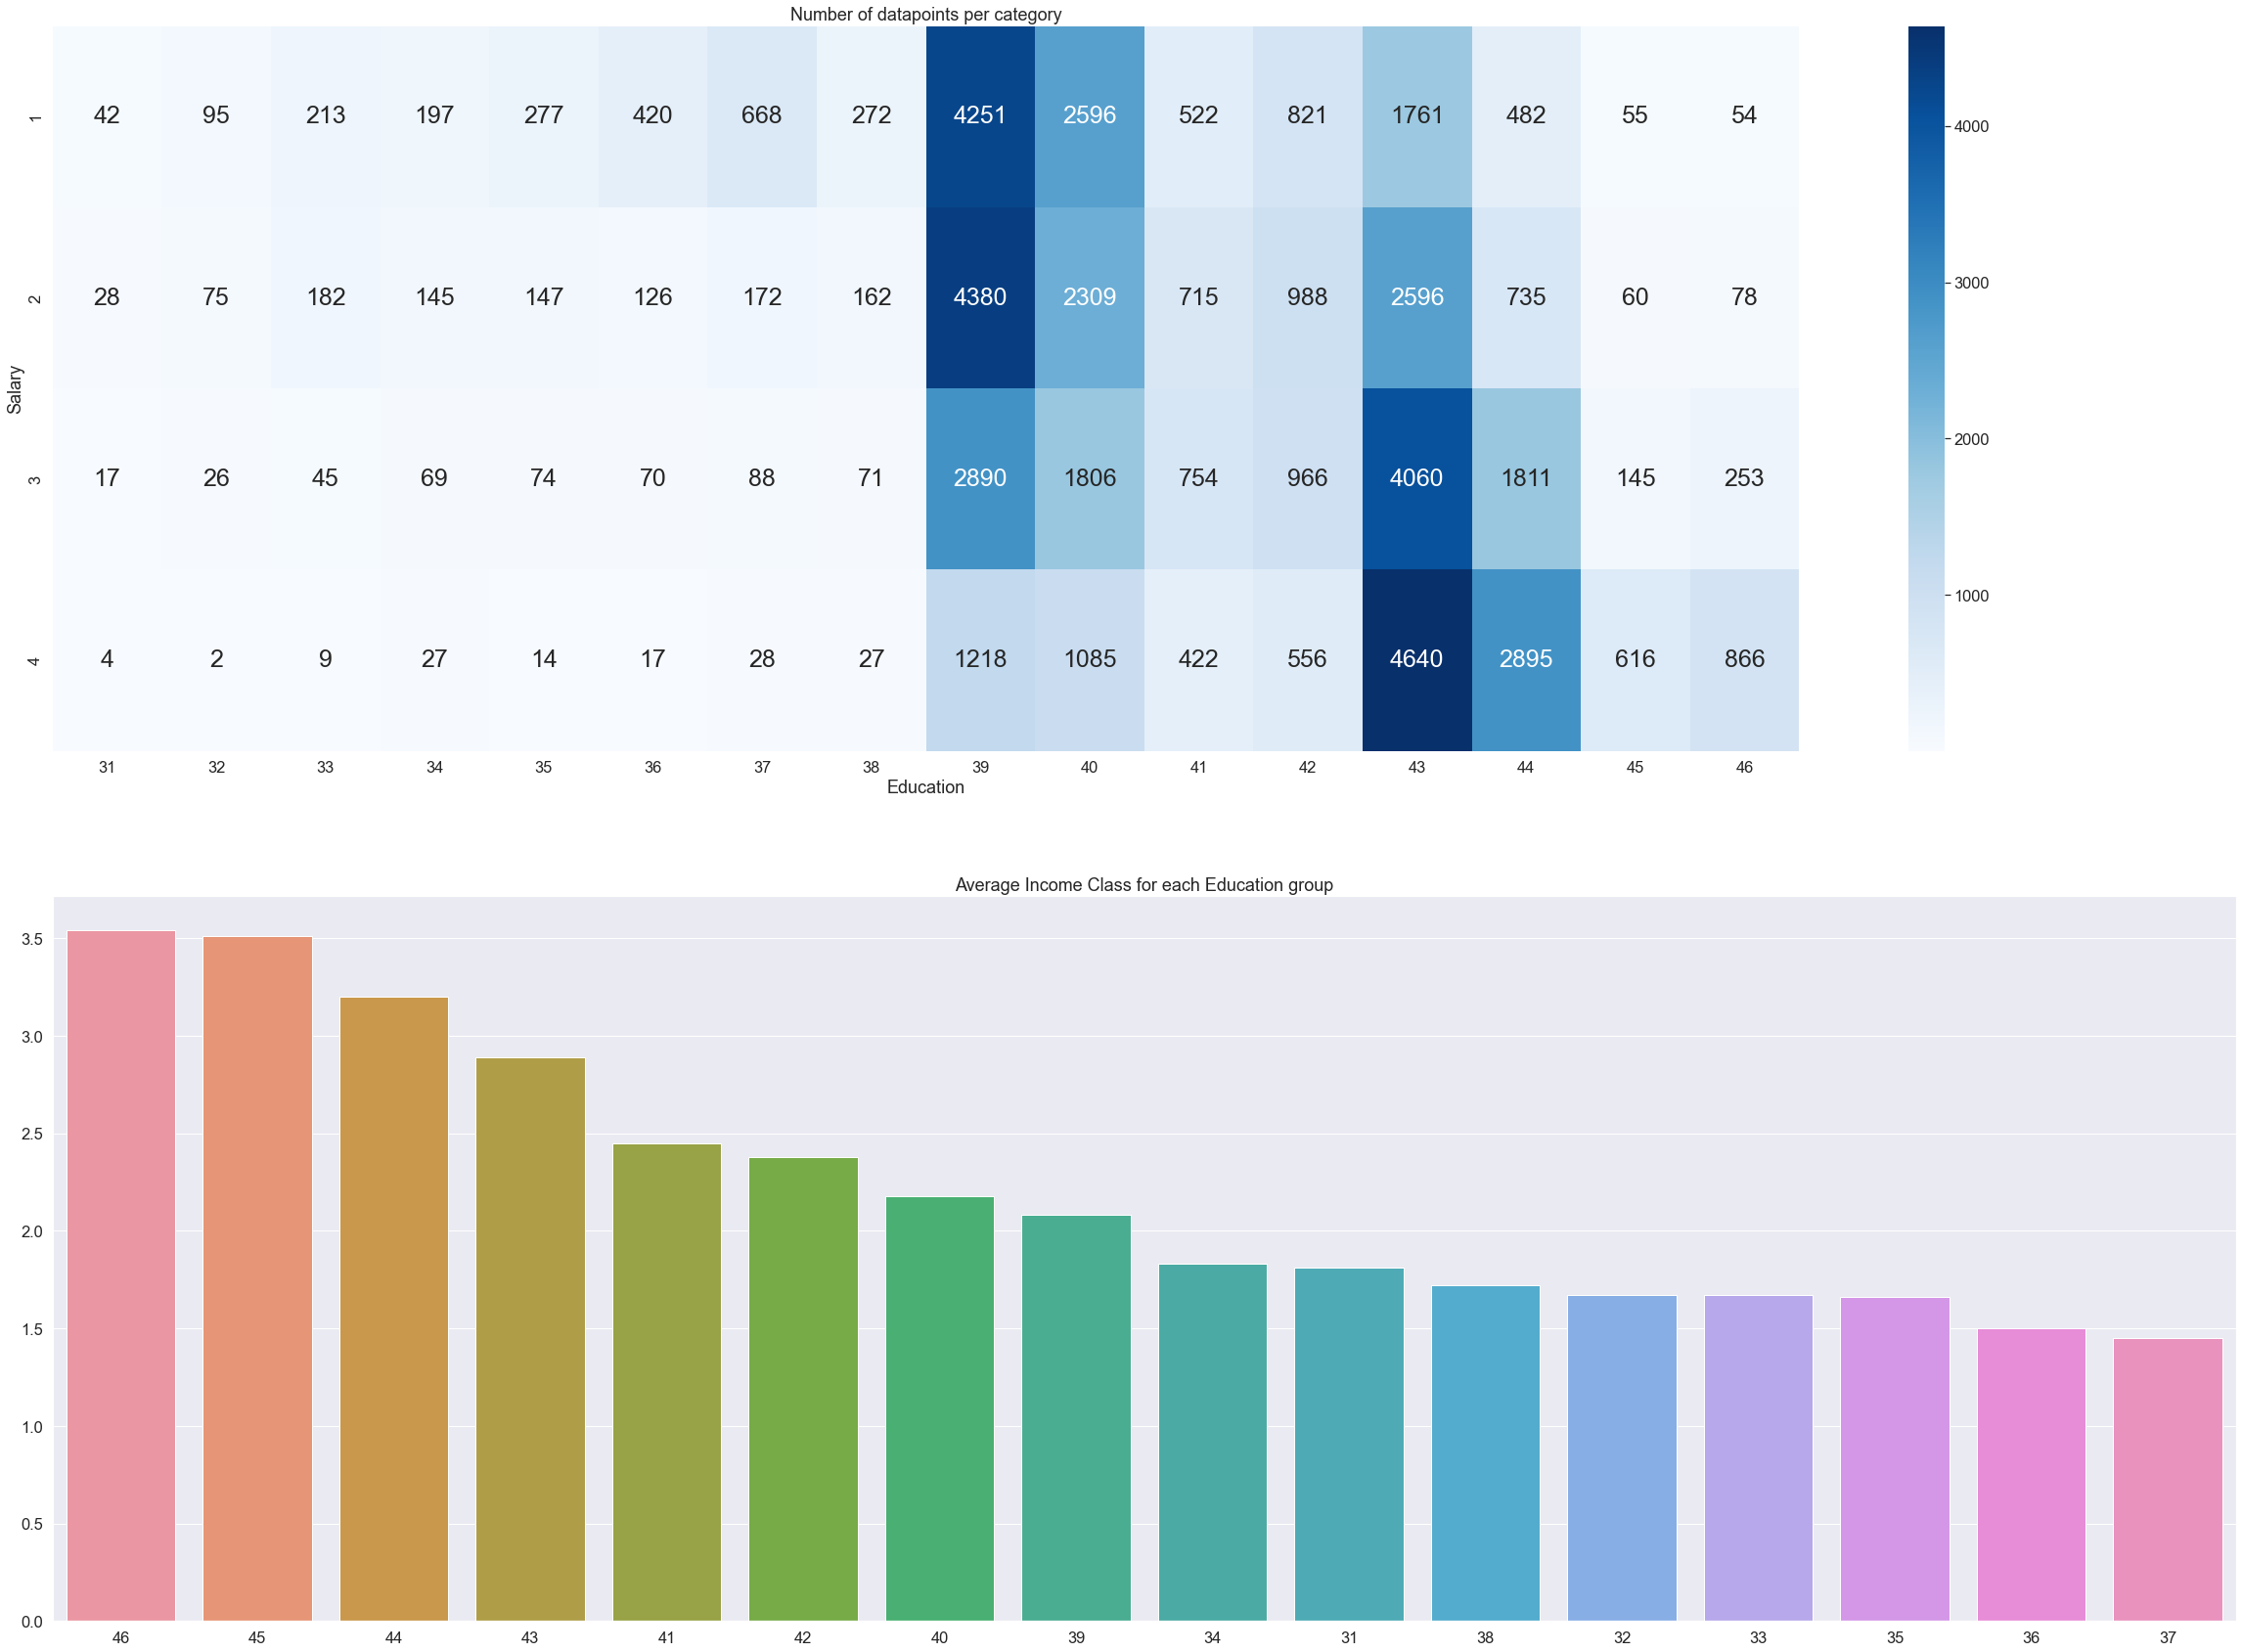

In [120]:
var = 'Education'
f, axes = plt.subplots(2, 1, figsize=(40, 30))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(31,47)]
meanSalary = {}
varmap = {31:'Less than 1st grade',32:'1st,2nd,3rd,or 4th grade',33:'5th or 6th grade',34:'7th and 8th grade',35:'9th grade',
36:'10th grade',37:'11th grade',38:'12th grade no diploma',39:'High school graduate - high school diploma or equivalent',40:'Some college but no degree',
41:'Associate degree in college - occupation/vocation program',42:'Associate degree in college - academic program',43:"Bachelor's degree (for example: BA,AB,BS)",
44:"Master's degree (for example: MA,MS,MENG,MED,MSW, MBA)",45:'Professional school degree (for example: MD,DDS,DVM,LLB,JD)',46:'Doctorate degree (for example: PHD,EDD)'}

for edu in varTypes:
    data = train[train['Education']==edu]
    meanSalary[edu] = float('{:.2f}'.format(data['Salary'].mean()))

sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>We observe that generally, the more education one receives, the higher the salary received.

<b>Marital Status (Marital) vs Salary</b>

1 ( Married - civilian spouse present ) : 2.77
5 ( Divorced ) : 2.49
2 ( Married - Armed Forces spouse present ) : 2.44
3 ( Married - spouse absent (exc.separated) ) : 2.34
4 ( Widowed ) : 2.22
6 ( Separated ) : 2.17
7 ( Never married ) : 2.03


[Text(0.5, 1.0, 'Average Income Class for each Marital group')]

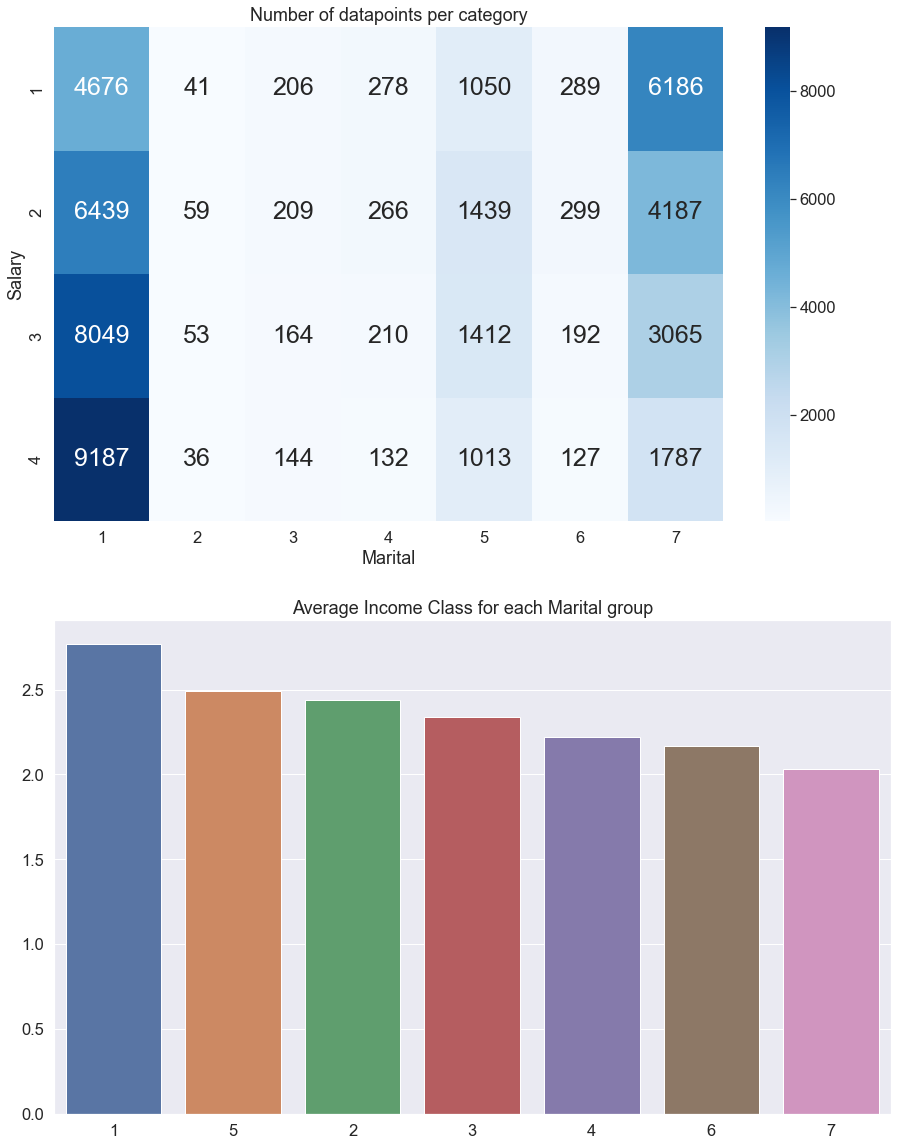

In [121]:
var = 'Marital'
f, axes = plt.subplots(2, 1, figsize=(15,20))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,8)]
meanSalary = {}
varmap = {1:'Married - civilian spouse present',2:'Married - Armed Forces spouse present',3:'Married - spouse absent (exc.separated)',4:'Widowed',5:'Divorced',6:'Separated',7:'Never married'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))



<b>Insights:</b>
<br>Married respondents earn the most on average but it could be due to other factors like them being older. This is supported by how married and divorced respondents earn more on average. It may not be meaningful to attribute the difference in salary to solely their marital status.

<b>Gender (Sex) vs Salary</b>

1 ( Male ) : 2.7
2 ( Female ) : 2.27


[Text(0.5, 1.0, 'Average Income Class for each Sex group')]

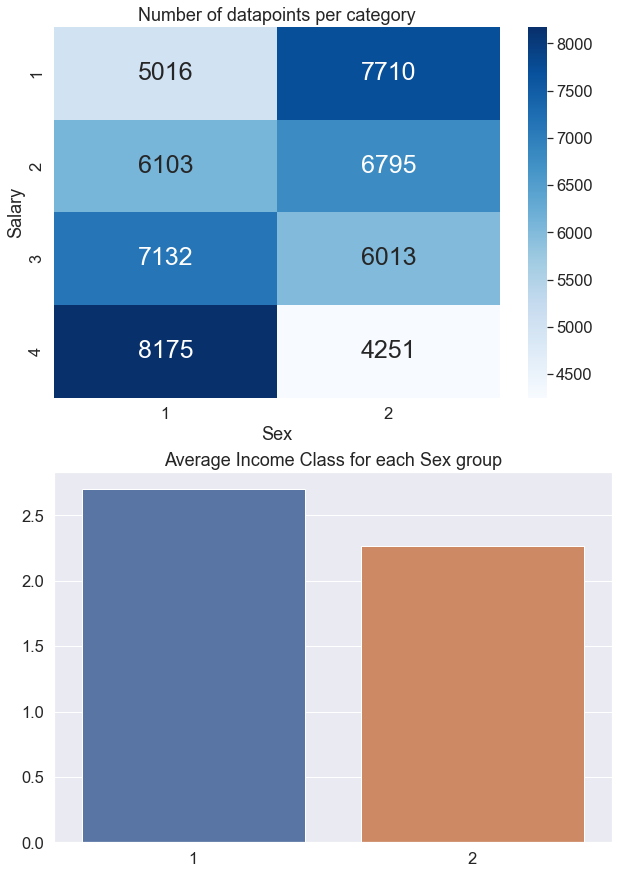

In [122]:
var = 'Sex'
f, axes = plt.subplots(2, 1, figsize=(10, 15))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,3)]
meanSalary = {}
varmap = {1:'Male',2:'Female'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>It appears that on average, males earn more than females.

<b>Age (Age) vs Salary</b>

<AxesSubplot:xlabel='Age', ylabel='Salary'>

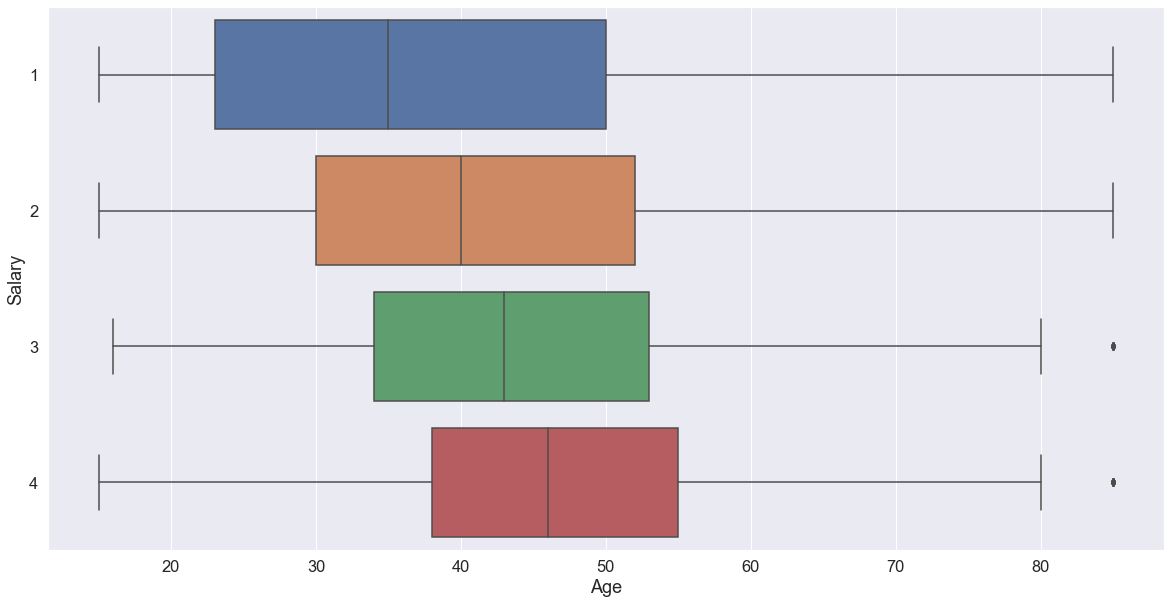

In [123]:
var = 'Age'
f, axes = plt.subplots(figsize=(20, 10))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.boxplot(data=train, y='Salary', x='Age', orient='h')

<b>Insights</b>
<br>On average, those who are older earn more

<b>Race (Race) vs Salary</b>

4 ( Asian only ) : 2.77
11 ( Black-Asian ) : 2.68
8 ( White-Asian ) : 2.63
13 ( AI-Asian ) : 2.62
1 ( White only ) : 2.52
21 ( White-Asian-HP ) : 2.43
9 ( White-HP ) : 2.42
7 ( White-AI ) : 2.33
5 ( Hawaiian/Pacific Islander only (HP) ) : 2.3
2 ( Black only ) : 2.25
20 ( White-AI-HP ) : 2.25
15 ( Asian-HP ) : 2.21
6 ( White-Black ) : 2.14
16 ( White-Black-AI ) : 2.13
3 ( American Indian, Alaskan Native only (AI) ) : 2.1
12 ( Black-HP ) : 2.0
14 ( AI-HP ) : 2.0
19 ( White-AI-Asian ) : 2.0
10 ( Black-AI ) : 1.97
17 ( White-Black-Asian ) : 1.64
18 ( White-Black-HP ) : 1.0
22 ( Black-AI-Asian ) : nan
23 ( White-Black-AI-Asian ) : 2.0
24 ( White-AI-Asian-HP ) : nan
25 ( Other 3 race comb. ) : 3.0
26 ( Other 4 or 5 race comb. ) : 2.5


[Text(0.5, 1.0, 'Average Income Class for each Race group')]

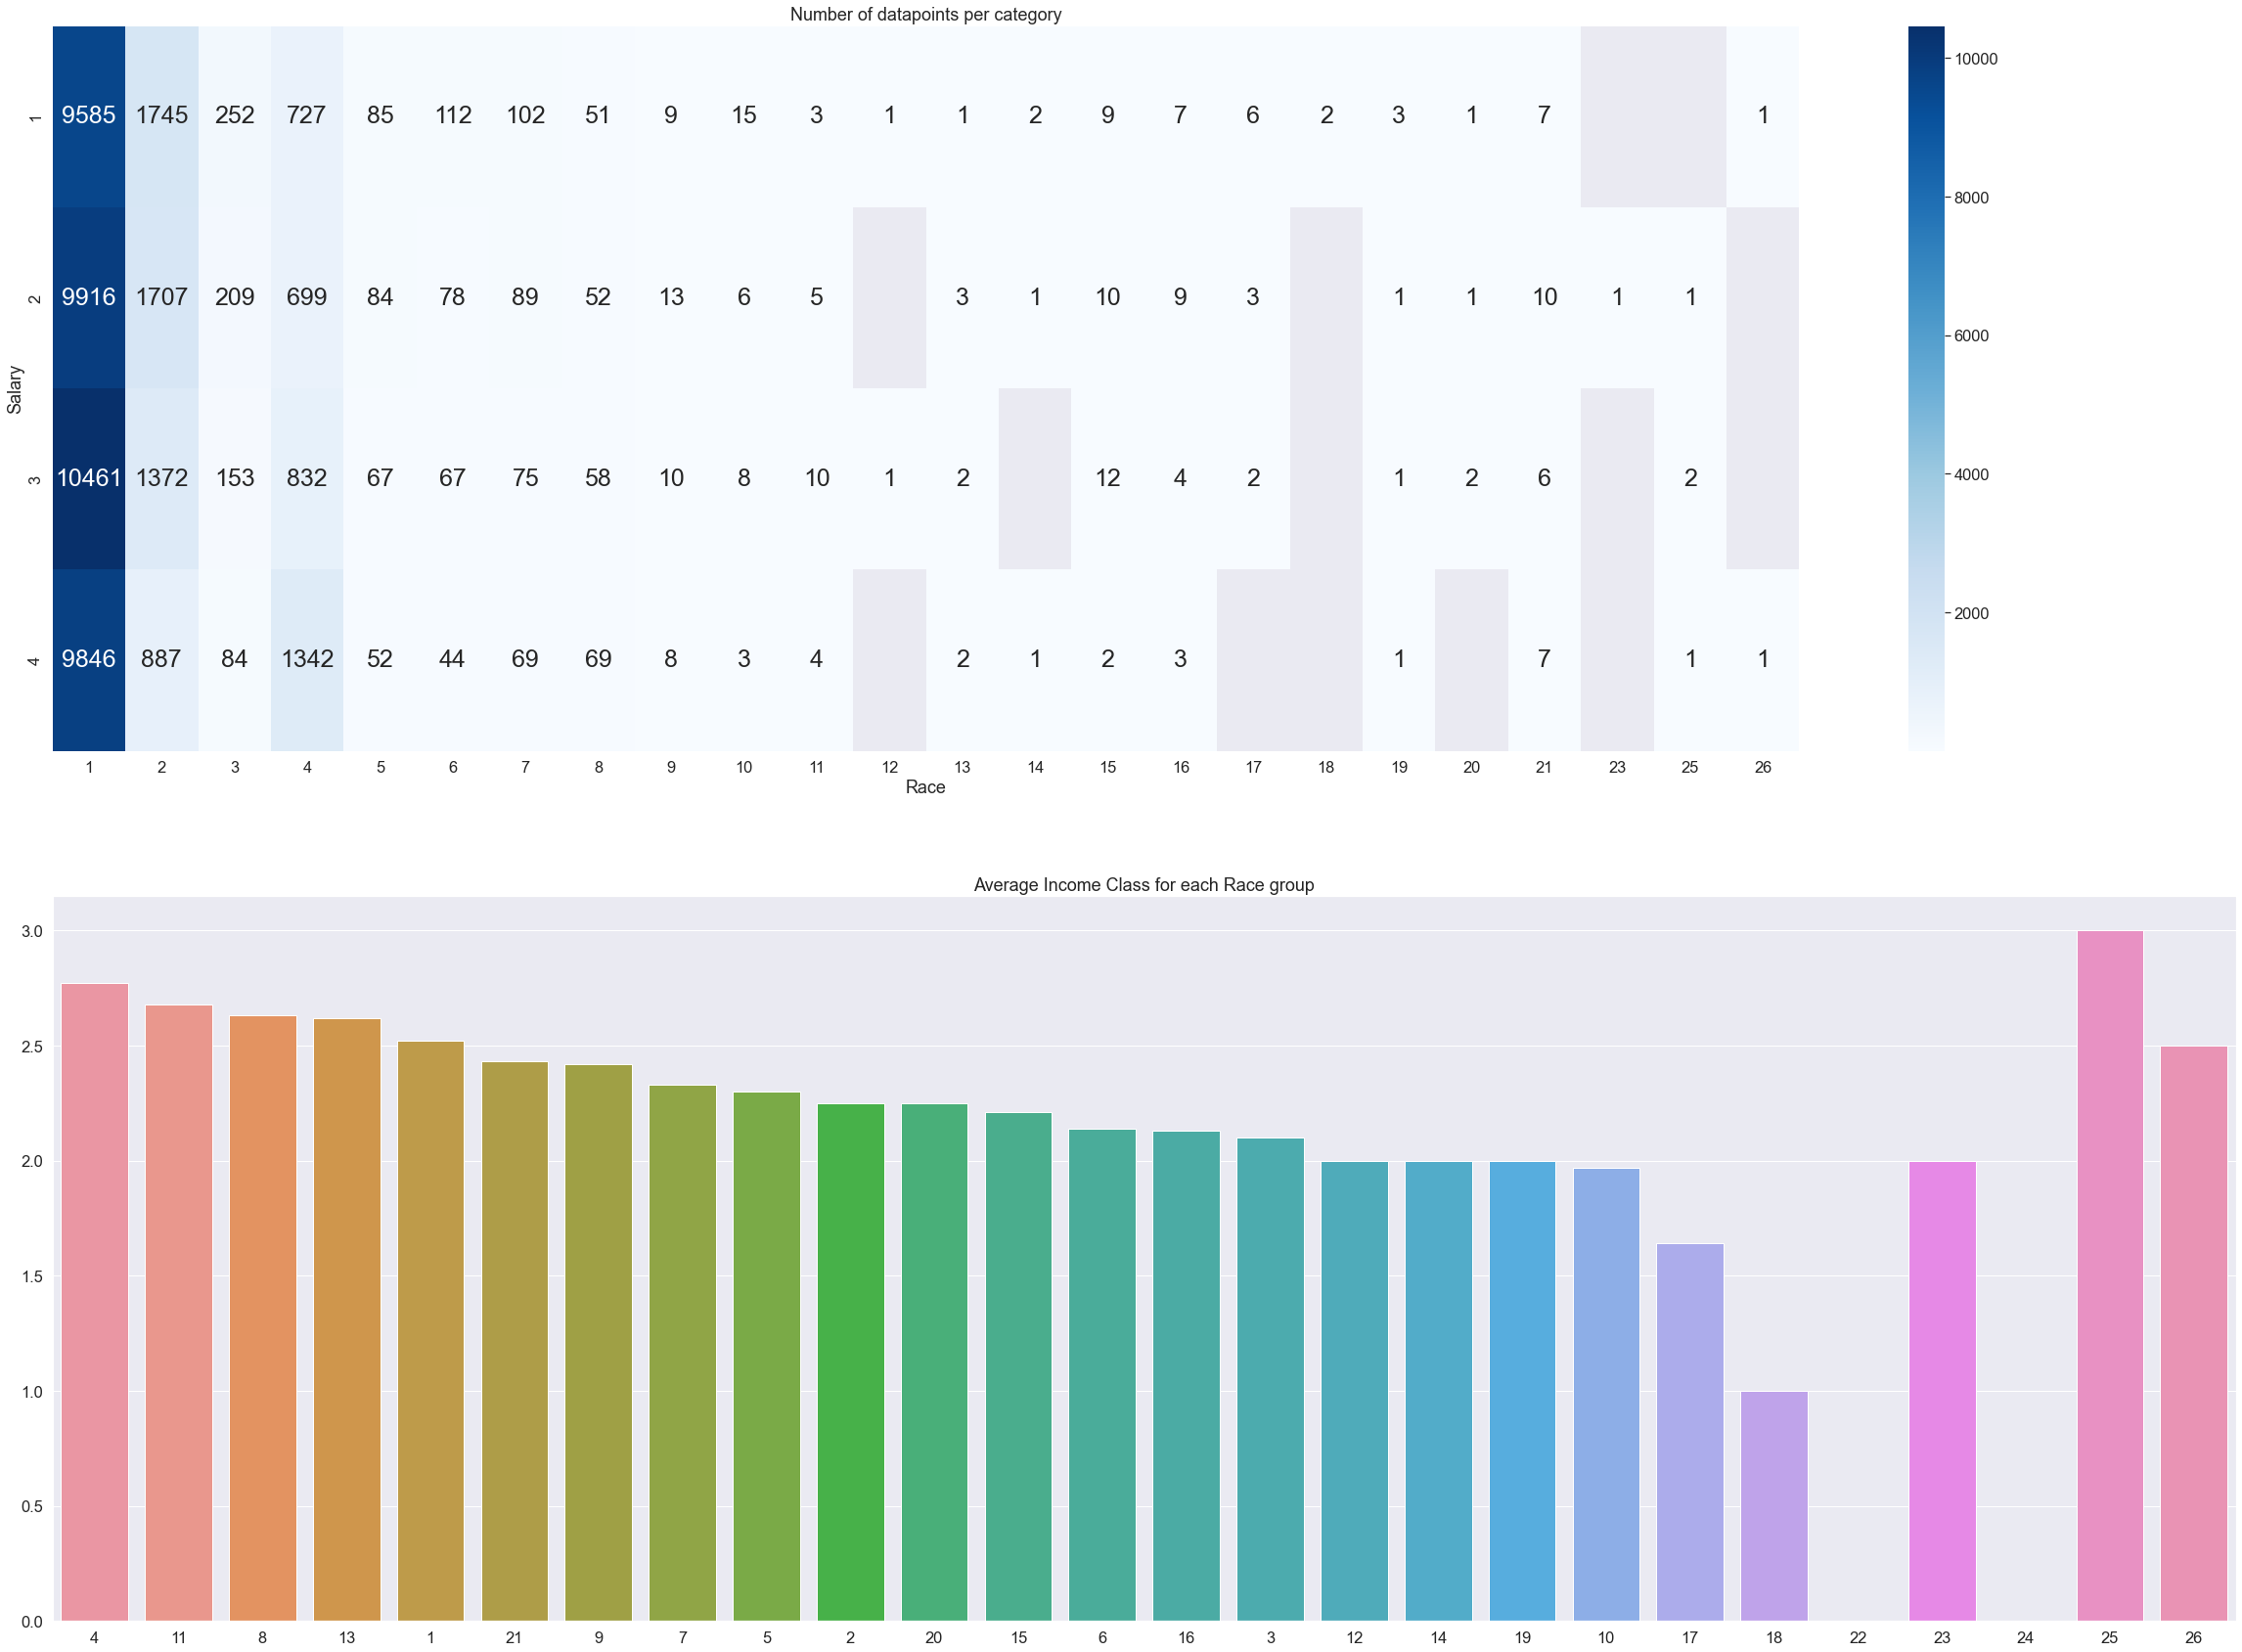

In [124]:
var = 'Race'
f, axes = plt.subplots(2, 1, figsize=(40, 30))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,27)]
meanSalary = {}
varmap = {1:'White only',
          2:'Black only',
          3:'American Indian, Alaskan Native only (AI)',
          4:'Asian only',
          5:'Hawaiian/Pacific Islander only (HP)',
          6:'White-Black',
          7:'White-AI',
          8:'White-Asian',
          9:'White-HP',
          10:'Black-AI',
          11:'Black-Asian',
          12:'Black-HP',
          13:'AI-Asian',
          14:'AI-HP',
          15:'Asian-HP',
          16:'White-Black-AI',
          17:'White-Black-Asian',
          18:'White-Black-HP',
          19:'White-AI-Asian',
          20:'White-AI-HP',
          21:'White-Asian-HP',
          22:'Black-AI-Asian',
          23:'White-Black-AI-Asian',
          24:'White-AI-Asian-HP',
          25:'Other 3 race comb.',
          26:'Other 4 or 5 race comb.'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>Due to a lack of representation in many races, the mean salary class may not be meaningful. For the 'White-Only' group, we see that generally, income classes 1-4 do not seem to have a trend.

<b>Veteran Status (Veteran) vs Salary</b>

1 ( Veteran ) : 2.88
2 ( Non-Veteran ) : 2.48
-1 ( Below 17y/o ) : 1.12


[Text(0.5, 1.0, 'Average Income Class for each Veteran group')]

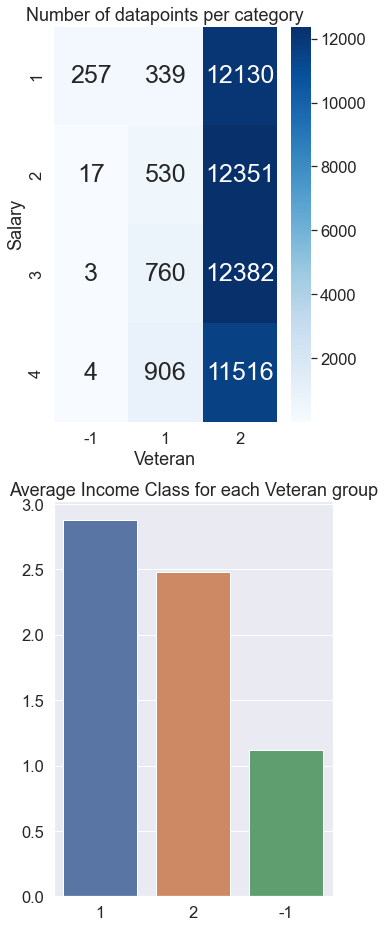

In [125]:
var = 'Veteran'
f, axes = plt.subplots(2, 1, figsize=(5, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [-1,1,2]
meanSalary = {}
varmap = {-1: 'Below 17y/o',
          1:'Veteran',
          2:'Non-Veteran',}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>Veterans appear to earn more than non-veterans. Perhaps this is due to veterans being respected for their contributions to the country or it may be due to them being older. However the difference is not a lot.

<b>Possesion of Professional Certificates (Pro_Cert) vs Salary</b>

1 ( Yes ) : 2.86
2 ( No ) : 2.37


[Text(0.5, 1.0, 'Average Income Class for each Pro_Cert group')]

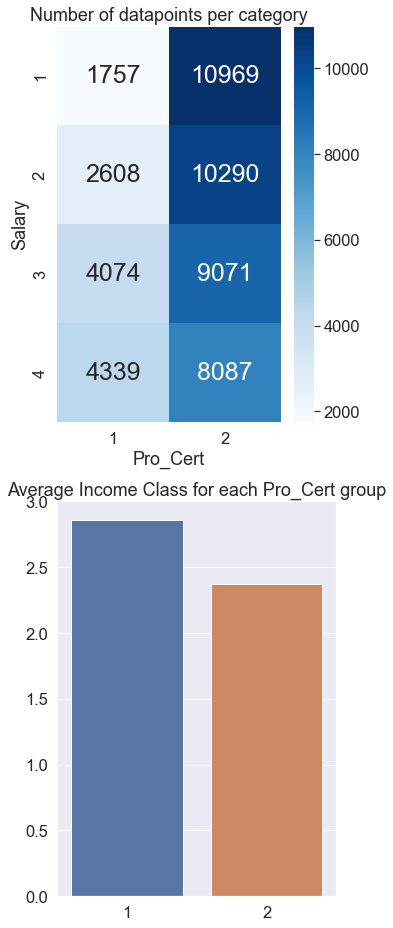

In [126]:
var = 'Pro_Cert'
f, axes = plt.subplots(2, 1, figsize=(5, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,3)]
meanSalary = {}
varmap = {1:'Yes',
          2:'No',}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>Respondents with professional certificates appears to earn more on average but not much more.

<b>Government-Issued Certificates (Gov_Cert) vs Salary</b>

2 ( No ) : 2.98
1 ( Yes ) : 2.85
-1 ( Do not own certificate in Pro_Cert ) : 2.37


[Text(0.5, 1.0, 'Average Income Class for each Gov_Cert group')]

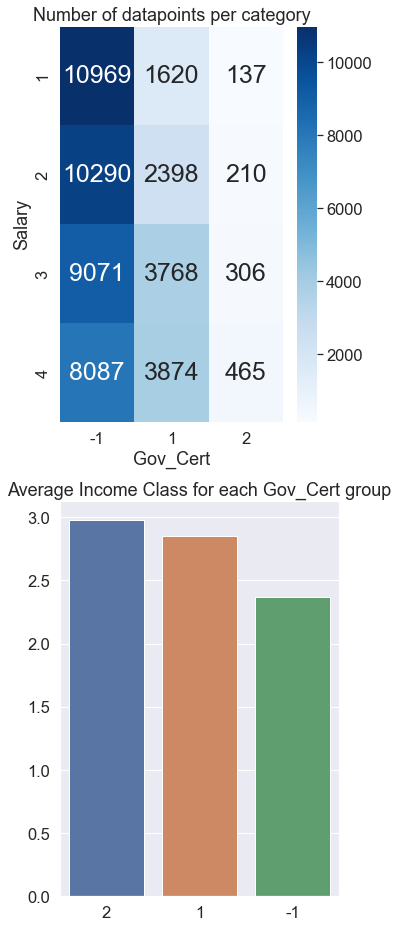

In [127]:
var = 'Gov_Cert'
f, axes = plt.subplots(2, 1, figsize=(5, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [-1,1,2]
meanSalary = {}
varmap = {-1: 'Do not own certificate in Pro_Cert',
          1:'Yes',
          2:'No',}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>Whether one's professional certificate is issued by the government does not seem to have much impact on one's salary.

<b>Need for such certificates (Cert_Need) vs Salary</b>

1 ( Yes ) : 2.9
2 ( No ) : 2.6
-1 ( Do not own certificate in Pro_Cert ) : 2.37


[Text(0.5, 1.0, 'Average Income Class for each Cert_Need group')]

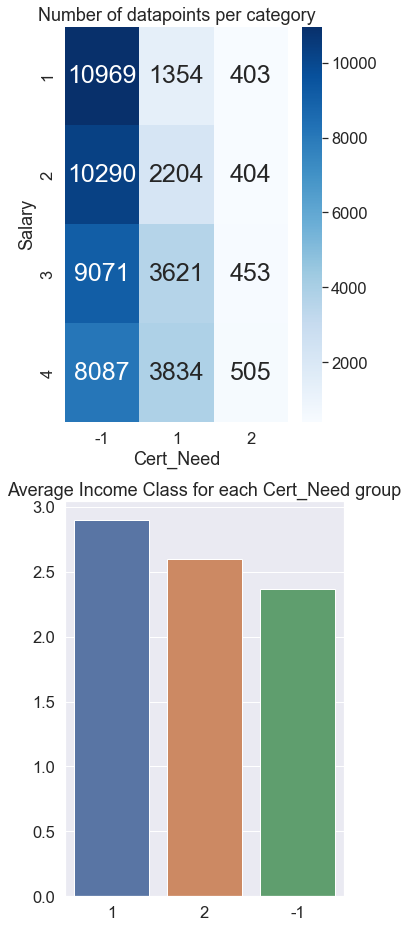

In [128]:
var = 'Cert_Need'
f, axes = plt.subplots(2, 1, figsize=(5, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [-1,1,2]
meanSalary = {}
varmap = {-1: 'Do not own certificate in Pro_Cert',
          1:'Yes',
          2:'No',}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>For those with professional certificates, if their job requires them to have the certificate, they are generally better paid.

<b>Disability Status (Disability) vs Salary</b>

2 ( No ) : 2.5
1 ( Yes ) : 2.18


[Text(0.5, 1.0, 'Average Income Class for each Disability group')]

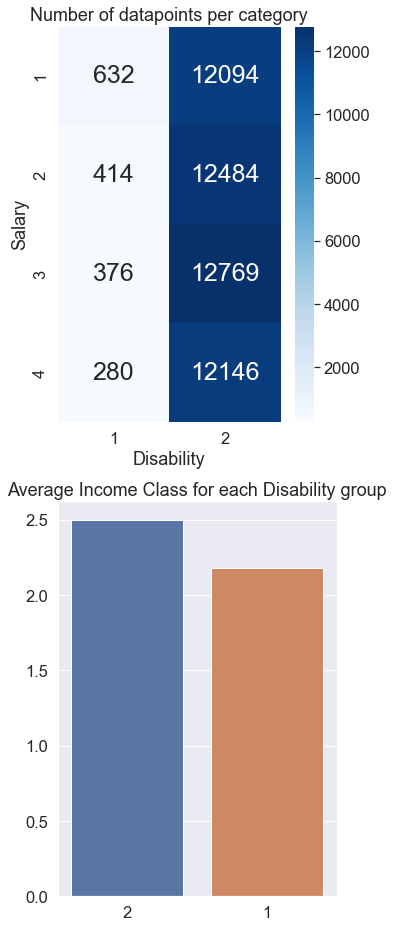

In [129]:
var = 'Disability'
f, axes = plt.subplots(2, 1, figsize=(5, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,3)]
meanSalary = {}
varmap = {1:'Yes',
          2:'No',}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>Respondents with disability earn less on average and they tend to work at jobs in the lower income classes.

<b>Citizenship Status (Citizenship) vs Salary</b>

3 ( Native, born abroad of US parent(s) ) : 2.64
4 ( Foreign born, US cit by naturalization ) : 2.6
1 ( Native, born in US ) : 2.52
2 ( Native, born in PR or US outlying area ) : 2.17
5 ( Foreign born, not a US citizen ) : 2.15


[Text(0.5, 1.0, 'Average Income Class for each Citizenship group')]

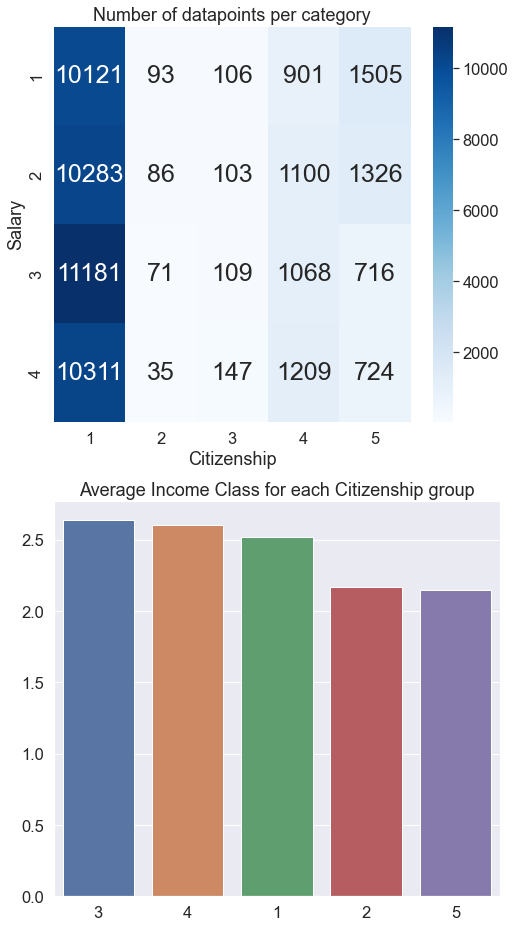

In [130]:
var = 'Citizenship'
f, axes = plt.subplots(2, 1, figsize=(8, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,6)]
meanSalary = {}
varmap = {1:'Native, born in US',
          2:'Native, born in PR or US outlying area',
          3:'Native, born abroad of US parent(s)',
          4:'Foreign born, US cit by naturalization',
          5:'Foreign born, not a US citizen'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>It appears that there is no clear distinction between native and foreign-born. However, it seems that non-citizens generally have a lower salary.

<b>Last Week Working Hours (Last Week Working Hrs) vs Salary</b>

1 : 30.44
2 : 38.72
3 : 40.93
4 : 42.87


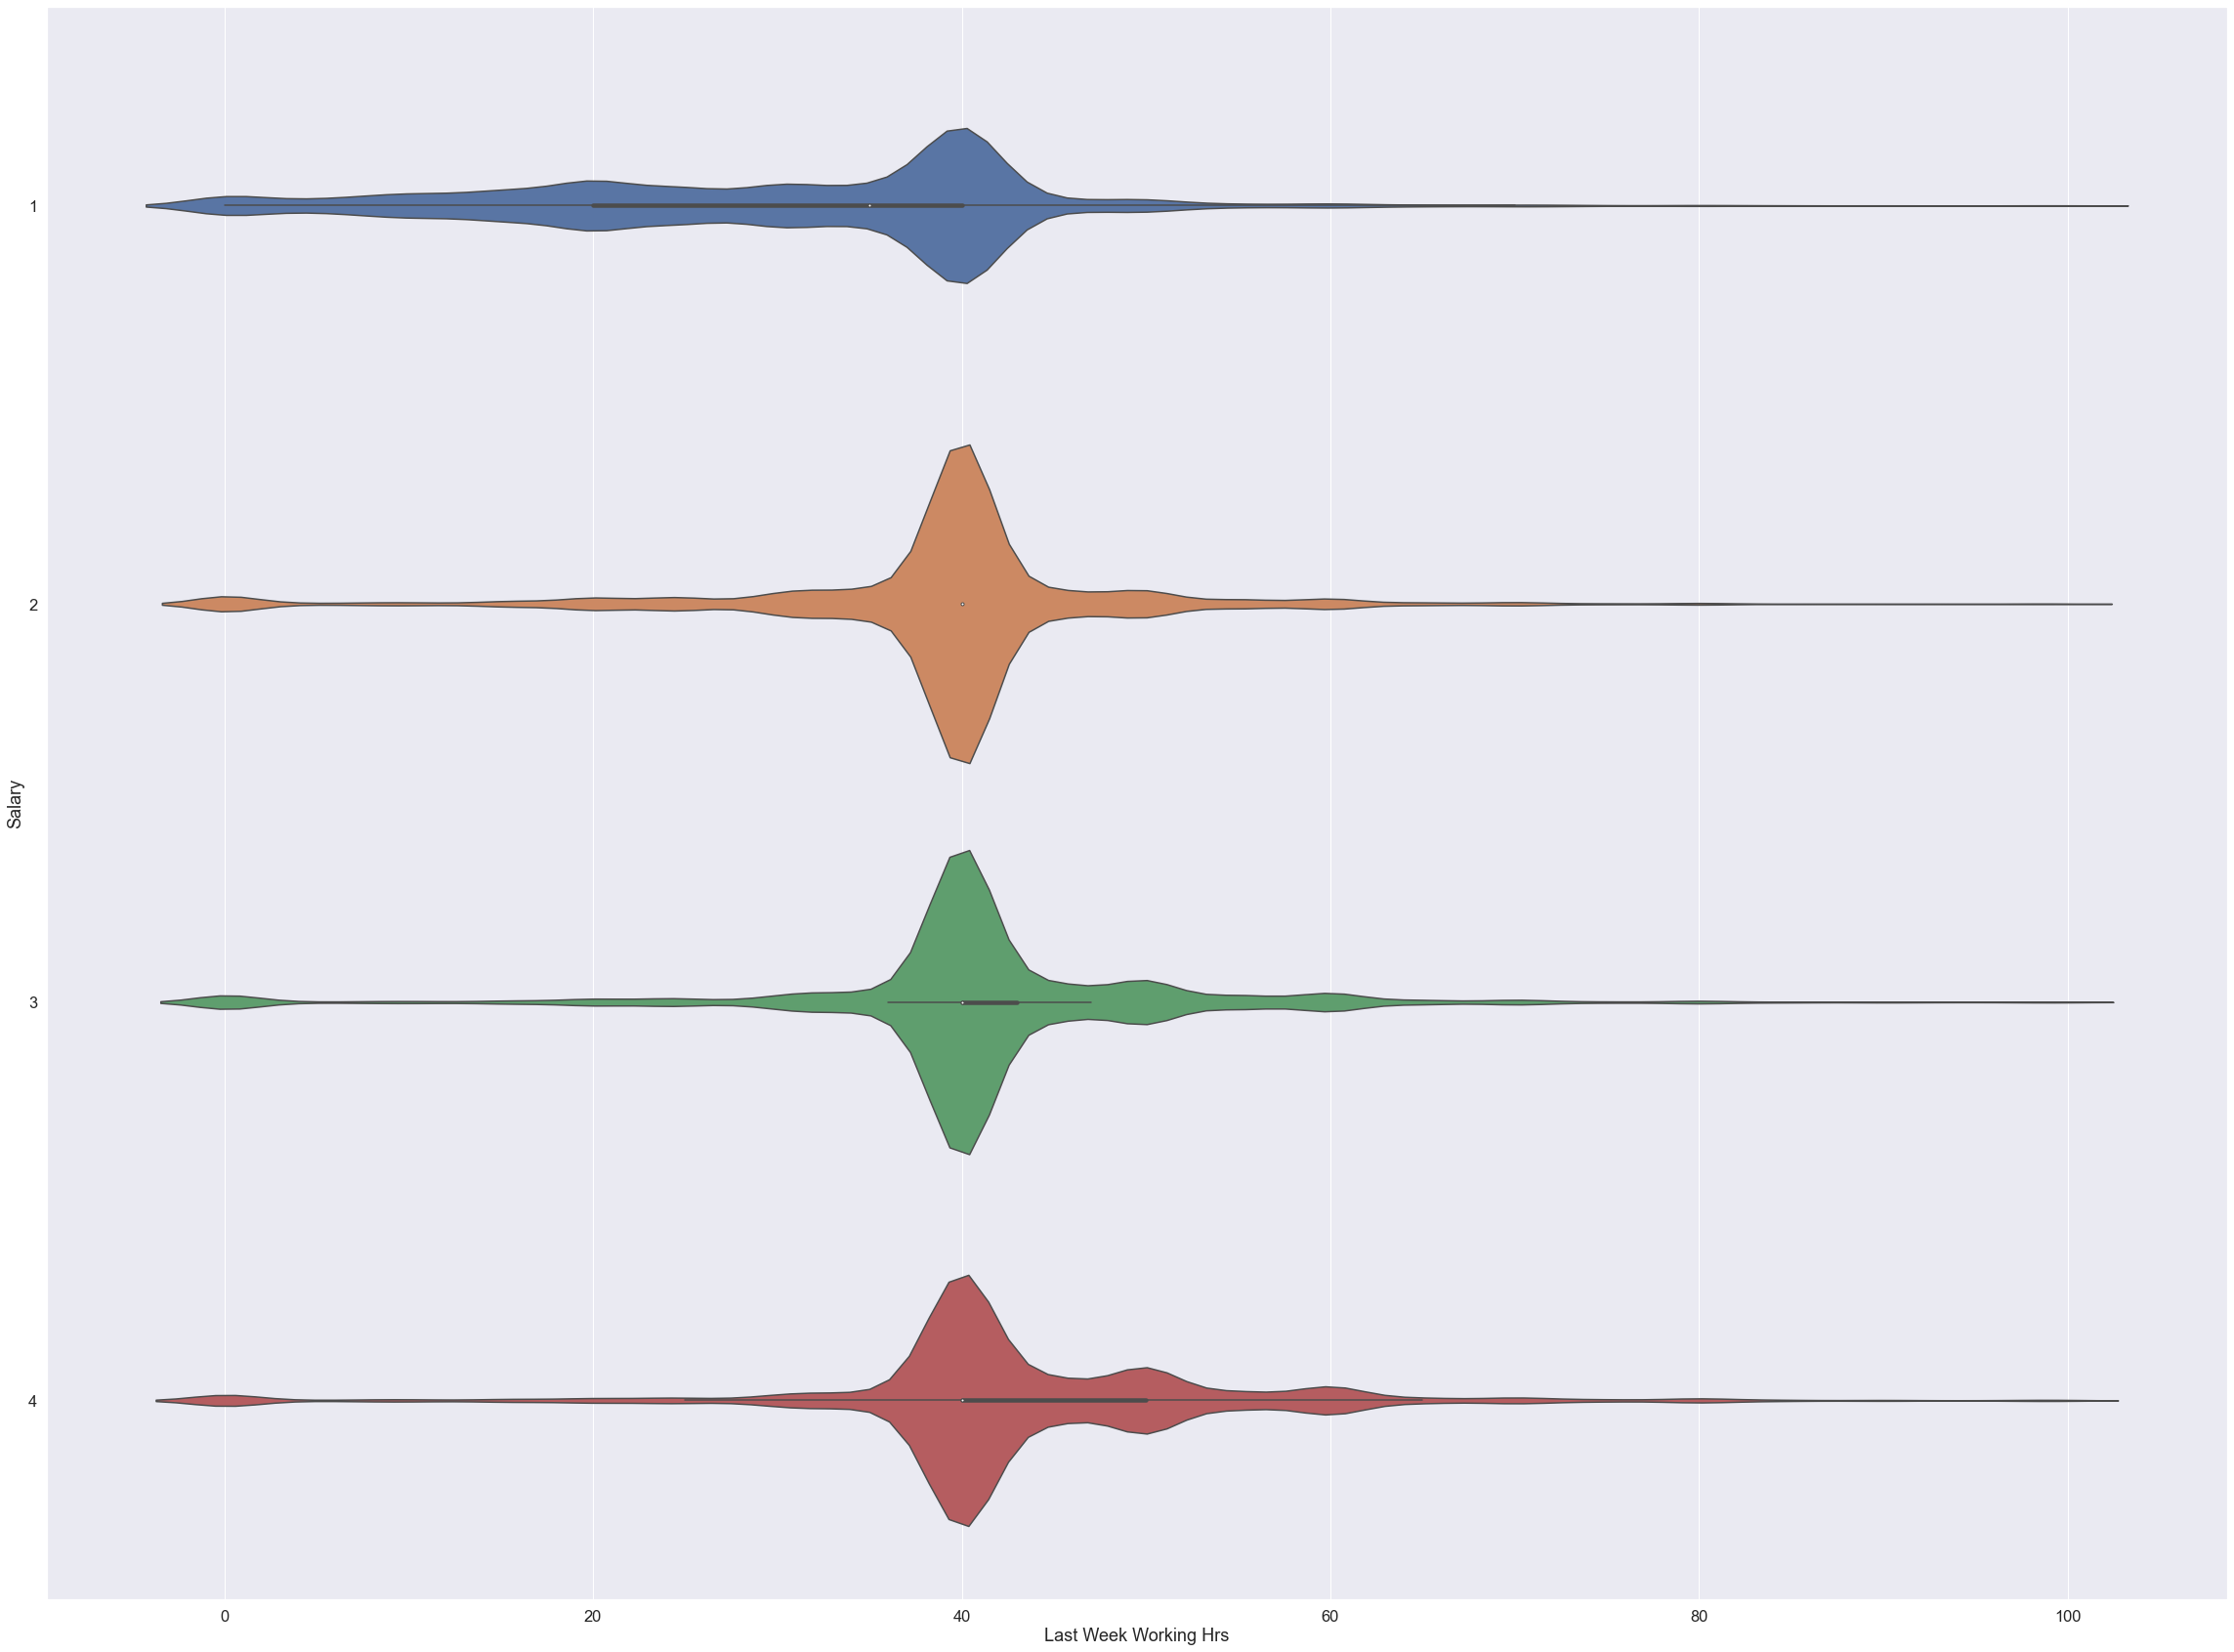

In [131]:
f, axes = plt.subplots(figsize=(40, 30))
sb.violinplot(data=train, y='Salary', x='Last Week Working Hrs', ax=axes, orient='h')

varTypes = [x for x in range(1,5)]

for typ in varTypes:
    data = train[train['Salary']==typ]
    print(typ, ':', '{:.2f}'.format(data['Last Week Working Hrs'].mean()))

<b>Insights:</b>
<br>It appears that people with lower salary work less hours per week on average.

<b>Whether they work less than 35hrs for at least 1 week last year (Less than 35hrs for at least 1 week) vs Salary</b>

2 ( No ) : 2.74
1 ( Yes ) : 2.15
0 ( Non-Full-Time Workers ) : 1.38


[Text(0.5, 1.0, 'Average Income Class for each Less than 35hrs for at least 1 week group')]

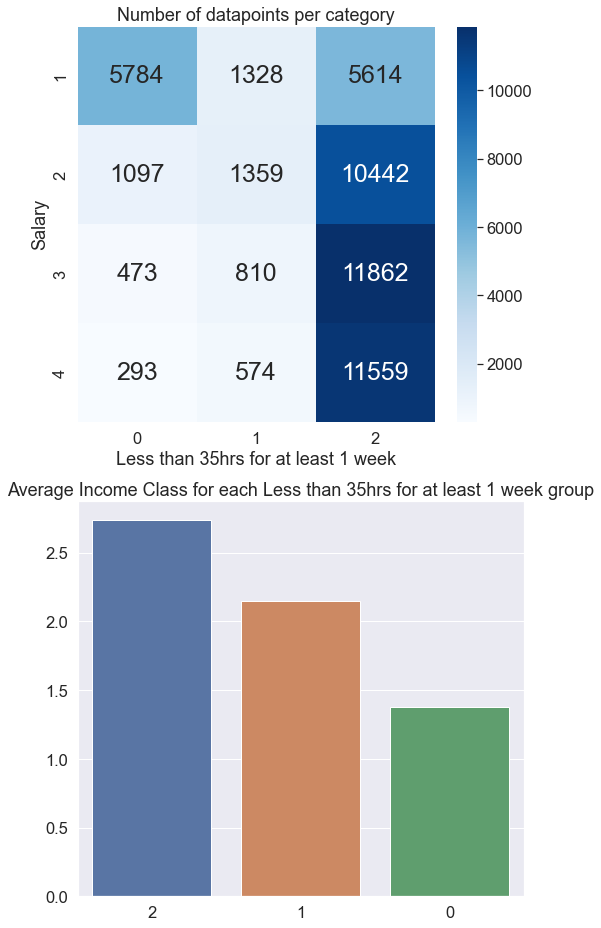

In [132]:
var = 'Less than 35hrs for at least 1 week'
f, axes = plt.subplots(2, 1, figsize=(8, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(0,3)]
meanSalary = {}
varmap = {0:'Non-Full-Time Workers',
          1:'Yes',
          2:'No',
          }

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>Those who work less than 35 hours for more than 1 week earn less on average

<b>Detailed Household Status (Detailed Household Status) vs Salary</b>

2 ( Spouse of householder ) : 2.71
8 ( Secondary individual ) : 2.67
1 ( Householder ) : 2.65
7 ( Nonrelative of householder ) : 2.19
6 ( Other relative of householder ) : 1.94
5 ( Child of householder, 18 and above ) : 1.66
4 ( Child of householder, under 18, ever married ) : 1.23
3 ( Child of householder, under 18, single ) : 1.09


[Text(0.5, 1.0, 'Average Income Class for each Detailed Household Status group')]

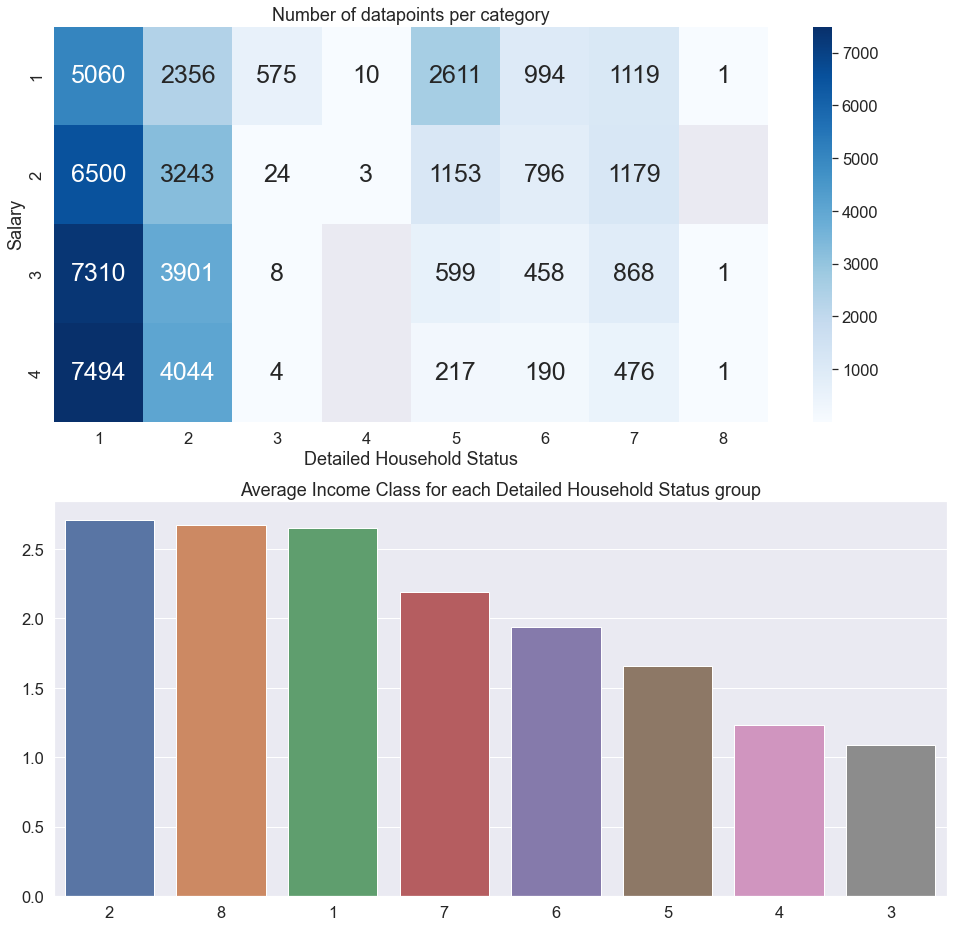

In [133]:
var = 'Detailed Household Status'
f, axes = plt.subplots(2, 1, figsize=(16, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,9)]
meanSalary = {}
varmap = {1:'Householder',
          2:'Spouse of householder',
          3:'Child of householder, under 18, single',
          4:'Child of householder, under 18, ever married',
          5:'Child of householder, 18 and above',
          6:'Other relative of householder',
          7:'Nonrelative of householder',
          8:'Secondary individual'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>It does not seem to have a trend except that children of householders tend to earn less, possibly due to their younger age.

<b>Usually work more than 35hrs weekly (More than 35hrs weekly) vs Salary</b>

0 ( Did not work more than 35 hours last week ) : 2.68
1 ( Yes ) : 2.48
2 ( No ) : 1.45


[Text(0.5, 1.0, 'Average Income Class for each More than 35hrs weekly group')]

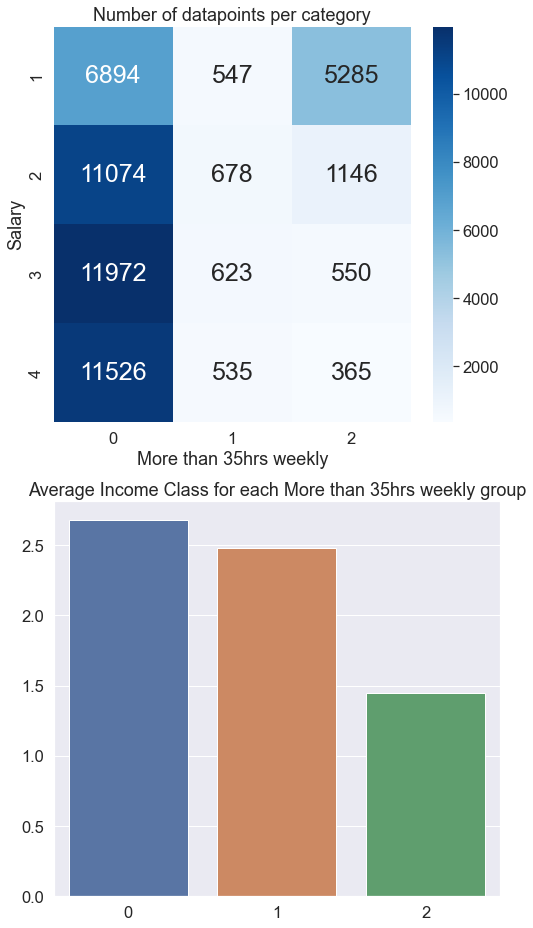

In [134]:
var = 'More than 35hrs weekly'
f, axes = plt.subplots(2, 1, figsize=(8, 16))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [0, 1, 2]
meanSalary = {}
varmap = {0:'Did not work more than 35 hours last week',
          1:'Yes',
          2:'No',
         }

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>It appears that working longer hours tend to be associated with a higher pay

<b>Weekly Working Hours (HrsWeek) vs Salary</b>

1 : 31.59
2 : 39.40
3 : 41.49
4 : 43.28


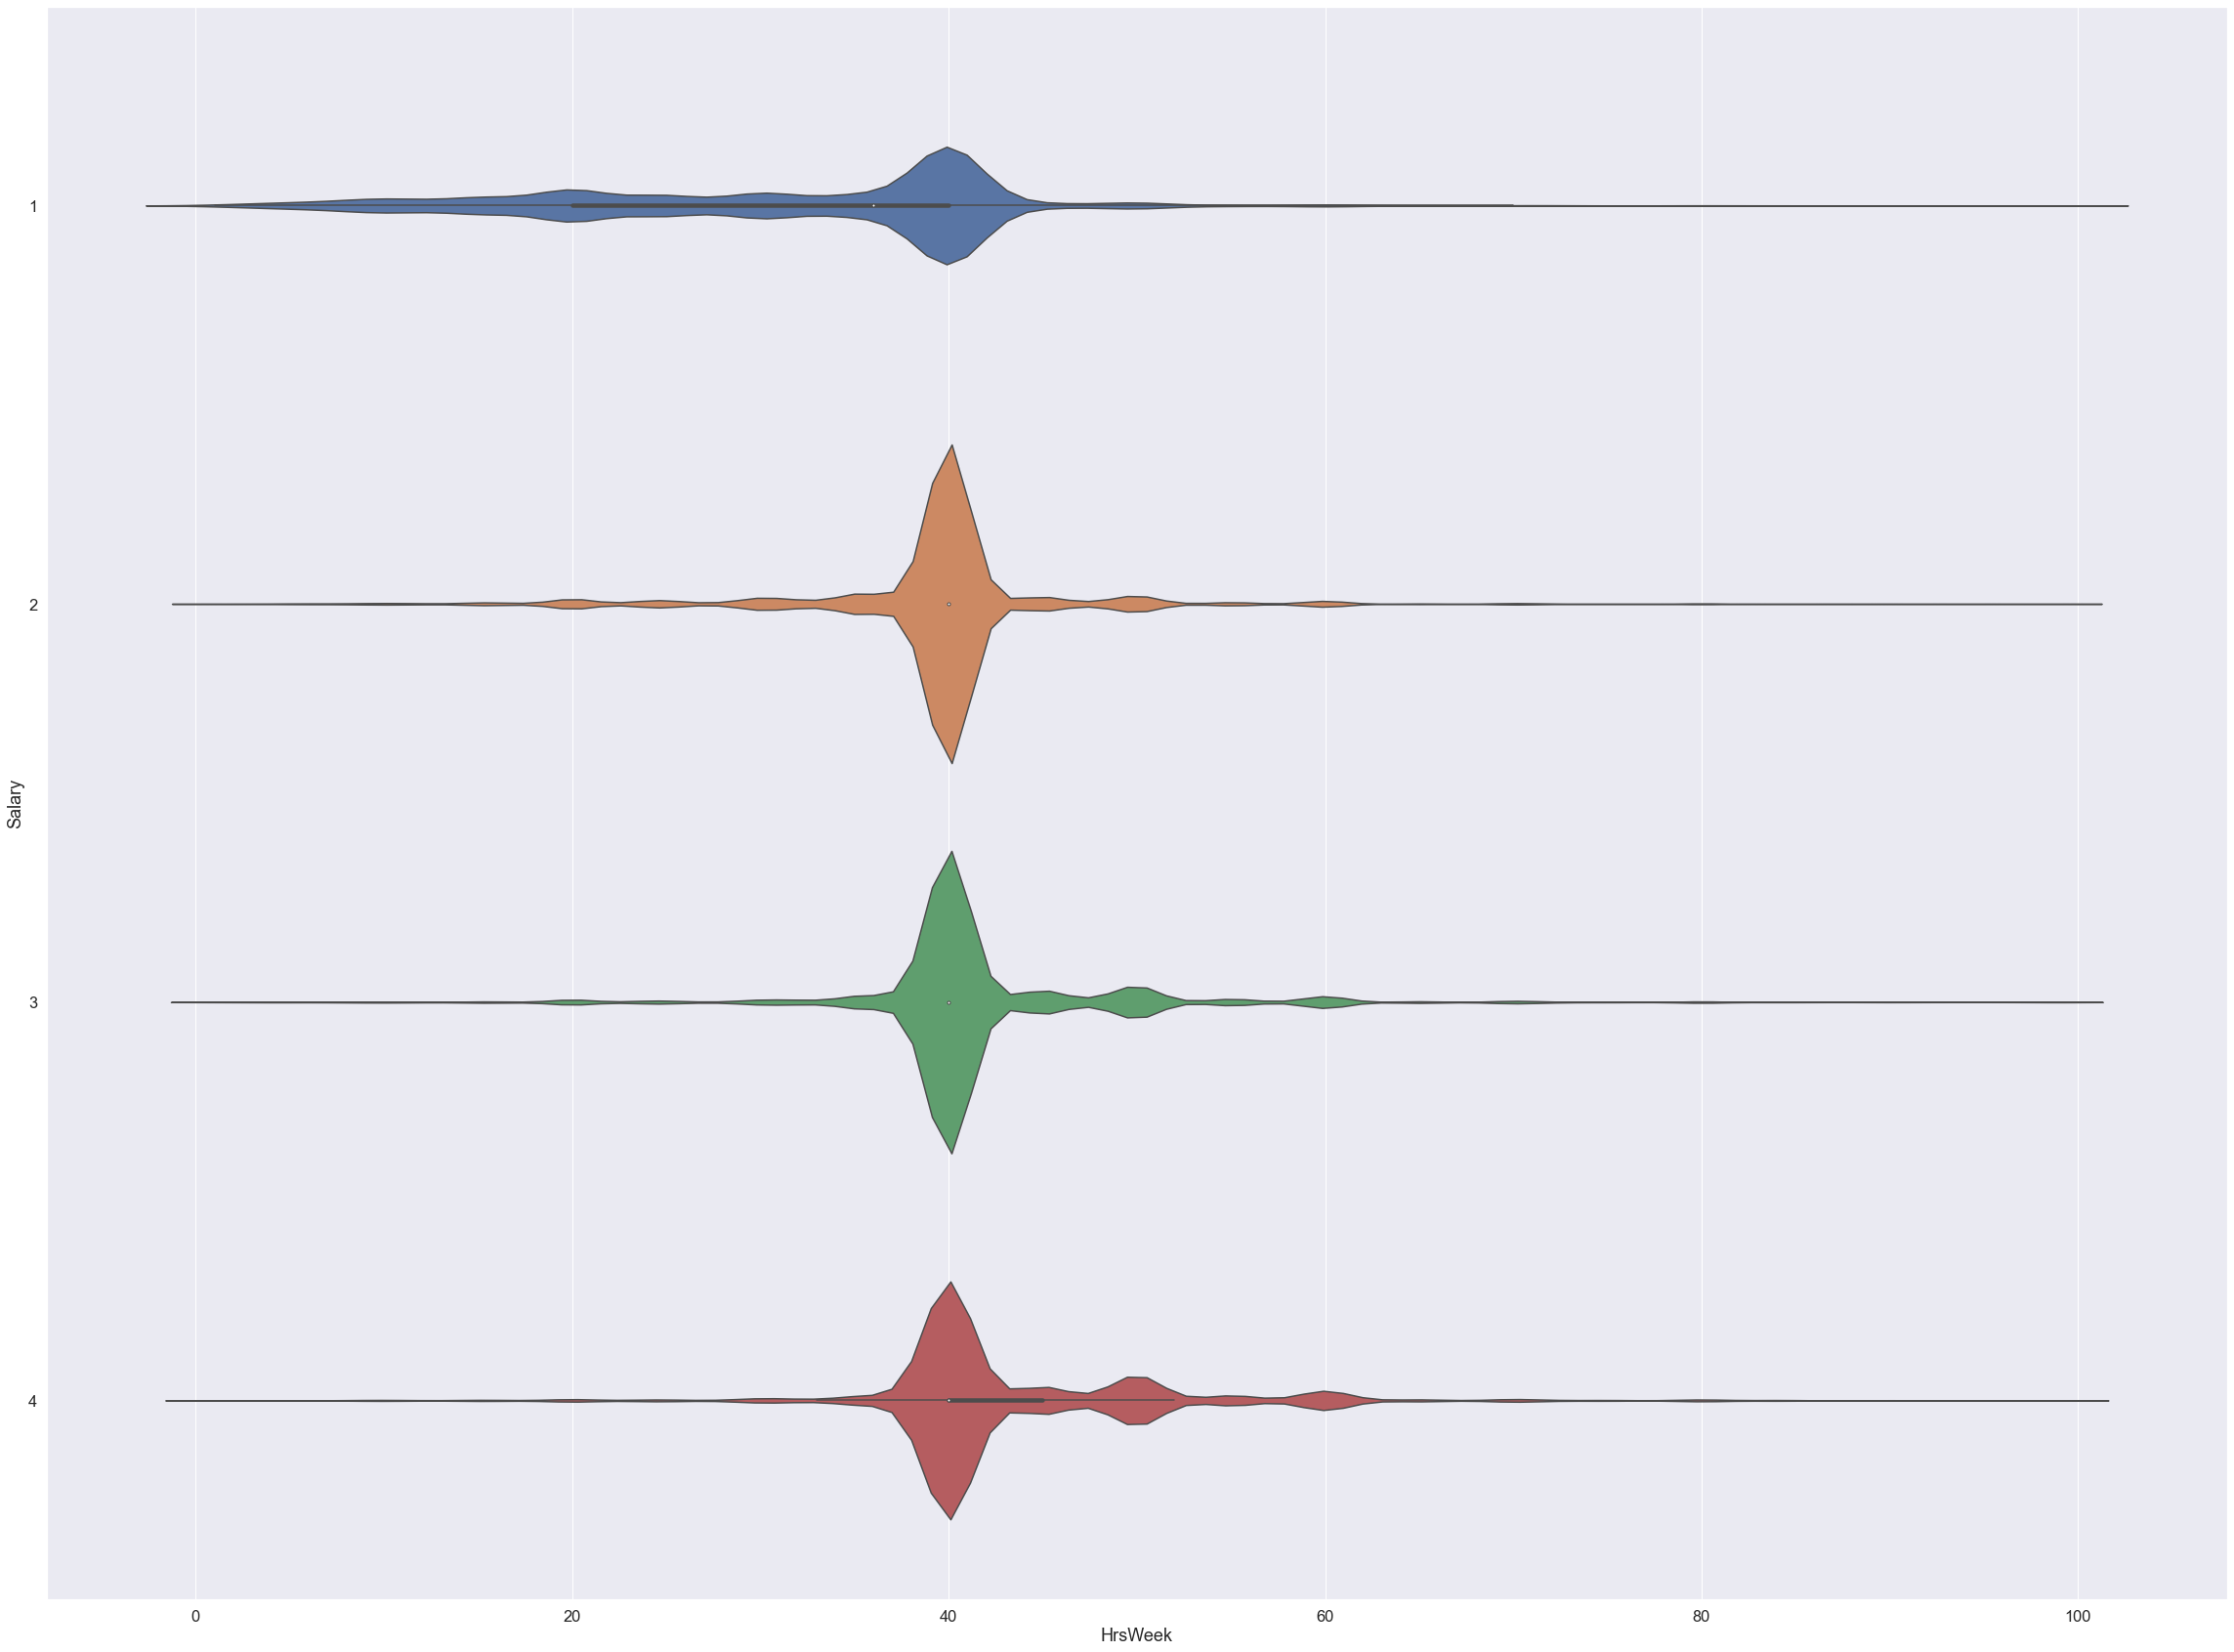

In [135]:
f, axes = plt.subplots(figsize=(40, 30))
sb.violinplot(data=train, y='Salary', x='HrsWeek', ax=axes, orient='h')

varTypes = [x for x in range(1,5)]

for typ in varTypes:
    data = train[train['Salary']==typ]
    print(typ, ':', '{:.2f}'.format(data['HrsWeek'].mean()))

<b>Insights:</b>
<br>It appears that people with lower salary usually work less hours per week on average.

<b>Industry (Industry) vs Salary</b>

2 ( Mining ) : 3.17
13 ( Public administration ) : 2.95
8 ( Financial activities ) : 2.9
9 ( Professional and business services ) : 2.87
7 ( Information ) : 2.84
4 ( Manufacturing ) : 2.69
6 ( Transportation and utilities ) : 2.59
3 ( Construction ) : 2.54
10 ( Educational and health services ) : 2.47
5 ( Wholesale and retail trade ) : 2.14
12 ( Other services ) : 2.13
1 ( Agriculture, forestry,fishing, and hunting ) : 2.05
11 ( Leisure and hospitality ) : 1.61


[Text(0.5, 1.0, 'Average Income Class for each Industry group')]

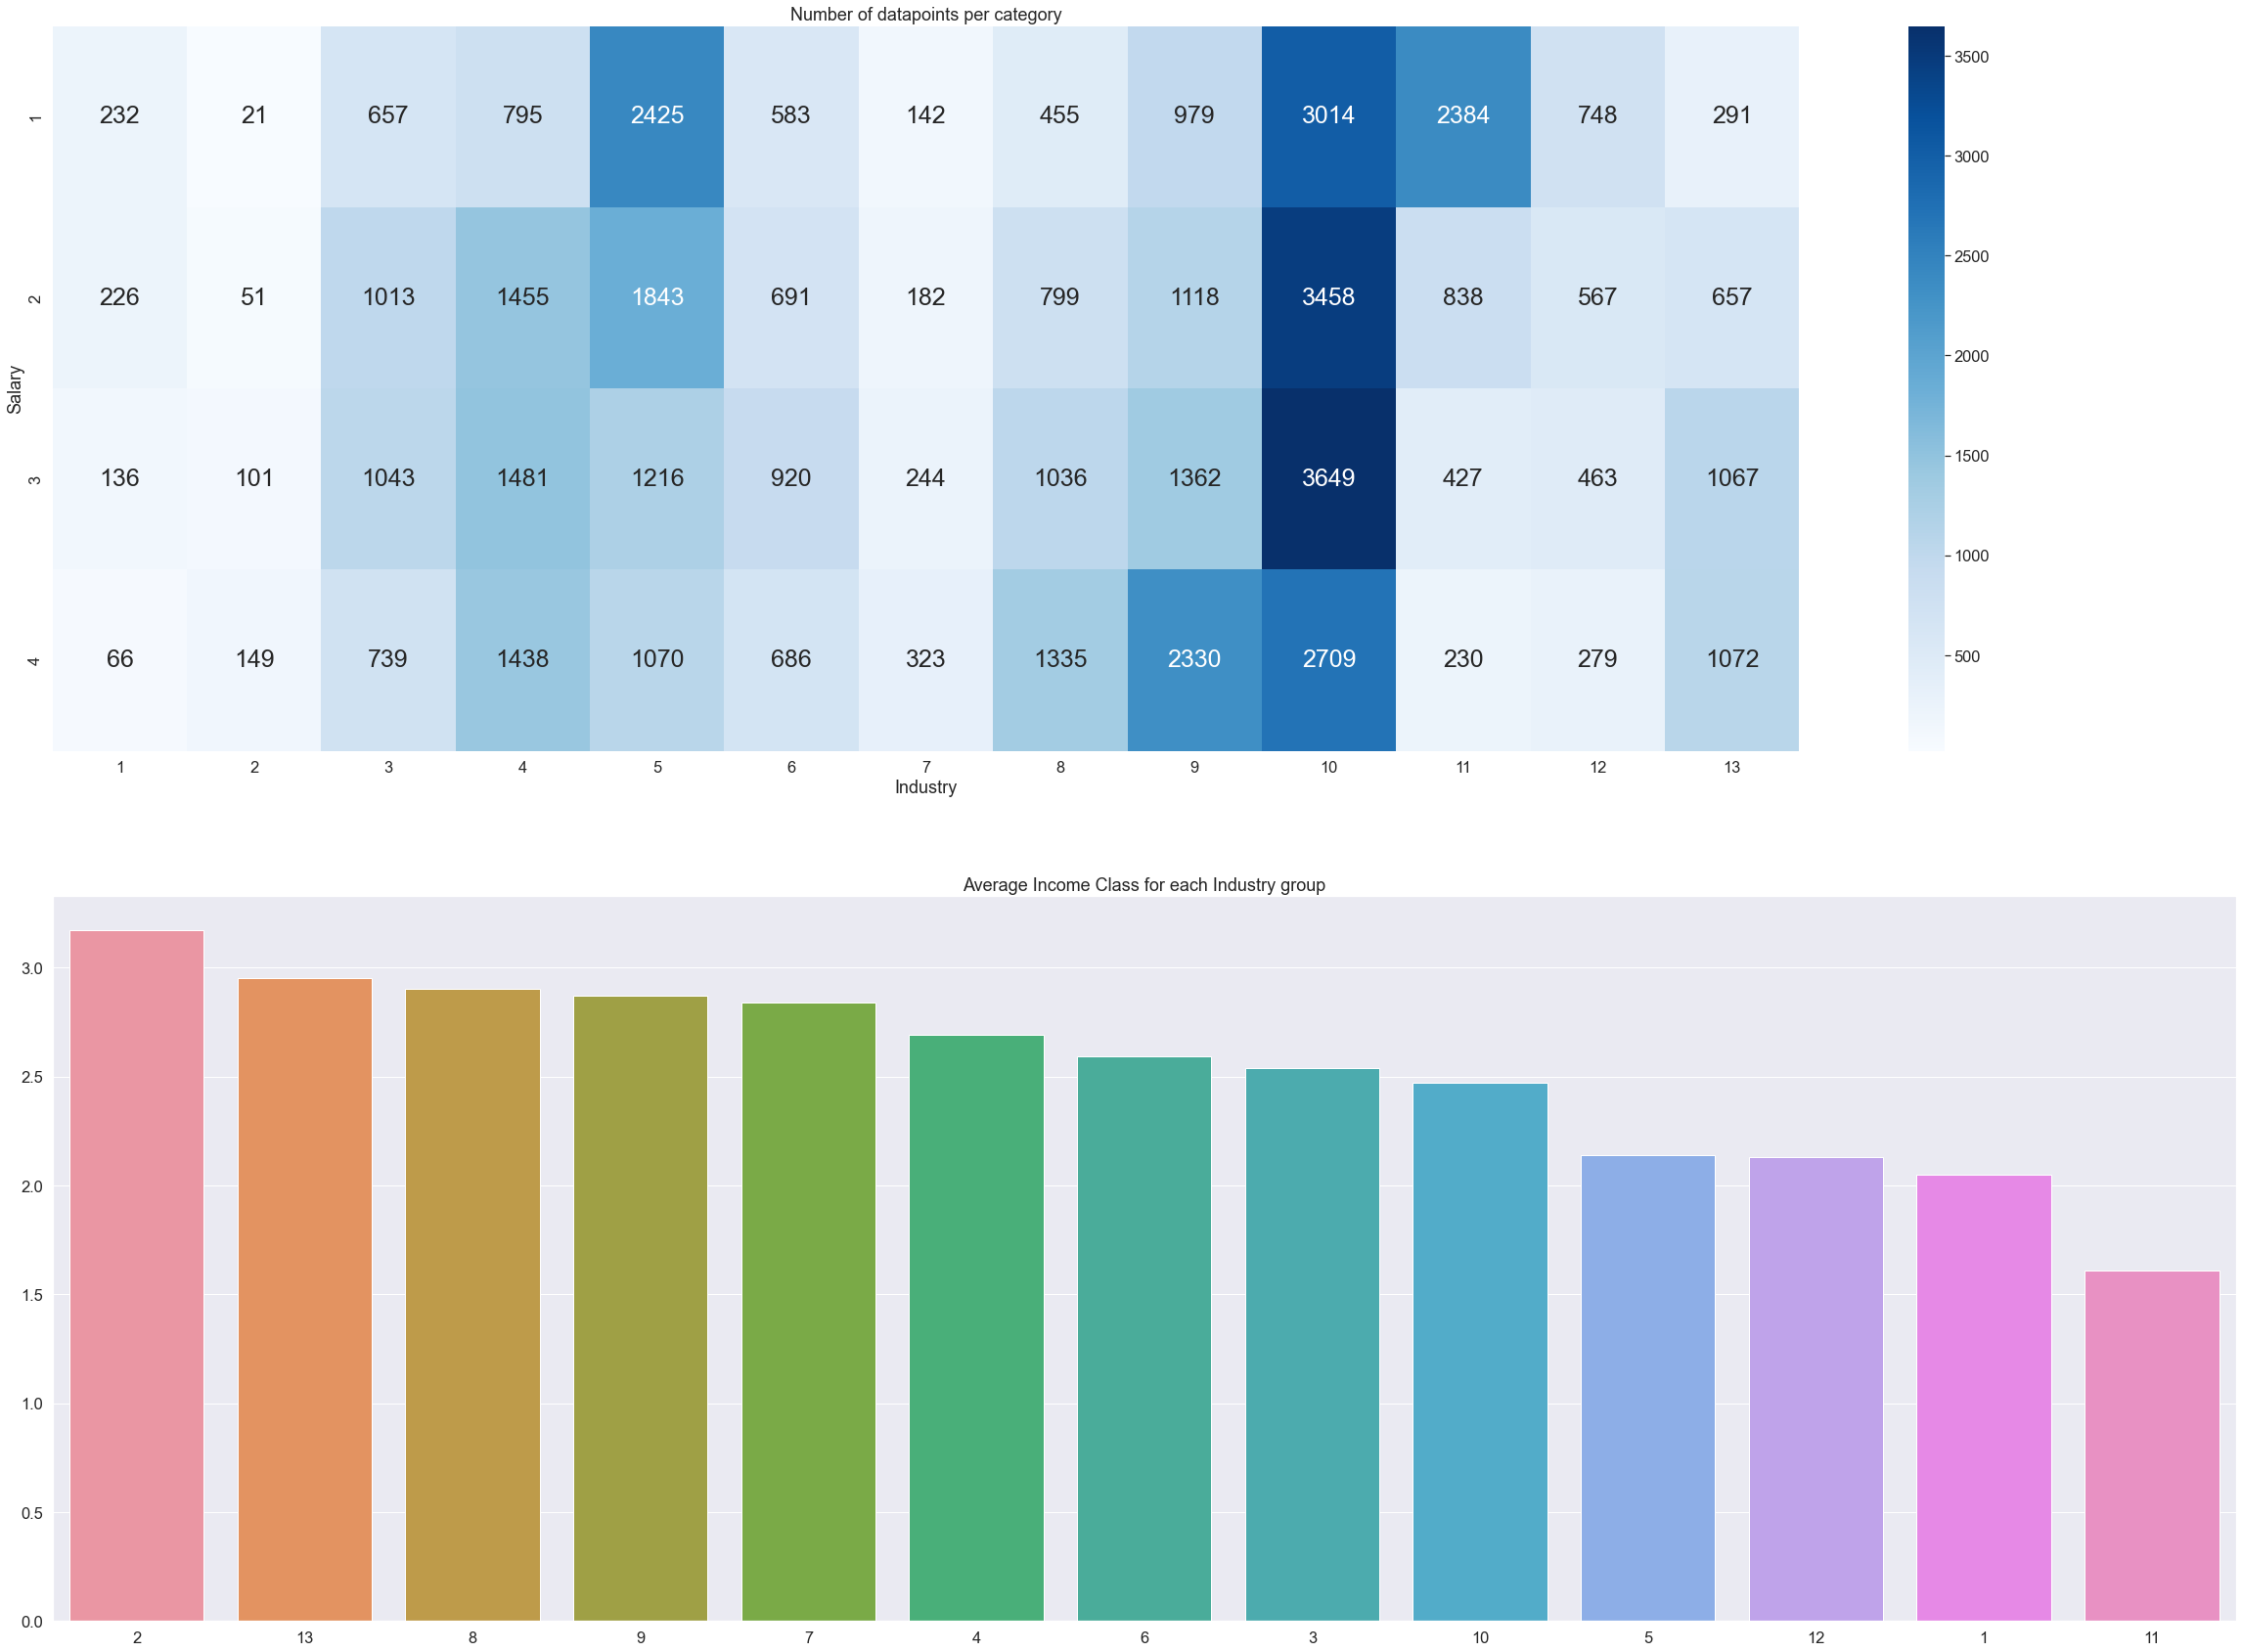

In [136]:
var = 'Industry'
f, axes = plt.subplots(2, 1, figsize=(40, 30))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,14)]
meanSalary = {}
varmap = {1:'Agriculture, forestry,fishing, and hunting',
          2:'Mining',
          3:'Construction',
          4:'Manufacturing',
          5:'Wholesale and retail trade',
          6:'Transportation and utilities',
          7:'Information',
          8:'Financial activities',
          9:'Professional and business services',
          10:'Educational and health services',
          11:'Leisure and hospitality',
          12:'Other services',
          13:'Public administration'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>We see that the industries with the most compensation are in the order:
<br>Mining
<br>Public administration
<br>Financial activities
<br>Professional and business services
<br>Information
<br>Manufacturing
<br>Transportation and utilities
<br>Construction
<br>Educational and health services
<br>Wholesale and retail trade
<br>Other services
<br>Agriculture, forestry,fishing, and hunting
<br>Leisure and hospitality

<b>Occupation Group (Occupation Group) vs Salary</b>

1 ( Management, business, and financial occupations ) : 3.13
2 ( Professional and related occupations ) : 2.91
8 ( Installation, maintenance, and repair occupations ) : 2.64
7 ( Construction and extraction occupations ) : 2.39
4 ( Sales and related occupations ) : 2.27
9 ( Production occupations ) : 2.27
5 ( Office and administrative support occupations ) : 2.15
10 ( Transportation and material moving occupations ) : 2.03
6 ( Farming, fishing, and forestry occupations ) : 1.83
3 ( Service occupations ) : 1.74


[Text(0.5, 1.0, 'Average Income Class for each Occupation Group group')]

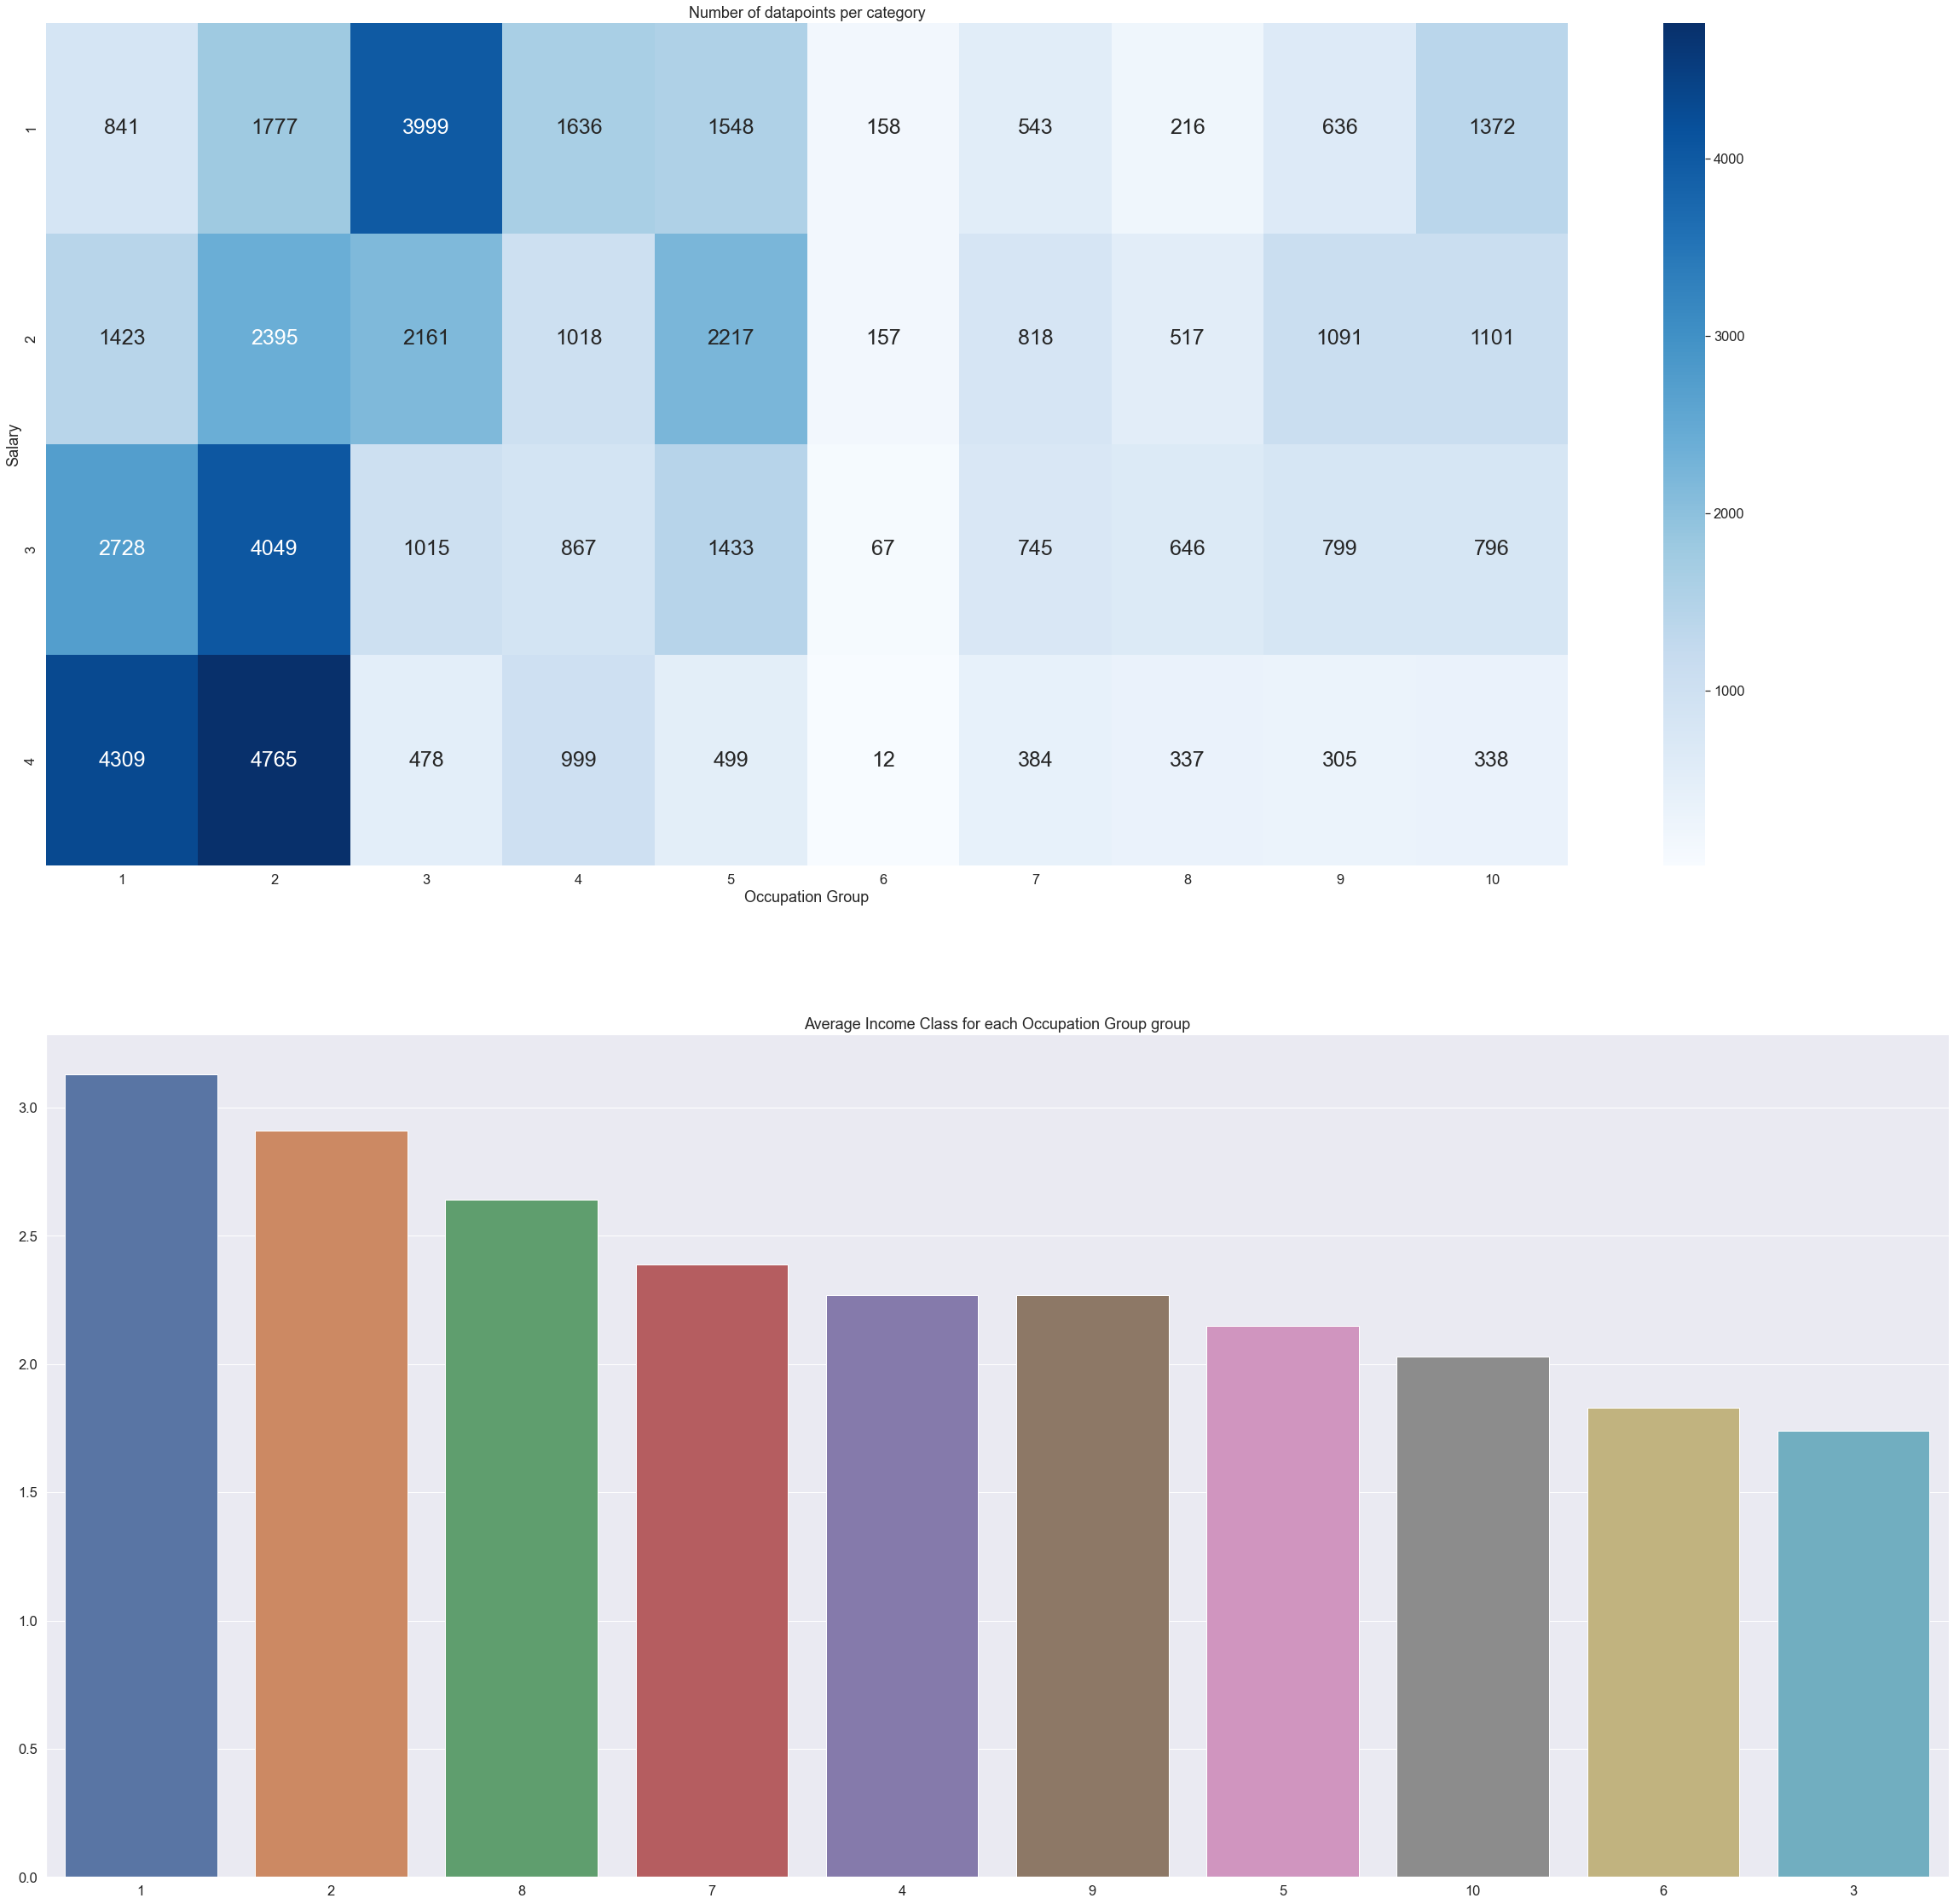

In [137]:
var = 'Occupation Group'
f, axes = plt.subplots(2, 1, figsize=(40, 40))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
data
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,11)]
meanSalary = {}
varmap = {1 : 'Management, business, and financial occupations',
        2 : 'Professional and related occupations',
        3 : 'Service occupations',
        4 : 'Sales and related occupations',
        5 : 'Office and administrative support occupations',
        6 : 'Farming, fishing, and forestry occupations',
        7 : 'Construction and extraction occupations',
        8 : 'Installation, maintenance, and repair occupations',
        9 : 'Production occupations',
        10 : 'Transportation and material moving occupations'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>We see that occupations related to management and finance are the most well-paid while service occupations are paid the lowest.

<b>Work Class (WorkClass) vs Salary</b>

2 ( Government-federal ) : 3.1
5 ( Self-employed, incorporated ) : 2.86
3 ( Government-state ) : 2.6
4 ( Government - local ) : 2.6
1 ( Private ) : 2.44
6 ( Self-employed, unincorporated ) : 1.83
7 ( Without pay ) : nan


[Text(0.5, 1.0, 'Average Income Class for each WorkClass group')]

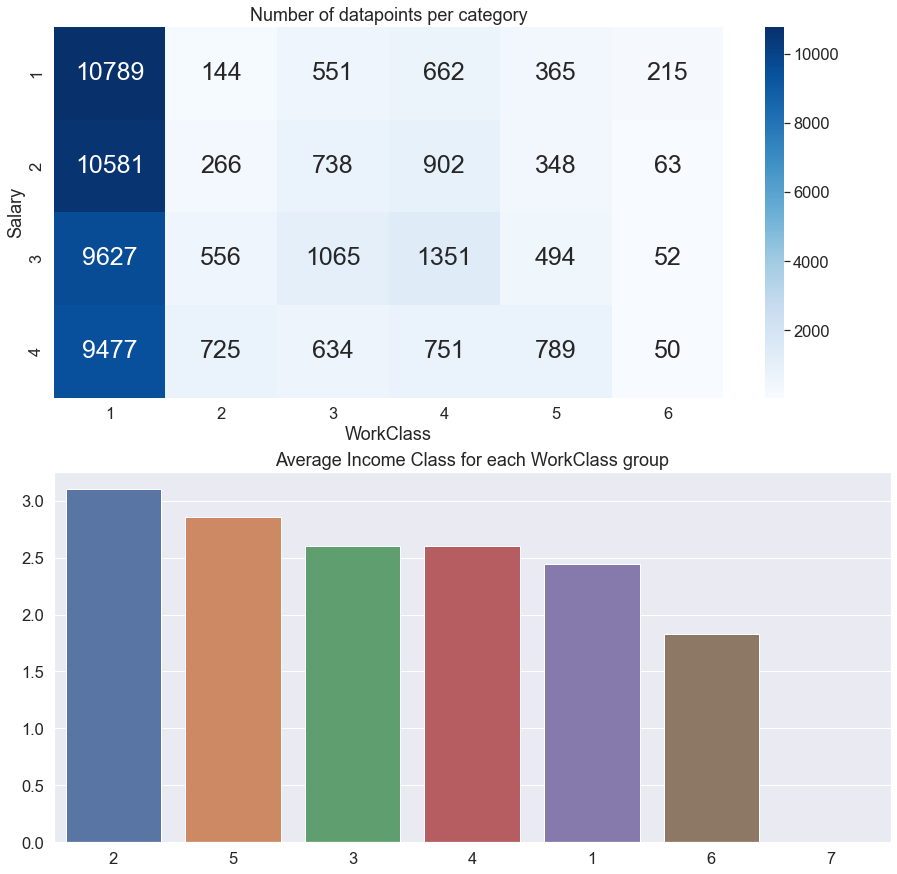

In [138]:
var = 'WorkClass'
f, axes = plt.subplots(2, 1, figsize=(15, 15))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,8)]
meanSalary = {}
varmap = {1: 'Private',
          2:'Government-federal',
          3:'Government-state',
          4:'Government - local',
          5:'Self-employed, incorporated',
          6:'Self-employed, unincorporated',
          7: 'Without pay'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>We see that generally, the government sector pays better than the private sector and within the government sector, federal pays better than local which in turn pays better than state. For the private sector, nonprofit appears to pay better than profit in general and self-employed people with incorporated companies tend to earn more than self-employed people without incorporated companies who tends to earn in the lowest income band.

<b>Longest industry experience (Longest Industry) vs Salary</b>

2 ( MINING ) : 3.29
9 ( UTILITIES ) : 3.23
13 ( PROFESSIONAL SCIENTIFIC AND TECHNICAL SERVICES ) : 3.22
11 ( FINANCE AND INSURANCE ) : 3.05
21 ( PUBLIC ADMINISTRATION ) : 2.97
22 ( ARMED FORCES ) : 2.97
10 ( INFORMATION ) : 2.85
4 ( MANUFACTURING - DURABLE GOODS ) : 2.79
6 ( WHOLESALE TRADE ) : 2.69
12 ( REAL ESTATE AND RENTAL AND LEASING ) : 2.61
5 ( MANUFACTURING - NON-DURABLE GOODS ) : 2.57
3 ( CONSTRUCTION ) : 2.53
8 ( TRANSPORTATION AND WAREHOUSING ) : 2.52
15 ( EDUCATIONAL SERVICES ) : 2.48
16 ( HEALTH CARE AND SOCIAL ASSISTANCE SERVICES ) : 2.48
20 ( OTHER SERVICES, EXCEPT PRIVATE HOUSEHOLDS ) : 2.15
14 ( MANAGEMENT, ADMINISTRATIVE AND WASTE MANAGEMENT SERVICES ) : 2.11
1 ( AGRICULTURE, FORESTRY, FISHING, and HUNTING ) : 2.03
7 ( RETAIL TRADE ) : 1.99
17 ( ARTS, ENTERTAINMENT, AND RECREATION ) : 1.96
18 ( ACCOMMODATION AND FOOD SERVICES ) : 1.48
19 ( PRIVATE HOUSEHOLDS ) : 1.42


[Text(0.5, 1.0, 'Average Income Class for each Longest Industry group')]

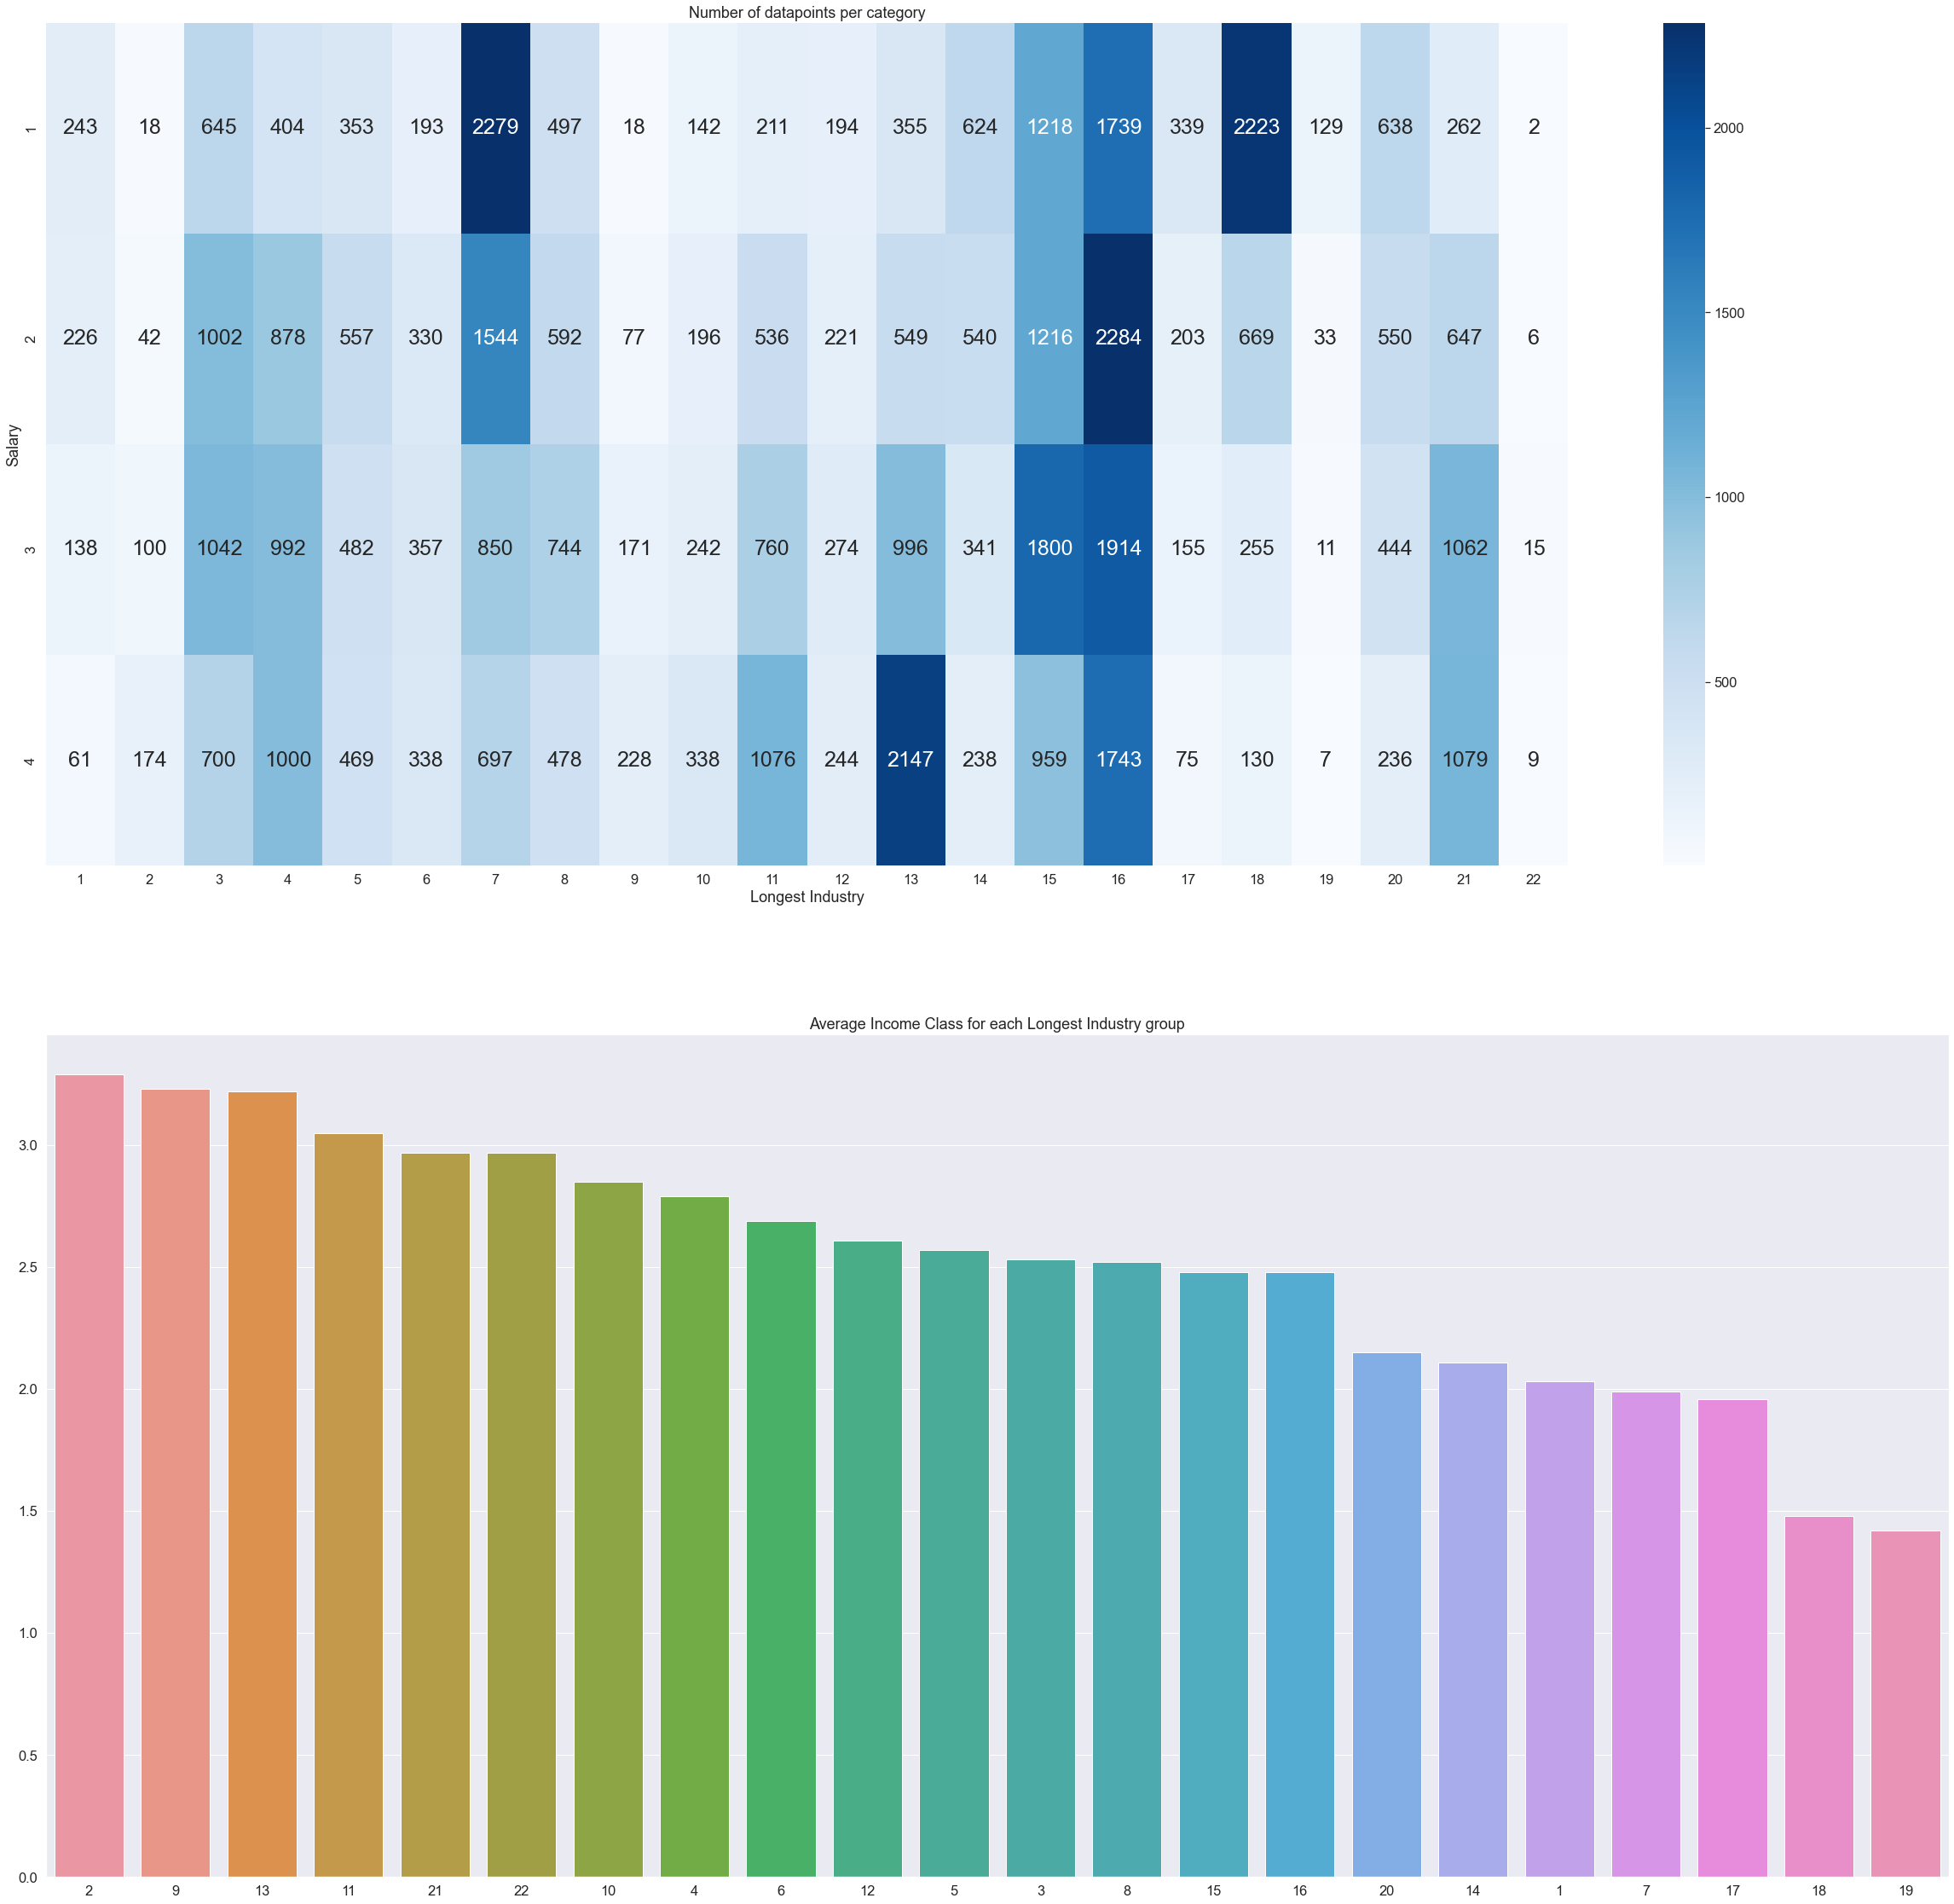

In [139]:
var = 'Longest Industry'
f, axes = plt.subplots(2, 1, figsize=(40, 40))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [x for x in range(1,23)]
meanSalary = {}
varmap = {1 : 'AGRICULTURE, FORESTRY, FISHING, and HUNTING',
        2 : 'MINING',
        3 : 'CONSTRUCTION',
        4 : 'MANUFACTURING - DURABLE GOODS',
        5 : 'MANUFACTURING - NON-DURABLE GOODS',
        6 : 'WHOLESALE TRADE',
        7 : 'RETAIL TRADE',
        8 : 'TRANSPORTATION AND WAREHOUSING',
        9 : 'UTILITIES',
        10 : 'INFORMATION',
        11 : 'FINANCE AND INSURANCE',
        12 : 'REAL ESTATE AND RENTAL AND LEASING',
        13 : 'PROFESSIONAL SCIENTIFIC AND TECHNICAL SERVICES',
        14 : 'MANAGEMENT, ADMINISTRATIVE AND WASTE MANAGEMENT SERVICES',
        15 : 'EDUCATIONAL SERVICES',
        16 : 'HEALTH CARE AND SOCIAL ASSISTANCE SERVICES',
        17 : 'ARTS, ENTERTAINMENT, AND RECREATION',
        18 : 'ACCOMMODATION AND FOOD SERVICES',
        19 : 'PRIVATE HOUSEHOLDS',
        20 : 'OTHER SERVICES, EXCEPT PRIVATE HOUSEHOLDS',
        21 : 'PUBLIC ADMINISTRATION',
        22 : 'ARMED FORCES'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>We see that generally, those with mining, utilities, professional and technical industrial experience are the most well-paid

<b>Longest Work Class experience (Longest Job Class) vs Salary</b>

7 ( SELF-EMPLOYED ) : 2.75
6 ( GOVERNMENT ) : 2.71
5 ( PRIVATE ) : 2.45
1 ( AGRICULTURE, WAGE AND SALARY ) : 2.05
4 ( PRIVATE HOUSEHOLD ) : 1.42
2 ( AGRICULTURE, SELF-EMPLOYED ) : 1.18
8 ( UNPAID ) : 1.0


[Text(0.5, 1.0, 'Average Income Class for each Longest Job Class group')]

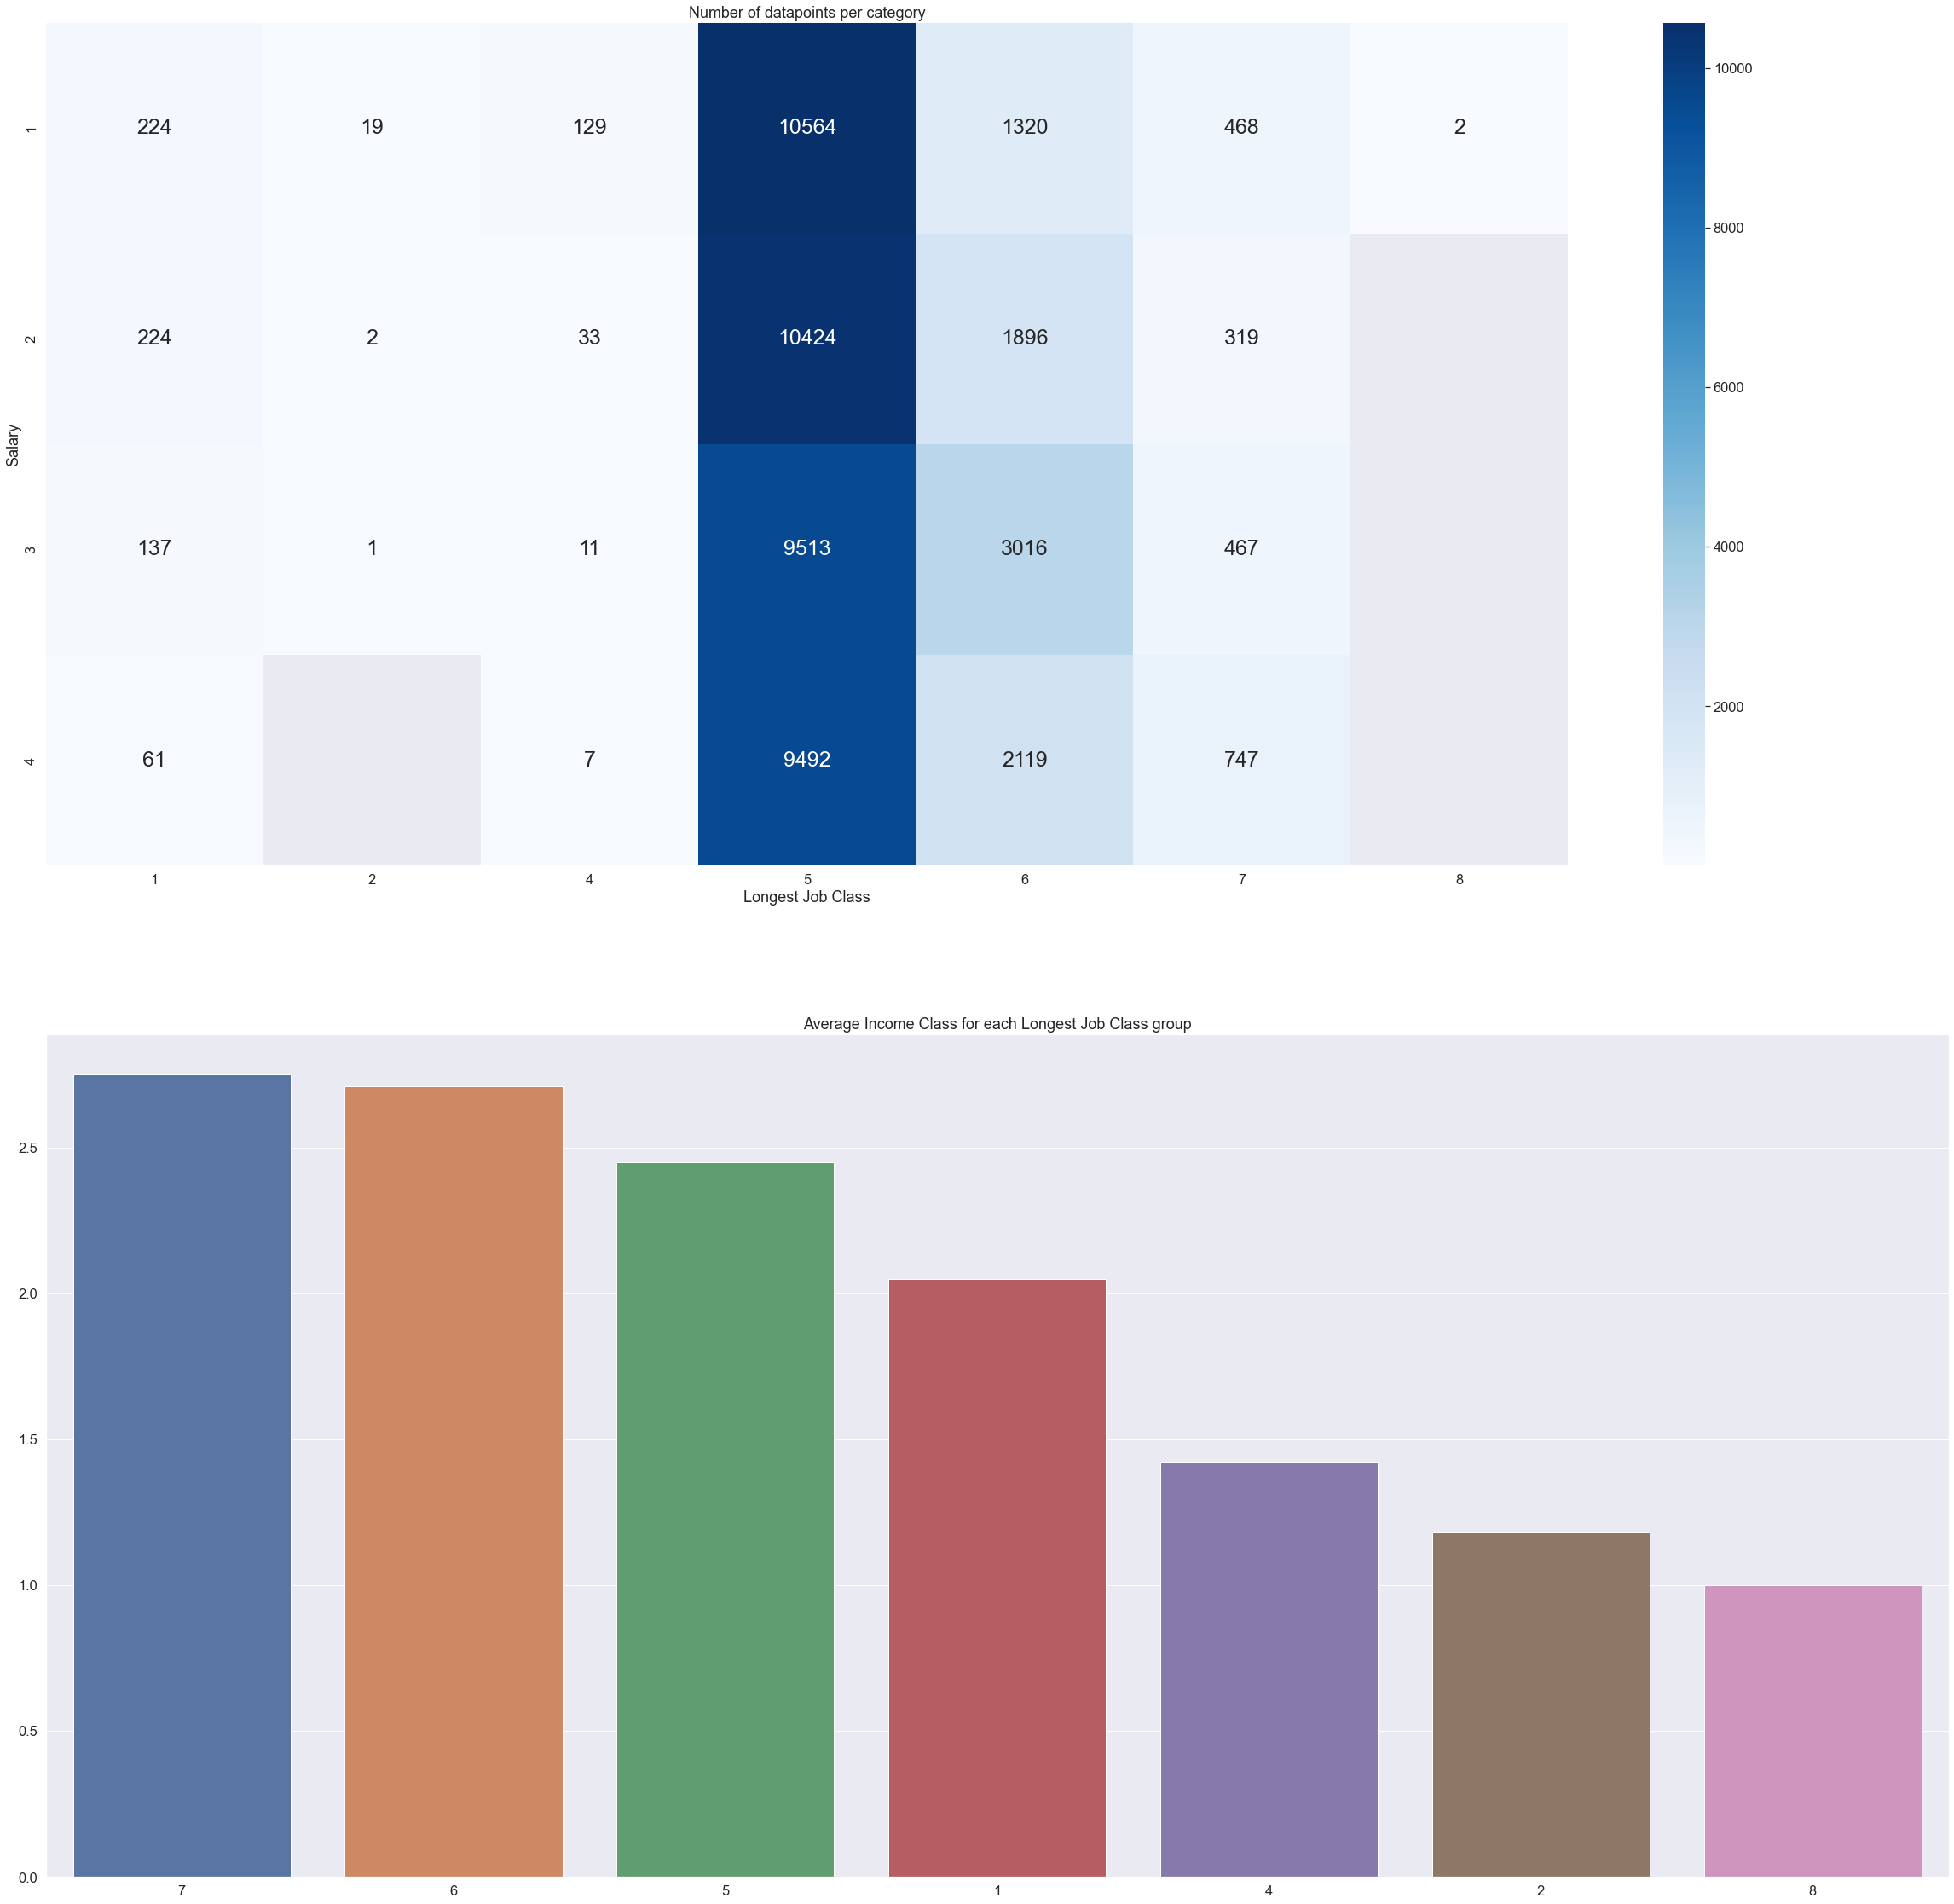

In [140]:
var = 'Longest Job Class'
f, axes = plt.subplots(2, 1, figsize=(40, 40))
data = train[['Salary', var]].pivot_table(columns=var, index='Salary', aggfunc=len)
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes[0], cmap='Blues', fmt='g').set(title='Number of datapoints per category')

varTypes = [1,2,4,5,6,7,8]
meanSalary = {}
varmap = {1 : 'AGRICULTURE, WAGE AND SALARY',
        2 : 'AGRICULTURE, SELF-EMPLOYED',
        4 : 'PRIVATE HOUSEHOLD',
        5 : 'PRIVATE',
        6 : 'GOVERNMENT',
        7 : 'SELF-EMPLOYED',
        8 : 'UNPAID'}

for typ in varTypes:
    data = train[train[var]==typ]
    meanSalary[typ] = float('{:.2f}'.format(data['Salary'].mean()))
    
sorted_keys = []
for key, value in sorted(meanSalary.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, '(', varmap[key], ')', ':', value)

sb.barplot(x=list(meanSalary.keys()), y=list(meanSalary.values()), orient='v', order=sorted_keys).set(title='Average Income Class for each {0} group'.format(var))


<b>Insights:</b>
<br>We see that generally, those have been working for the government earn the most

<h2>Multi-Variate Analysis</h2>

<br>We will now observe some possible trends.

<b>Average Salary category across various Education and Marital Status</b>

<AxesSubplot:xlabel='Education', ylabel='Marital'>

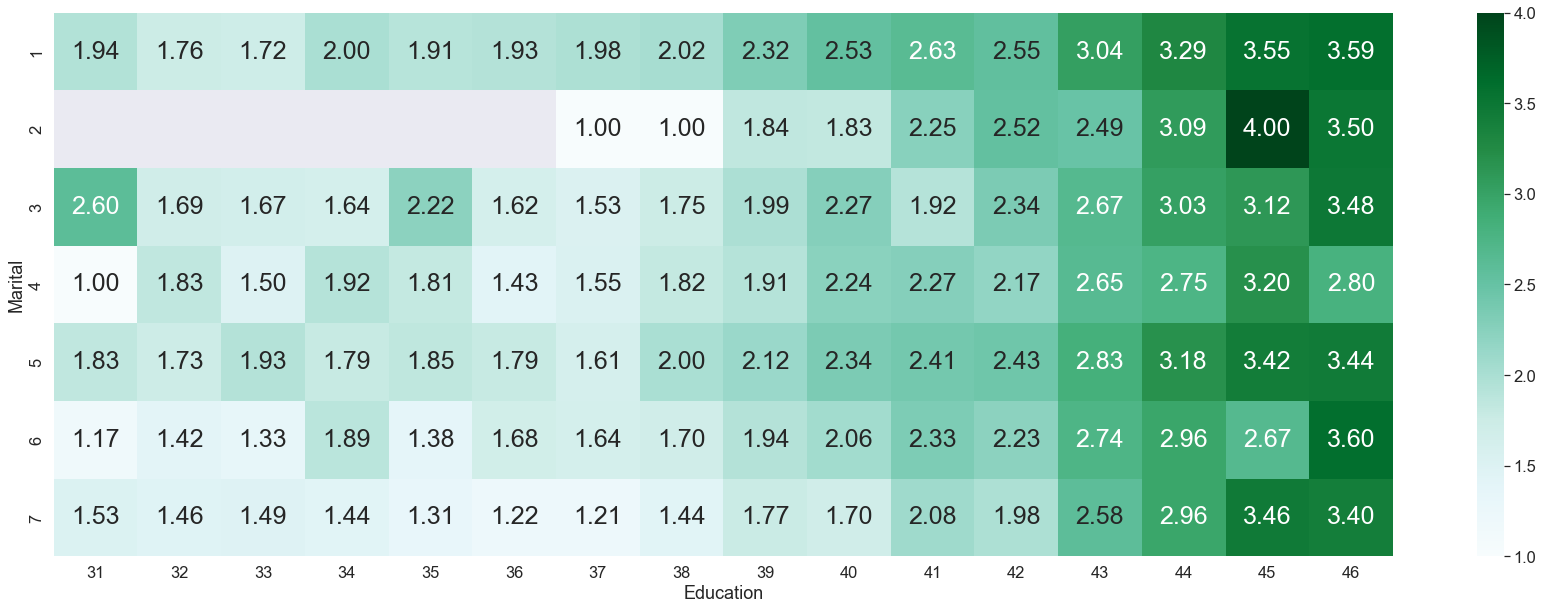

In [141]:
var = 'Education'
var2 = 'Marital'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that regardless of marital status, having a higher education level helps to boost one's income.

<b>Average Salary category across various Education and Sex</b>

<AxesSubplot:xlabel='Education', ylabel='Sex'>

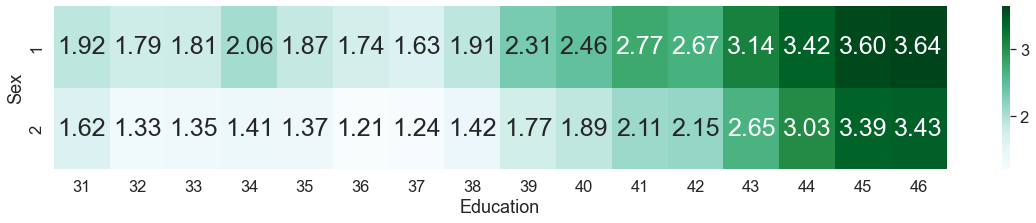

In [142]:
var = 'Education'
var2 = 'Sex'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 3))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that on average, with the same level of education, females tend to earn less than males.

<b>Average Age category across various Education and Salary classes</b>

<AxesSubplot:xlabel='Education', ylabel='Salary'>

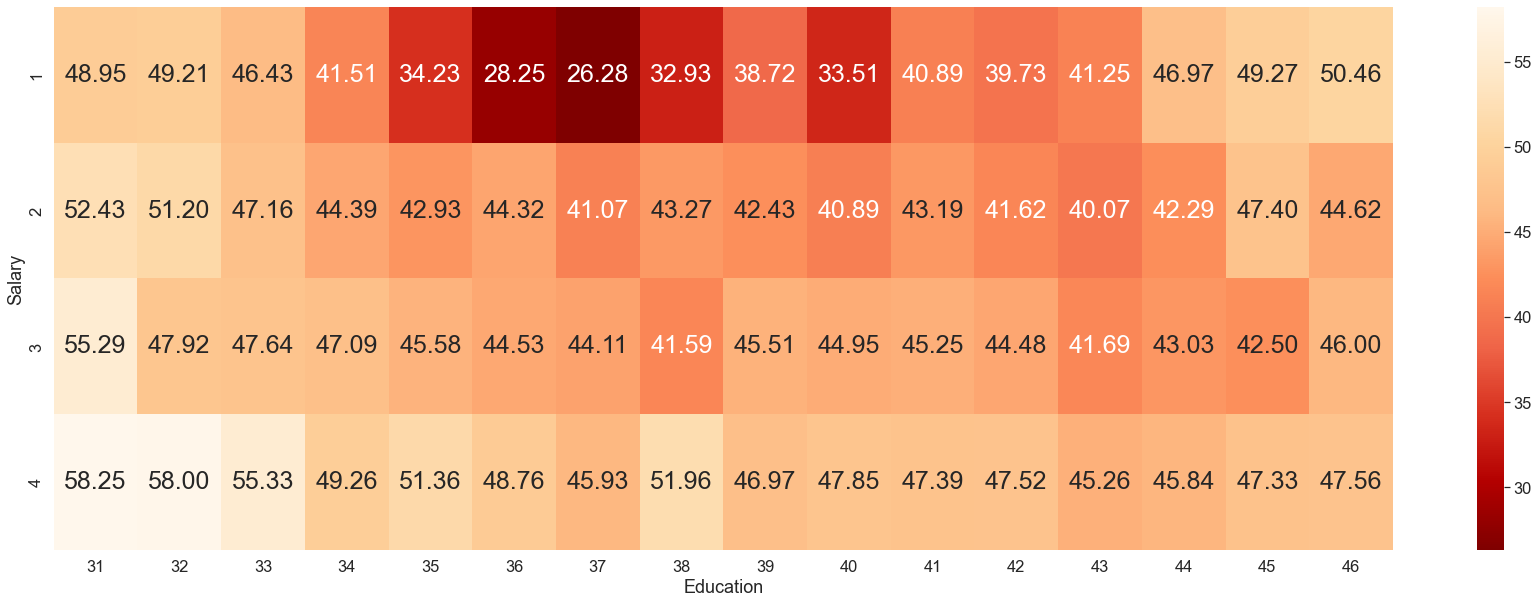

In [143]:
var = 'Education'
var2 = 'Salary'
data = train[['Age', var, var2]].pivot_table(columns=var, index=var2, values='Age')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='OrRd_r', fmt='.2f')

<b>Insights</b>
<br>The numbers in the boxes are the average age of people belonging to that category. It appears that on average, with the same education level, people aged 40-60 are earning more. This could be due to their wealth of experience

<b>Average Salary category across various Education and Race</b>

<AxesSubplot:xlabel='Education', ylabel='Race'>

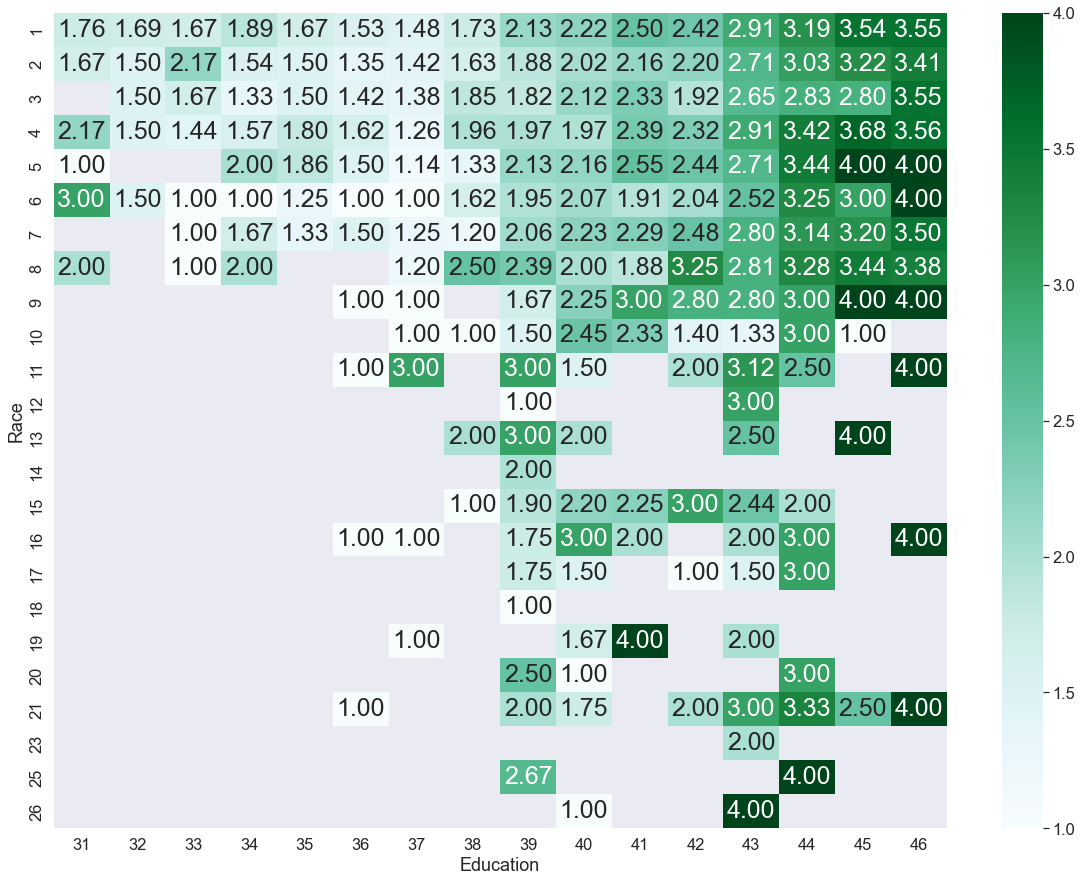

In [144]:
var = 'Education'
var2 = 'Race'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 15))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It seems like there isn't much linear correlation between Education and Race. Regardless of Race, Education generally does help to get a higher income.

<b>Average Salary category across various Education and Veteran</b>

<AxesSubplot:xlabel='Education', ylabel='Veteran'>

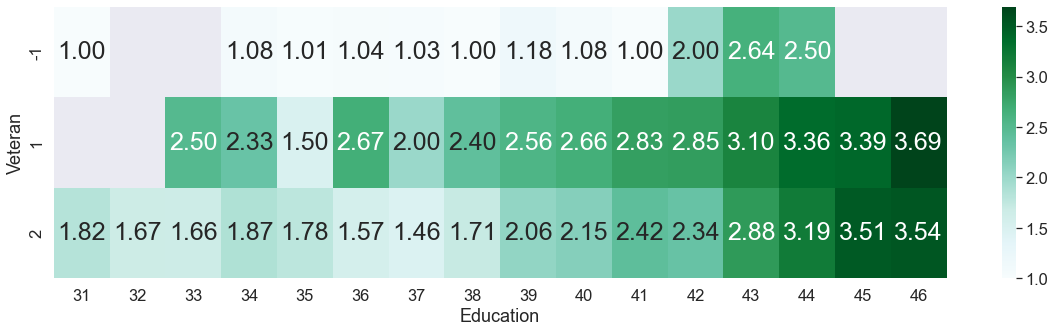

In [145]:
var = 'Education'
var2 = 'Veteran'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 5))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that with the same level of education, veterans tend to fetch a higher salary.

<b>Average Salary category across various Education and Possesion of Professional Certificates</b>

<AxesSubplot:xlabel='Education', ylabel='Pro_Cert'>

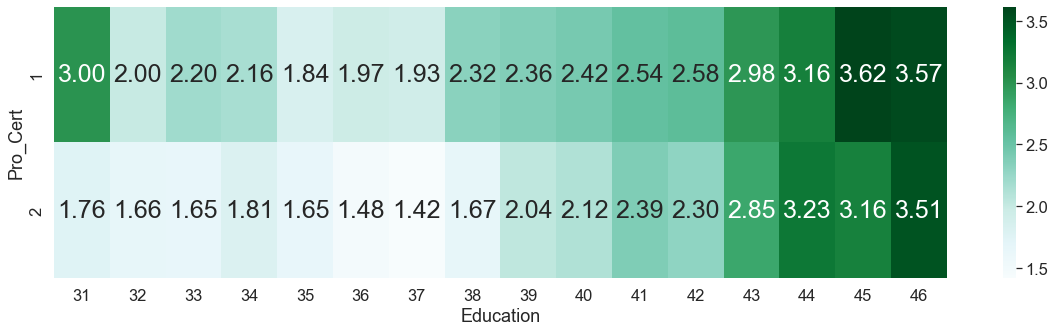

In [146]:
var = 'Education'
var2 = 'Pro_Cert'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 5))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that with the same formal education level, having an extra professional certificate do help to compensate a lower education level and fetch a higher salary.

<b>Average Salary category across various Education and Disability Status</b>

<AxesSubplot:xlabel='Education', ylabel='Disability'>

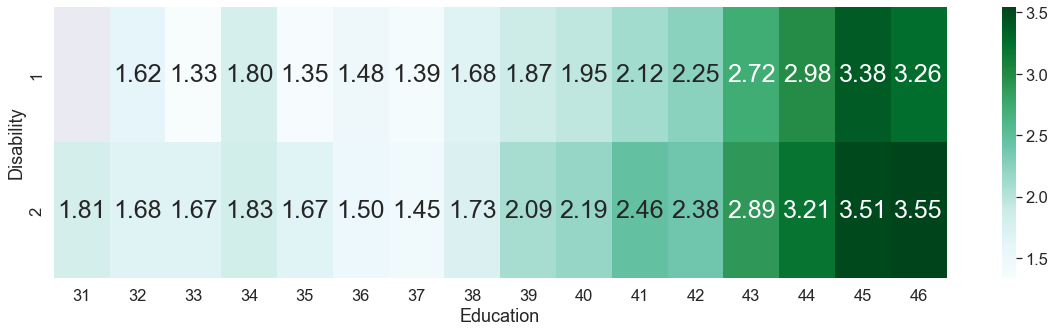

In [147]:
var = 'Education'
var2 = 'Disability'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 5))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that having disability will result in one having a lower pay, in general.

<b>Average Salary category across various Education and Citizenship</b>

<AxesSubplot:xlabel='Education', ylabel='Citizenship'>

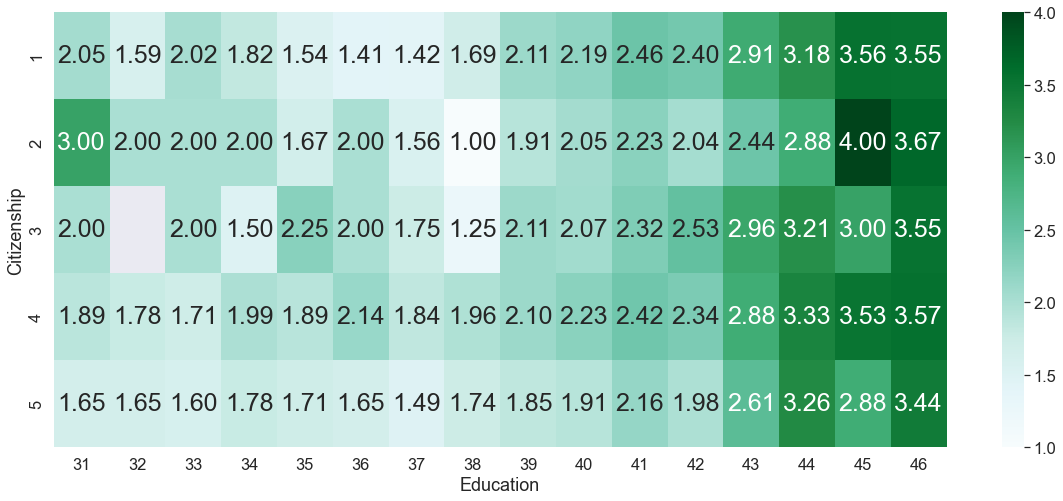

In [148]:
var = 'Education'
var2 = 'Citizenship'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 8))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that across the various citizenship, with the same education level, they seem to fetch about the same income range. However non-citizens (Citizenship Class 5) tend to fetch a lower income range among the various citizenship status.

<b>Average Salary category across various Education and Industry</b>

<AxesSubplot:xlabel='Education', ylabel='Industry'>

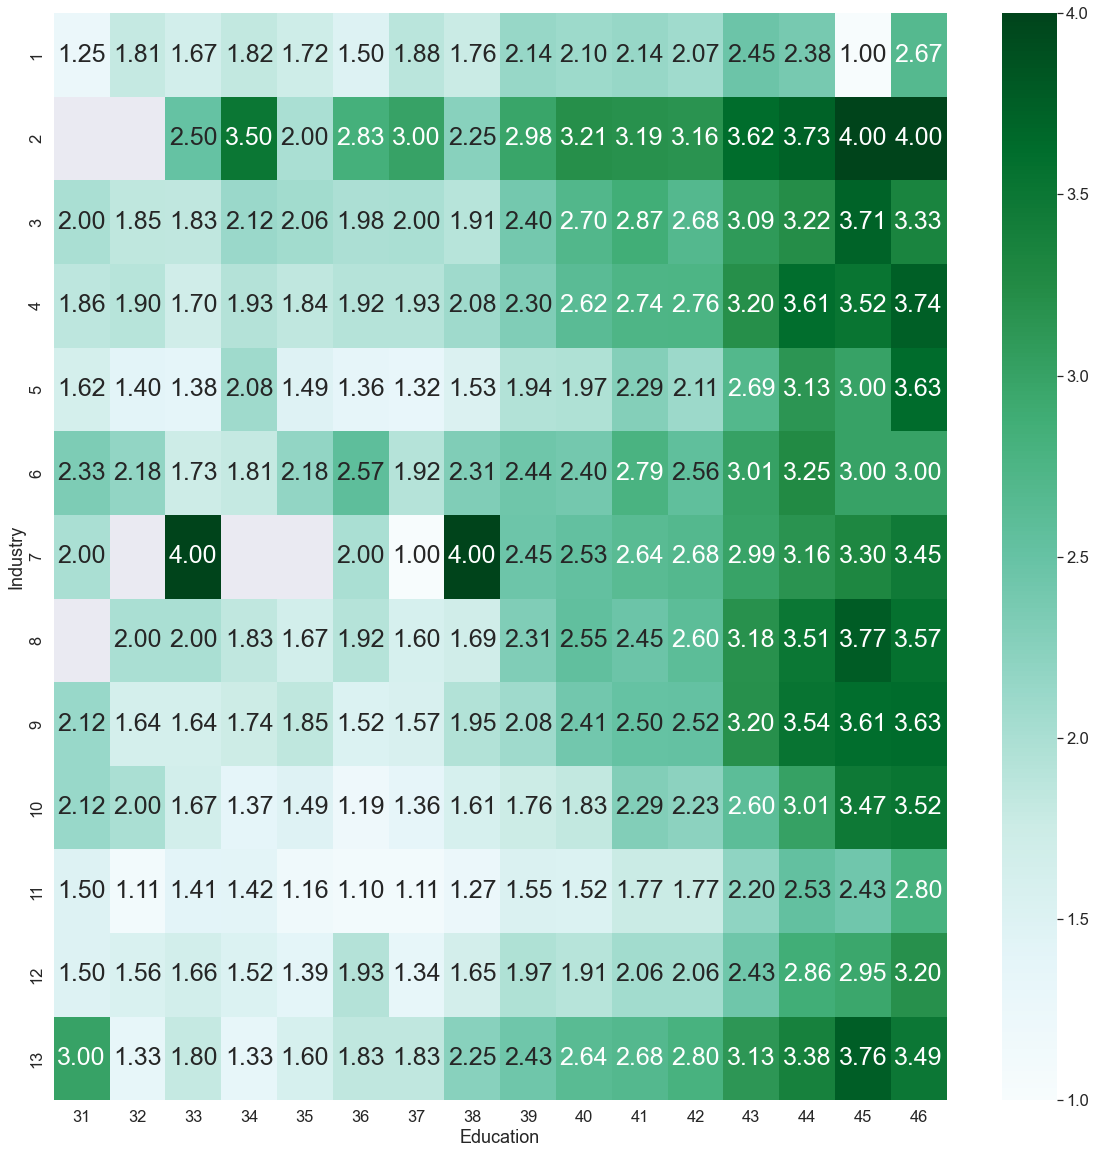

In [149]:
var = 'Education'
var2 = 'Industry'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 20))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that across the various industry, higher education will generally result in higher pay. However, in the Transportation and Utilities Industry (6), having higher education beyond a degree does not bring about an increasing trend in salary. Generally, the Public Administration (13) pays more than other industries for the same education level.

<b>Average Salary category across various Education and Occupation Group</b>

<AxesSubplot:xlabel='Education', ylabel='Occupation Group'>

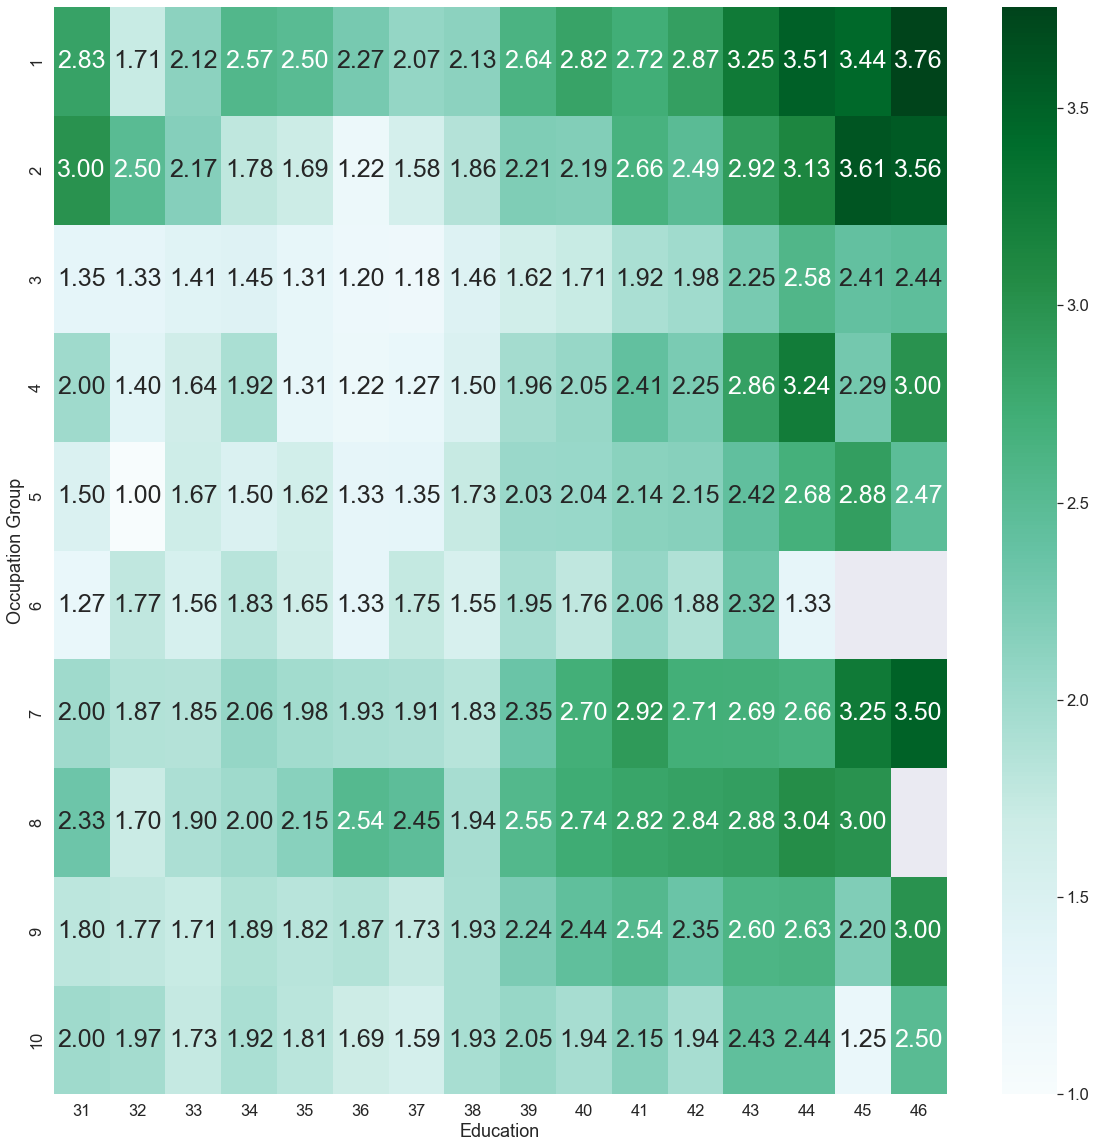

In [150]:
var = 'Education'
var2 = 'Occupation Group'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 20))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that Education does not help in occpations relating to Farming, Fishing and Foresty (6) as well as Transport and material moving occupations (10).

<b>Average Salary category across various Education and WorkClass</b>

<AxesSubplot:xlabel='Education', ylabel='WorkClass'>

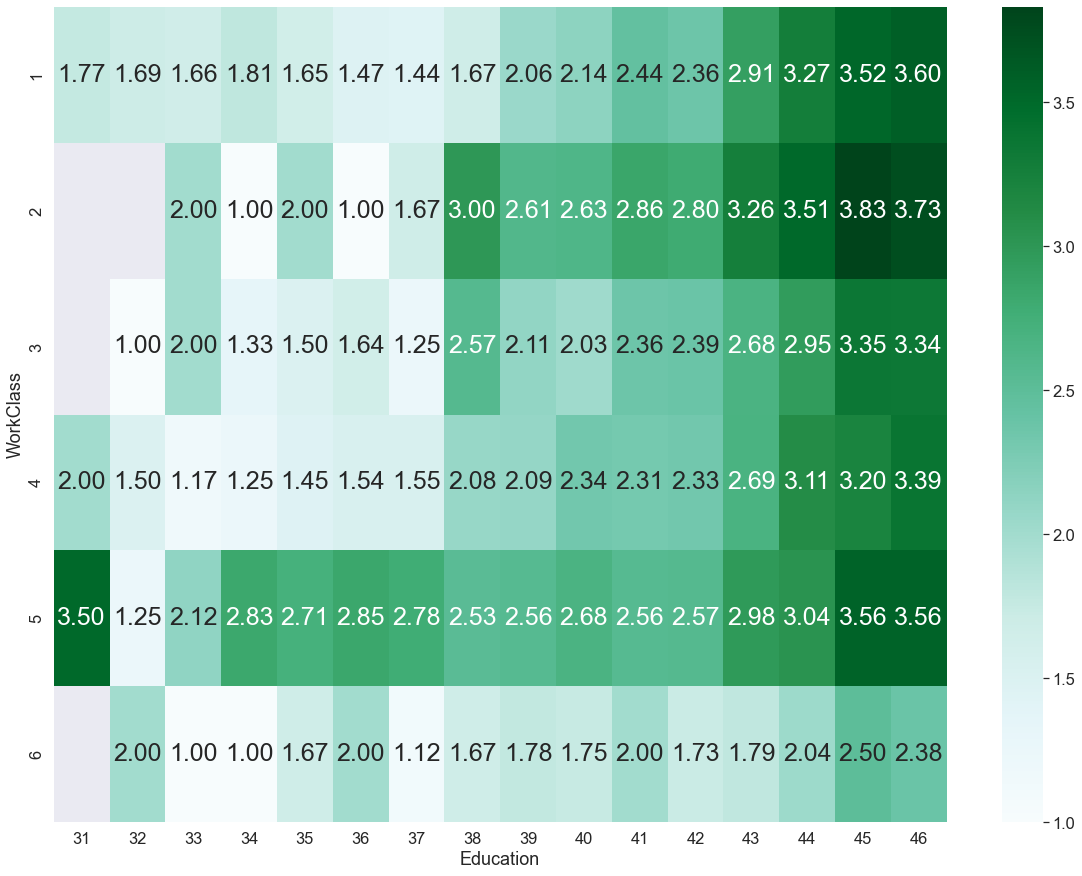

In [151]:
var = 'Education'
var2 = 'WorkClass'
data = train[['Salary', var, var2]].pivot_table(columns=var, index=var2, values='Salary')
f, axes = plt.subplots(figsize=(20, 15))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='BuGn', fmt='.2f')

<b>Insights</b>
<br>It appears that regardless of private, public or self-employed, having a higher education does increase one's salary in general. However, education is less likely to one's pay as much if one is self-employed (5&6).

<b>Average Hours worked per Week across various Education and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Education and Salary')]

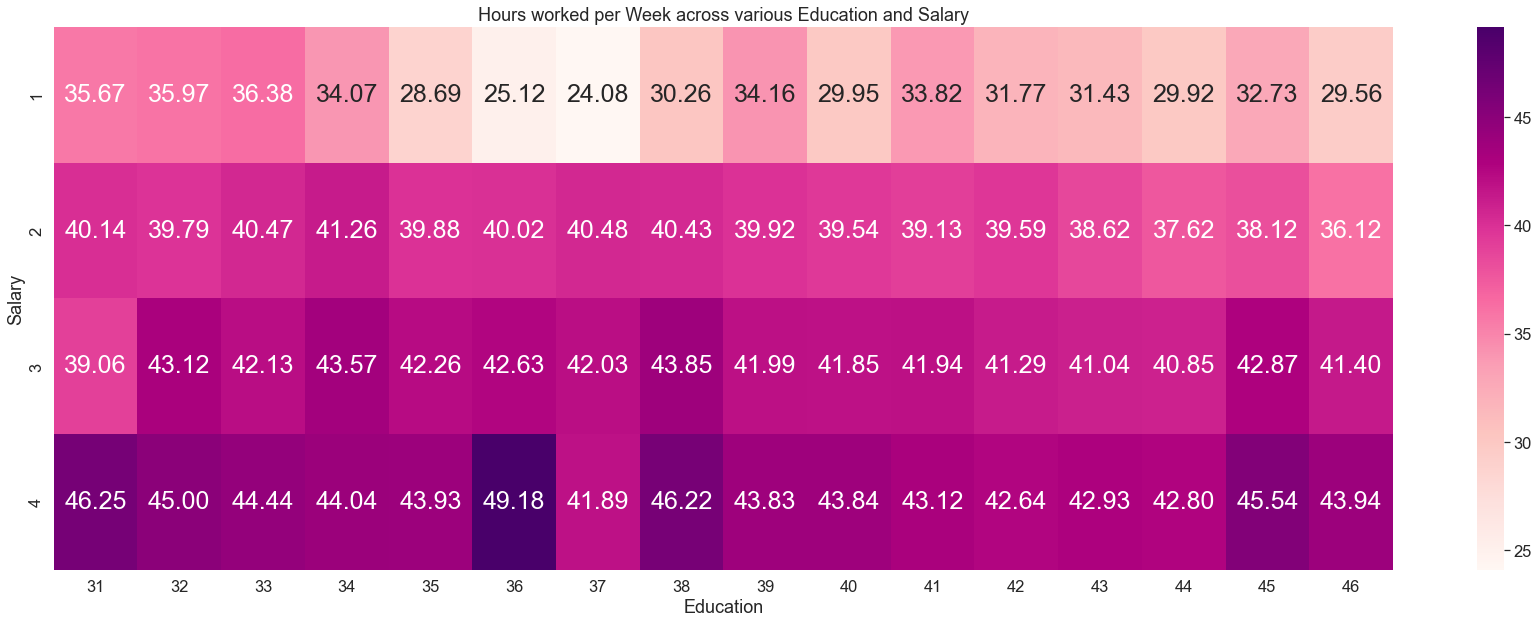

In [152]:
var = 'Education'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various Education and Salary')

<b>Insights</b>
<br>It appears that regardless of education level, the work hours needed to achieve the same income range are about the same. As one earn more, one tends to work longer too.

<b>Average Hours worked per Week across various Sex and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Sex and Salary')]

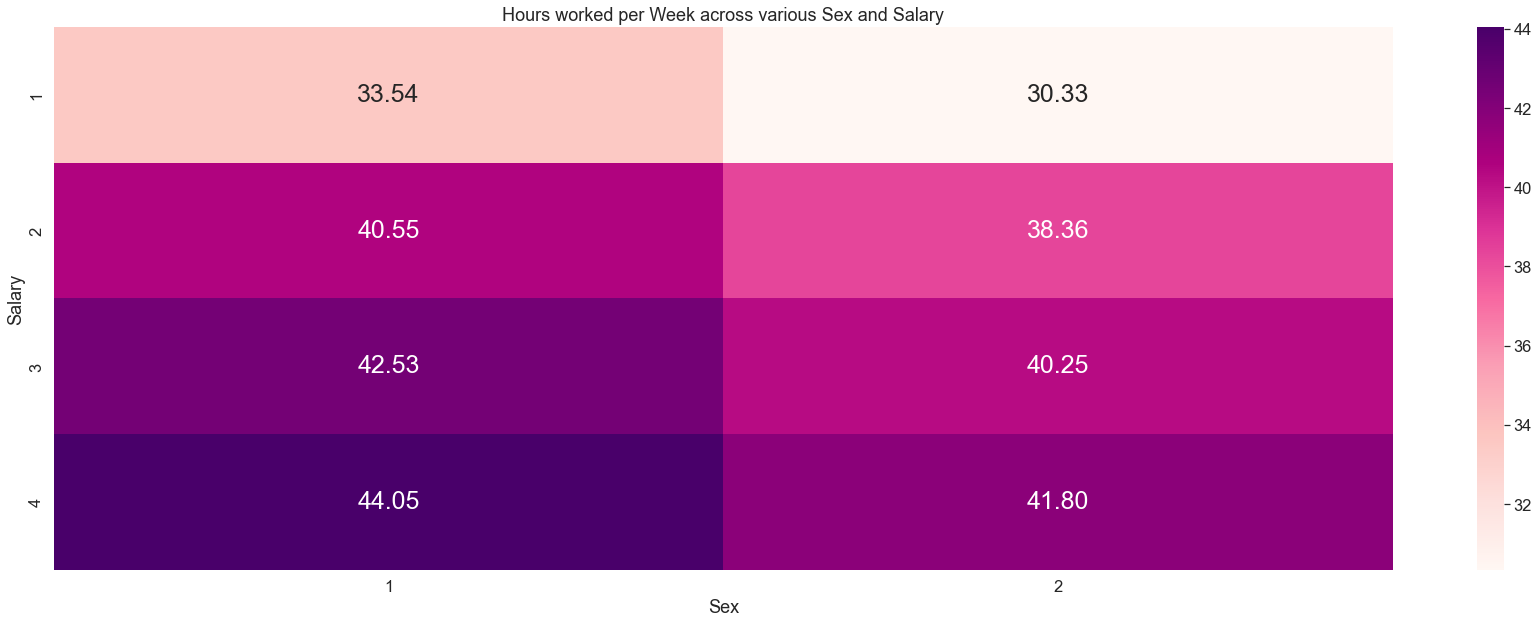

In [153]:
var = 'Sex'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>It appears that for the same income range, males work longer hours than females.

<b>Average Hours worked per Week across various Race and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Race and Salary')]

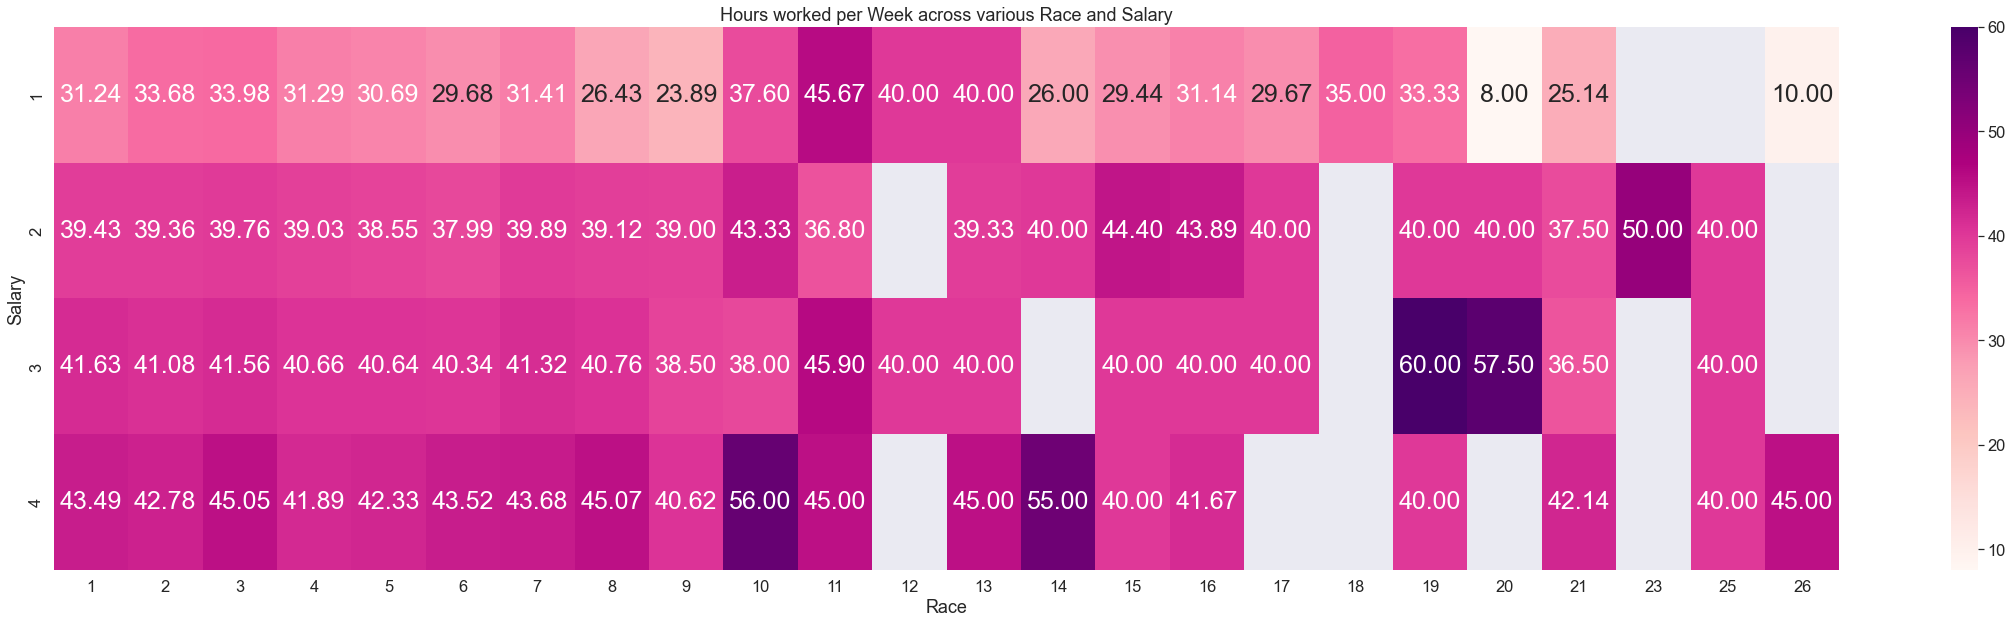

In [154]:
var = 'Race'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(40, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>For races with significant representation in the survey {White only and Black only), it seems like the hours worked is largely consistent across the various races.

<b>Average Hours worked per Week across Veteran Status and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Veteran and Salary')]

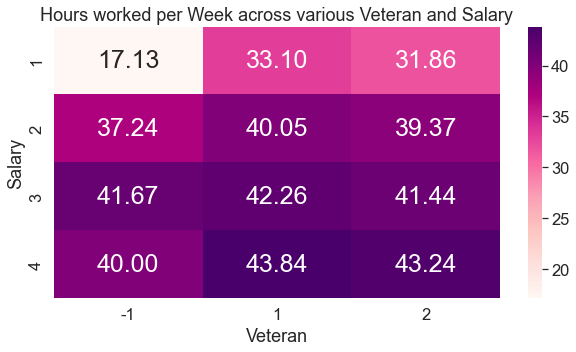

In [155]:
var = 'Veteran'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(10, 5))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>It appears that veterans work longer for the same income class.

<b>Average Hours worked per Week across Professional Certificate Status and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Pro_Cert and Salary')]

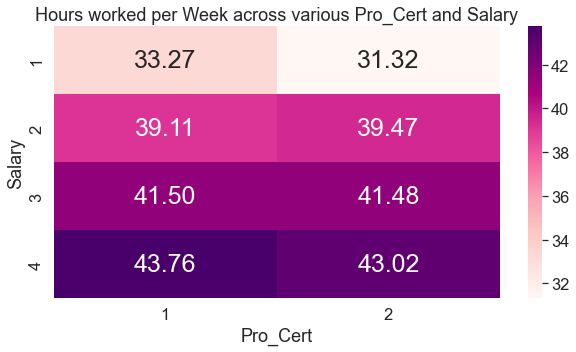

In [156]:
var = 'Pro_Cert'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(10, 5))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>Regardless of whether one has a professional certificate, the hours worked for the same income range are about the same.

<b>Average Hours worked per Week across Disability Status and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Disability and Salary')]

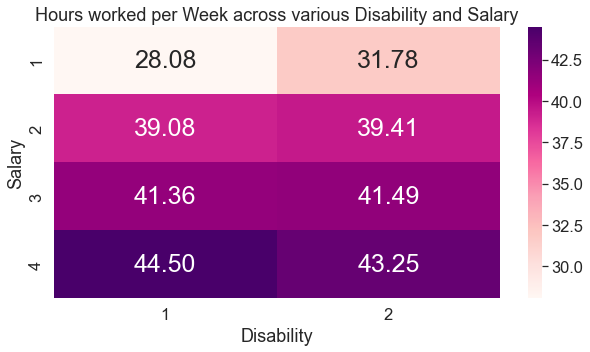

In [157]:
var = 'Disability'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(10, 5))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>Regardless of disability, for the same income class, the hours worked tend to be about the same except for the lowest income class (1) where people with disability work less hours.

<b>Average Hours worked per Week across various Citizenship Status and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Citizenship and Salary')]

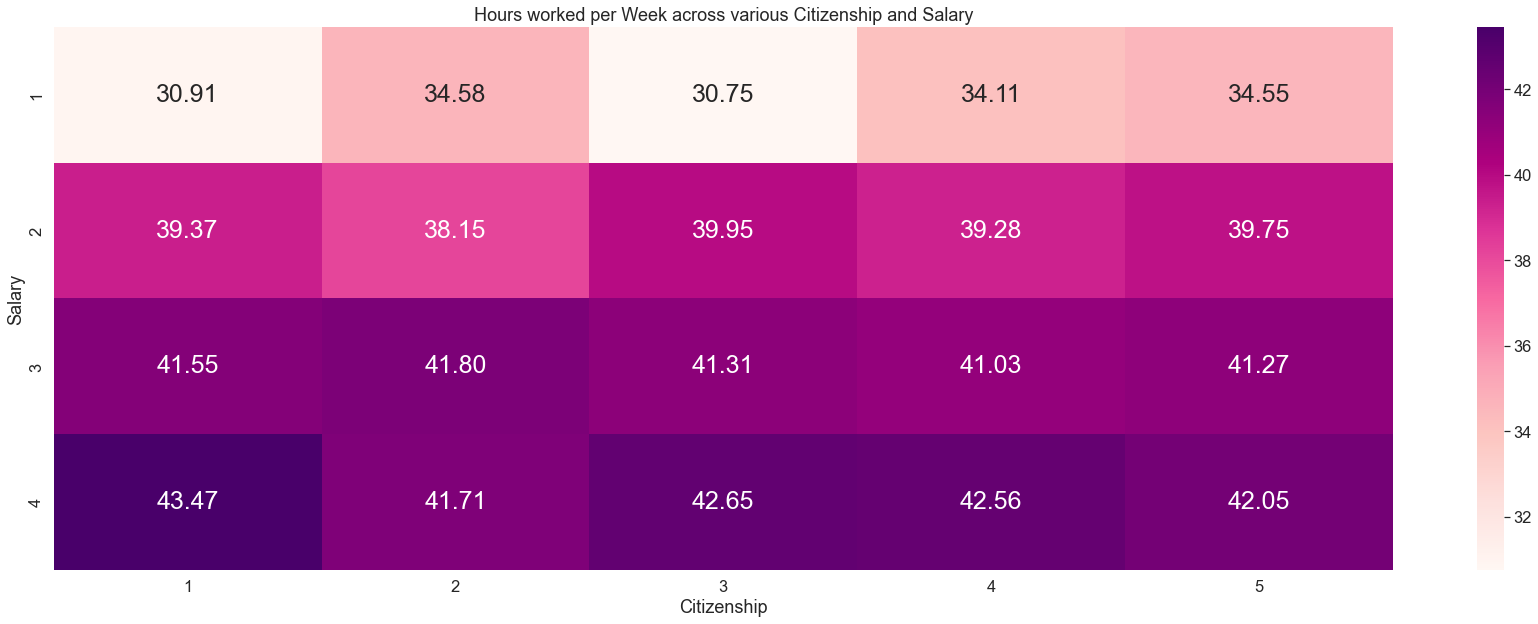

In [158]:
var = 'Citizenship'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>The hours worked for each income range, across the various citizenship status, are largely consistent.

<b>Average Hours worked per Week across various Industry and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Industry and Salary')]

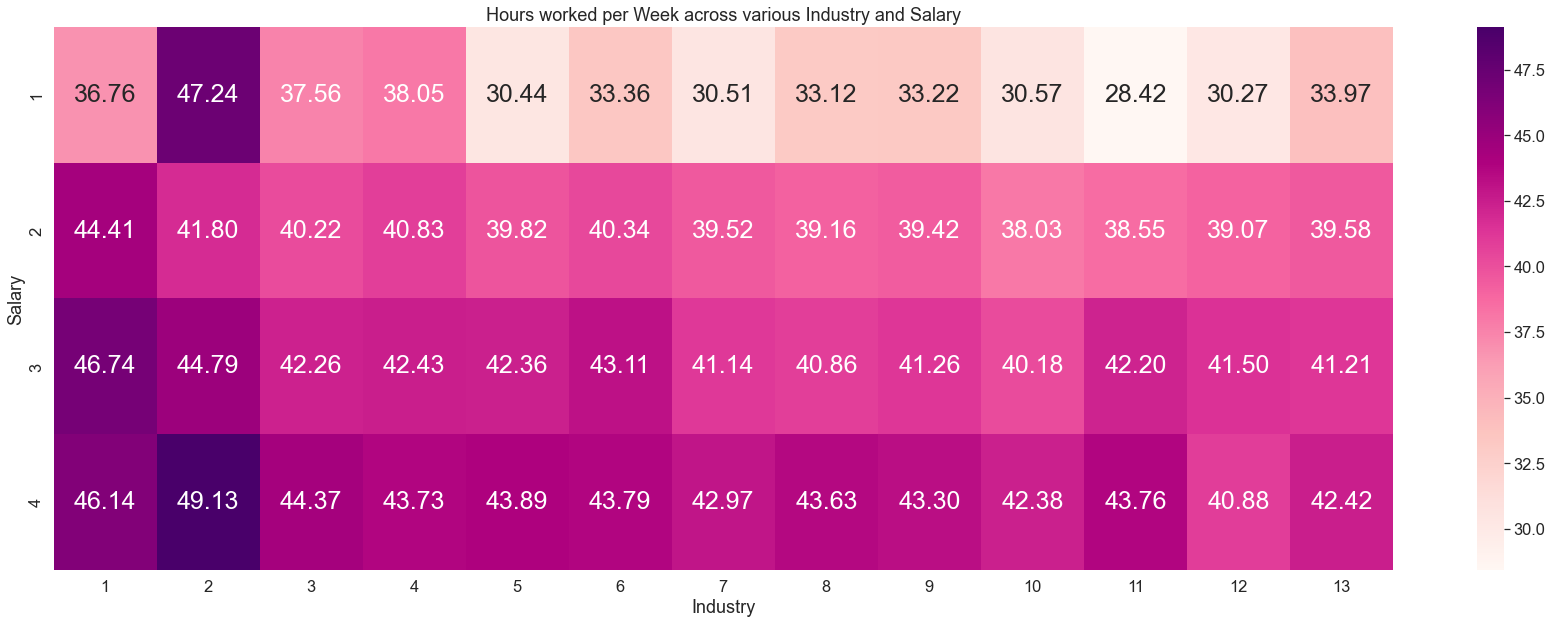

In [159]:
var = 'Industry'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>The agriculture, foresty, fishing and hunting (1) as well as mining (2) industries have the longest working hours. The other industries tend to be about the same.

<b>Average Hours worked per Week across various Occupation and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various Occupation Group and Salary')]

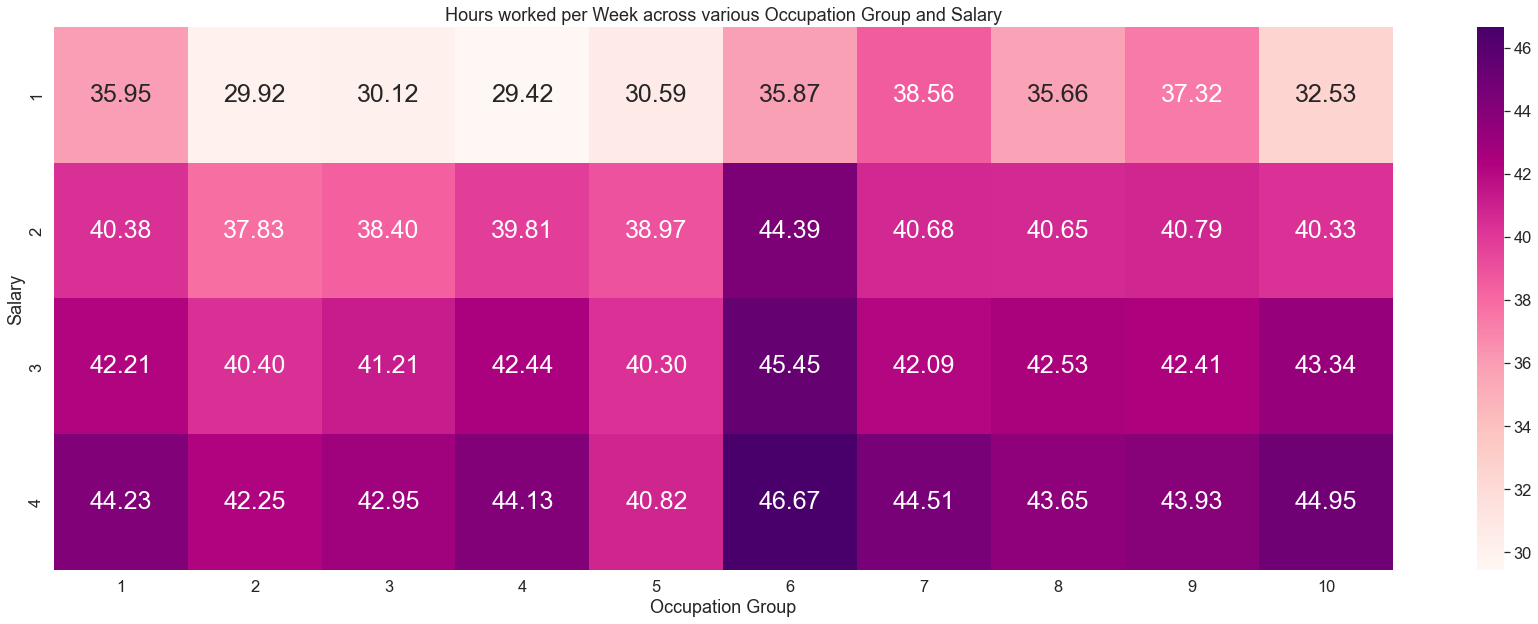

In [160]:
var = 'Occupation Group'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>Similarly, we see jobs relating to farming, fishing and foresty (6) have the longest working hours.

<b>Average Hours worked per Week across various WorkClass and Salary</b>

[Text(0.5, 1.0, 'Hours worked per Week across various WorkClass and Salary')]

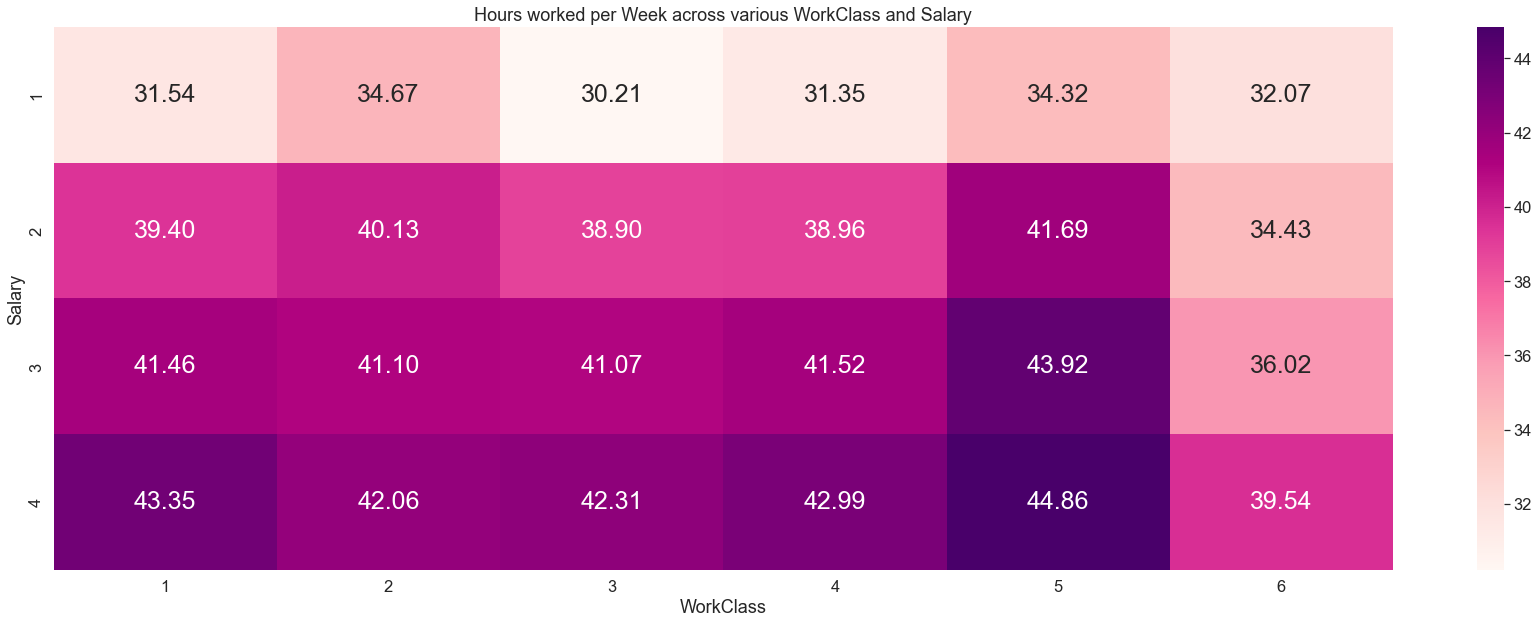

In [161]:
var = 'WorkClass'
var2 = 'Salary'
data = train[['HrsWeek', var, var2]].pivot_table(columns=var, index=var2, values='HrsWeek')
f, axes = plt.subplots(figsize=(30, 10))
sb.heatmap(data, annot=True, annot_kws={'size':25}, ax=axes, cmap='RdPu', fmt='.2f').set(title='Hours worked per Week across various {0} and Salary'.format(var))


<b>Insights</b>
<br>The hours worked across various workclass are quite consistent except those who are self-employed and without an incorporated company. This could be due to the fact that they may be freelance workers with lower working hours. Those who are self-employed with an incorporated company tend to work longer than the rest. This could be because they have generally greater responsibility within the company.

<h2>SUMMARY OF INSIGHTS GATHERED FROM EDA</h2>
<h3>Single-Variate Analysis</h3>
<br>
1. <b>Salary: </b>Cat 1 has the lowest count. The income classes have about the same count.<br>
2. <b>Education: </b>The qualifications with the highest count are High School Diploma and Bachelor's Degree.<br>
3. <b>Marital Status: </b>Most people are married with a civilian spouse.<br>
4. <b>Sex: </b>There are about equal number of males and females in the dataset.<br>
5. <b>Age: </b>We see that majority of the respondents are aged 20 to 64 years old. There are 4612 respondents who are outliers (younger than 20 or older than 64).<br>
5. <b>Race: </b>The race most represented is "White Only", which is about 7 times more represented than the next most represented race - "Black Only". Many races are not given significant representation.<br>
6. <b>Veteran: </b>There are many more non-veterans than veterans.<br>
7. <b>Professional Certificates: </b>The number of people without professional certificates is about three times that of those with. Among those who possess professional certificates, most are issued by government bodies. However, for most, they do not require such certificates in their jobs. <br>
8. <b>Disabilities: </b>There are few people with disabilities (1702 vs 49493).<br>
9. <b>Citizenship: </b>The most represented citizenship status is "Native, born in US", about 10 times of the second most represented citizenship - "Foregin born, US citizen by naturalization".<br>
10. <b>Working hours: </b>Most work between 34 -42 hours. For those who work less than 35 hrs, it is a common occurence for many. However, for those who are working full-time, most work longer than 35 hours usually; most work 40 hours weekly.<br>
11. <b>Industry: </b>The most represented industry is "Educational and health services", about twice of the second most represented industry - "Wholesale and retail trade".<br>
12. <b>Occupation Group: </b>Professionals is the most common occupation group, followed by management and financial occupations then service occupations. Occupations that are more traditional like farming, fishing and forestry are less popular.<br>
13. <b>Occupations: </b>Most common occupations include managers, teachers, registered nurses, ship captains, retail supervisors and customer service representatives.<br>
14. <b>Work Class: </b>The most represented workclass is "Private", about 15 times that of the second most represented work class - Government, Local.<br>
15. <b>Longest Industry: </b>Many respondents have industrial experience in healthcare and social assistance, retail trade and educational services.<br>
16. <b>Longest Job Class: </b>TMost respondents have most experience working in private and government companies.<br>


<br>
<h3>Bi-Variate Analysis</h3>
<br>
1. <b>Education: </b>Generally, the more education one receives, the higher the salary received.<br>
2. <b>Marital Status: </b>Married respondents earn the most on average but it could be due to other factors like them being older. This is supported by how married and divorced respondents earn more on average. It may not be meaningful to attribute the difference in salary to solely their marital status.<br>
3. <b>Sex: </b>On average, males earn more than females.<br>
4. <b>Age: </b>On average, those who are older earn more.<br>
5. <b>Race: </b>Due to a lack of representation in many races, the mean salary class may not be meaningful. We also see that generally, there is an increasing number of people from income class 4 to 1.<br>
6. <b>Veteran: </b>Veterans appear to earn more than non-veterans. Perhaps this is due to veterans being respected for their contributions to the country or it may be due to them being older. However the difference is not a lot.<br>
7. <b>Professional Certificates: </b>Respondents with professional certificates appears to earn more on average but not much more. Whether one's professional certificate is issued by the government does not seem to have much impact on one's salary. For those with professional certificates, if their job requires them to have the certificate, they are generally better paid.<br>
8. <b>Disabilities: </b>Respondents with disability earn less on average and they tend to work at jobs in the lower income classes.<br>
9. <b>Citizenship: </b>It appears that there is no clear distinction between native and foreign-born. However, it seems that non-citizens have a lower salary.<br>
10. <b>Working Hours: </b>It appears that people with lower salary work less hours per week on average. Working longer hours tend to be associated with a higher pay; 5hose who work less than 35 hours for more than 1 week earn less on average.<br>
12. <b>Household Information: </b>It does not seem to have a trend except that children of householders tend to earn less, possibly due to their younger age.<br>
13. <b>Industry: </b>The mining industry is the most well-compensated industry.<br>
14. <b>Occupations: </b>Occupations related to management and finance are the most well-paid while service occupations are paid the lowest.<br>
15. <b>Work Class: </b>We see that generally, the government sector pays better than the private sector and within the government sector, federal pays better than local which in turn pays better than state. Self-employed people with incorporated companies tend to earn more than self-employed people without incorporated companies who tends to earn in the lowest income band.<br>
16. <b>Experience: </b>We see that generally, those with mining, utilities, professional and technical industrial experience are the most well-paid. Generally, those have been working for the government earn the most.<br>


<br>
<h3>Multi-Variate Analysis</h3>
<br>
<b>1.</b> It appears that regardless of marital status, having a higher education level helps to boost one's income.<br>
<b>2.</b> It appears that on average, with the same level of education, females tend to earn less than males.<br>
<b>3.</b> It appears that on average, with the same education level, people aged 40-60 are earning more. This could be due to their wealth of experience.<br>
<b>4.</b> It seems like there isn't much linear correlation between Education and Race. Regardless of Race, Education does help to get a higher income.<br>
<b>5.</b> With the same level of education, veterans tend to fetch a higher salary.<br>
<b>6.</b> With the same formal education level, having an extra professional certificate do help to compensate a lower education level and fetch a higher salary.<br>
<b>7.</b> It appears that, for the same education level, having disability will result in one having a lower pay, in general.<br>
<b>8.</b> With the same level of education, having hearing or visual disability will still fetch about the same income range.<br>
<b>9.</b> For those without a degree, having concentration disability will result in one having a lower pay, in general.<br>
<b>10.</b> Across the various citizenship, with the same education level, they seem to fetch about the same income range. However non-citizens tend to fetch a lower income range among the various citizenship status.<br>
<b>11.</b> It appears that across the various industry, higher education will generally result in higher pay. However, in the Transportation and Utilities Industry (6), having higher education beyond a degree does not bring about an increasing trend in salary. Generally, the Public Administration (13) pays more than other industries for the same education level.<br>
<b>12.</b> It appears that Education does not help much in occupations relating to Farming, Fishing and Foresty as well as Transport and material moving occupations.<br>
<b>12.</b>It appears that regardless of private, public or self-employed, having a higher education does increase one's salary in general. However, education is less likely to one's pay as much if one is self-employed (5&6).<br>
<b>14.</b> Regardless of education level, the work hours needed to achieve the same income range is about the same.<br>
<b>15.</b> Within the same income range, males work longer hours than females.<br>
<b>16.</b> For races with significant representation (white only and black only) in the survey, it seems like the hours worked is largely consistent across the various races.<br>
<b>17.</b> It appears that veterans work longer for the same income class.<br>
<b>18.</b> Regardless of whether one has a professional certificate, the hours worked for the same income range are about the same.<br>
<b>19.</b> Reople with grooming, errands and concentration disabilities work less on average for the same income range.<br>
<b>20.</b> Regardless of disability, for the same income class, the hours worked tend to be about the same except for the lowest income class (1) where people with disability work less hours.<br>
<b>21.</b> The hours worked for each income range, across the various citizenship status, are largely consistent.<br>
<b>22.</b> The agriculture, foresty, fishing and hunting as well as mining industries have the longest working hours. The other industries tend to be about the same.<br>
<b>23.</b> Similarly, we see jobs relating to farming, fishing and foresty (6) have the longest working hours.<br>
<b>24.</b> The hours worked across various workclass are quite consistent except those who are self-employed and without an incorporated company. This could be due to the fact that they may be freelance workers with lower working hours. Those who are self-employed with an incorporated company tend to work longer than the rest. This could be because they have generally greater responsibility within the company.<br>